In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [7]:
dfe = df.copy()

dfe['sex'] = enc.fit_transform(df['sex'])
dfe['smoker'] = enc.fit_transform(df['smoker'])
dfe['region'] = enc.fit_transform(df['region'])

In [8]:
dfe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(dfe.drop('charges', axis=1), dfe['charges'],\
                                                    test_size=0.2, random_state=42)

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()

model.add(Dense(15, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss='mae',
             optimizer='adam',
             metrics=['mse', 'mae'])

In [14]:
history = model.fit(X_train, y_train, batch_size=64, epochs=500,
                     verbose=1, validation_split=0.2)

Epoch 1/500
14/14 [==============================] - 1s 58ms/step - loss: 13524.0518 - mse: 325623456.0000 - mae: 13524.0518 - val_loss: 12659.1807 - val_mse: 310464384.0000 - val_mae: 12659.1807
Epoch 2/500
14/14 [==============================] - 0s 12ms/step - loss: 13521.2402 - mse: 325542496.0000 - mae: 13521.2402 - val_loss: 12657.0469 - val_mse: 310406880.0000 - val_mae: 12657.0469
Epoch 3/500
14/14 [==============================] - 0s 13ms/step - loss: 13519.5195 - mse: 325493728.0000 - mae: 13519.5195 - val_loss: 12655.6084 - val_mse: 310368032.0000 - val_mae: 12655.6084
Epoch 4/500
14/14 [==============================] - 0s 12ms/step - loss: 13518.2383 - mse: 325457952.0000 - mae: 13518.2383 - val_loss: 12654.6768 - val_mse: 310343616.0000 - val_mae: 12654.6768
Epoch 5/500
14/14 [==============================] - 0s 13ms/step - loss: 13517.5215 - mse: 325437952.0000 - mae: 13517.5215 - val_loss: 12654.0605 - val_mse: 310327008.0000 - val_mae: 12654.0605
Epoch 6/500
14/14 [=

Epoch 43/500
14/14 [==============================] - 0s 8ms/step - loss: 11437.7969 - mse: 269979168.0000 - mae: 11437.7969 - val_loss: 10526.8477 - val_mse: 256225008.0000 - val_mae: 10526.8477
Epoch 44/500
14/14 [==============================] - 0s 6ms/step - loss: 11280.1865 - mse: 265982368.0000 - mae: 11280.1865 - val_loss: 10370.2969 - val_mse: 252446944.0000 - val_mae: 10370.2969
Epoch 45/500
14/14 [==============================] - 0s 5ms/step - loss: 11118.5312 - mse: 262028112.0000 - mae: 11118.5312 - val_loss: 10209.6631 - val_mse: 248604752.0000 - val_mae: 10209.6631
Epoch 46/500
14/14 [==============================] - 0s 9ms/step - loss: 10953.8350 - mse: 257852544.0000 - mae: 10953.8350 - val_loss: 10051.5977 - val_mse: 244763424.0000 - val_mae: 10051.5977
Epoch 47/500
14/14 [==============================] - 0s 8ms/step - loss: 10788.2148 - mse: 253737248.0000 - mae: 10788.2148 - val_loss: 9891.2822 - val_mse: 240833648.0000 - val_mae: 9891.2822
Epoch 48/500
14/14 [==

14/14 [==============================] - 0s 8ms/step - loss: 7447.7090 - mse: 152847616.0000 - mae: 7447.7090 - val_loss: 7064.1289 - val_mse: 149901472.0000 - val_mae: 7064.1289
Epoch 128/500
14/14 [==============================] - 0s 6ms/step - loss: 7445.7803 - mse: 152934448.0000 - mae: 7445.7803 - val_loss: 7061.7407 - val_mse: 149906560.0000 - val_mae: 7061.7407
Epoch 129/500
14/14 [==============================] - 0s 6ms/step - loss: 7443.8799 - mse: 152789520.0000 - mae: 7443.8799 - val_loss: 7060.1992 - val_mse: 149712864.0000 - val_mae: 7060.1992
Epoch 130/500
14/14 [==============================] - 0s 6ms/step - loss: 7442.1030 - mse: 152707680.0000 - mae: 7442.1030 - val_loss: 7057.8306 - val_mse: 149686688.0000 - val_mae: 7057.8306
Epoch 131/500
14/14 [==============================] - 0s 9ms/step - loss: 7440.2568 - mse: 152623008.0000 - mae: 7440.2568 - val_loss: 7055.8027 - val_mse: 149621888.0000 - val_mae: 7055.8027
Epoch 132/500
14/14 [============================

14/14 [==============================] - 0s 6ms/step - loss: 7274.3232 - mse: 153763392.0000 - mae: 7274.3232 - val_loss: 6844.4751 - val_mse: 150185200.0000 - val_mae: 6844.4751
Epoch 212/500
14/14 [==============================] - 0s 8ms/step - loss: 7272.2090 - mse: 153596352.0000 - mae: 7272.2090 - val_loss: 6842.1069 - val_mse: 150093648.0000 - val_mae: 6842.1069
Epoch 213/500
14/14 [==============================] - 0s 6ms/step - loss: 7270.1030 - mse: 153521424.0000 - mae: 7270.1030 - val_loss: 6839.3940 - val_mse: 150066368.0000 - val_mae: 6839.3940
Epoch 214/500
14/14 [==============================] - 0s 8ms/step - loss: 7267.6367 - mse: 153537952.0000 - mae: 7267.6367 - val_loss: 6836.2827 - val_mse: 150086720.0000 - val_mae: 6836.2827
Epoch 215/500
14/14 [==============================] - 0s 6ms/step - loss: 7265.2734 - mse: 153655328.0000 - mae: 7265.2734 - val_loss: 6832.6636 - val_mse: 150195136.0000 - val_mae: 6832.6636
Epoch 216/500
14/14 [============================

14/14 [==============================] - 0s 7ms/step - loss: 7058.2017 - mse: 156372528.0000 - mae: 7058.2017 - val_loss: 6559.7534 - val_mse: 152336880.0000 - val_mae: 6559.7534
Epoch 296/500
14/14 [==============================] - 0s 7ms/step - loss: 7055.4028 - mse: 156567824.0000 - mae: 7055.4028 - val_loss: 6555.6851 - val_mse: 152443968.0000 - val_mae: 6555.6851
Epoch 297/500
14/14 [==============================] - 0s 6ms/step - loss: 7052.1040 - mse: 156481024.0000 - mae: 7052.1040 - val_loss: 6553.4463 - val_mse: 152276464.0000 - val_mae: 6553.4463
Epoch 298/500
14/14 [==============================] - 0s 6ms/step - loss: 7049.8335 - mse: 156524704.0000 - mae: 7049.8335 - val_loss: 6549.1016 - val_mse: 152364928.0000 - val_mae: 6549.1016
Epoch 299/500
14/14 [==============================] - 0s 6ms/step - loss: 7046.0186 - mse: 156364576.0000 - mae: 7046.0186 - val_loss: 6547.9326 - val_mse: 152129888.0000 - val_mae: 6547.9326
Epoch 300/500
14/14 [============================

14/14 [==============================] - 0s 7ms/step - loss: 6797.1582 - mse: 160722528.0000 - mae: 6797.1582 - val_loss: 6228.8354 - val_mse: 156026768.0000 - val_mae: 6228.8354
Epoch 380/500
14/14 [==============================] - 0s 6ms/step - loss: 6794.2935 - mse: 160770272.0000 - mae: 6794.2935 - val_loss: 6226.7231 - val_mse: 155867728.0000 - val_mae: 6226.7231
Epoch 381/500
14/14 [==============================] - 0s 10ms/step - loss: 6791.3608 - mse: 160558800.0000 - mae: 6791.3608 - val_loss: 6224.5264 - val_mse: 155737984.0000 - val_mae: 6224.5264
Epoch 382/500
14/14 [==============================] - 0s 9ms/step - loss: 6788.4116 - mse: 160699168.0000 - mae: 6788.4116 - val_loss: 6219.8018 - val_mse: 155896048.0000 - val_mae: 6219.8018
Epoch 383/500
14/14 [==============================] - 0s 9ms/step - loss: 6785.2949 - mse: 160674048.0000 - mae: 6785.2949 - val_loss: 6217.2388 - val_mse: 155832880.0000 - val_mae: 6217.2388
Epoch 384/500
14/14 [===========================

14/14 [==============================] - 0s 7ms/step - loss: 6670.6782 - mse: 161613472.0000 - mae: 6670.6782 - val_loss: 6090.4785 - val_mse: 156464208.0000 - val_mae: 6090.4785
Epoch 464/500
14/14 [==============================] - 0s 6ms/step - loss: 6669.9268 - mse: 161589600.0000 - mae: 6669.9268 - val_loss: 6090.4893 - val_mse: 156336368.0000 - val_mae: 6090.4893
Epoch 465/500
14/14 [==============================] - 0s 5ms/step - loss: 6669.0356 - mse: 161440416.0000 - mae: 6669.0356 - val_loss: 6090.2183 - val_mse: 156260288.0000 - val_mae: 6090.2183
Epoch 466/500
14/14 [==============================] - 0s 9ms/step - loss: 6668.3516 - mse: 161525264.0000 - mae: 6668.3516 - val_loss: 6088.4482 - val_mse: 156442048.0000 - val_mae: 6088.4482
Epoch 467/500
14/14 [==============================] - 0s 6ms/step - loss: 6667.8237 - mse: 161630416.0000 - mae: 6667.8237 - val_loss: 6087.4609 - val_mse: 156524080.0000 - val_mae: 6087.4609
Epoch 468/500
14/14 [============================

In [15]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

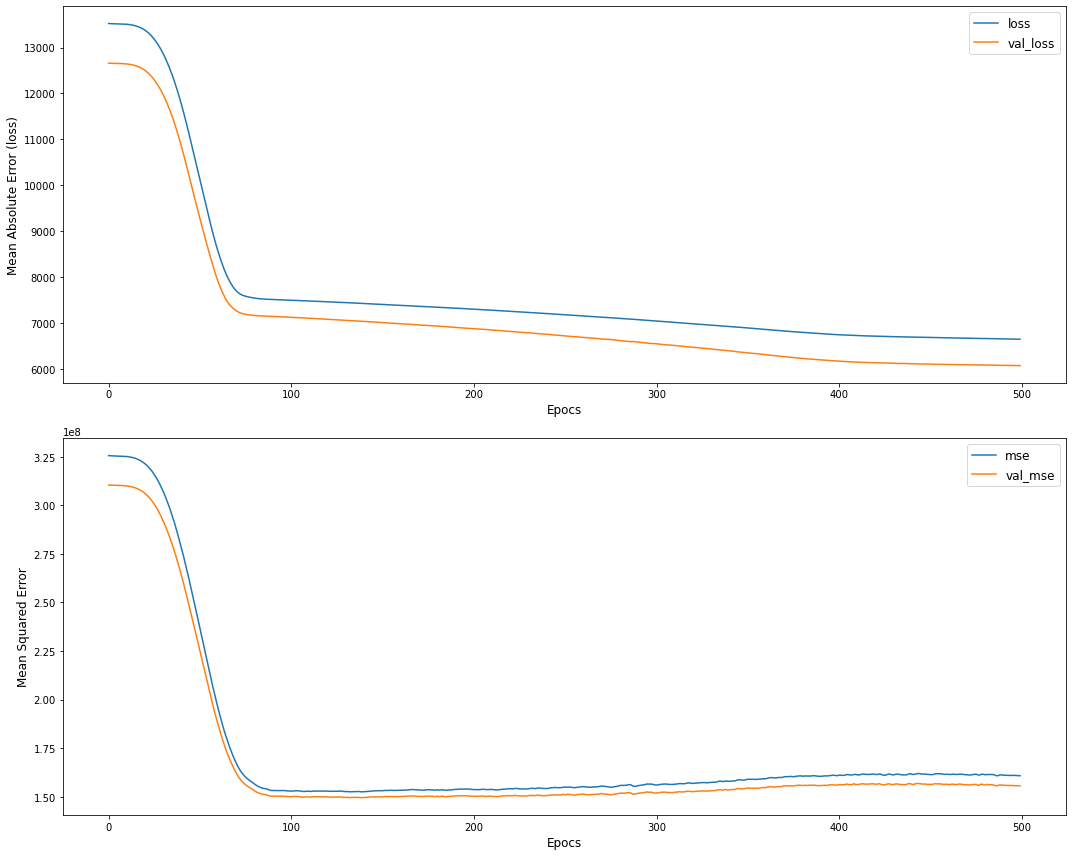

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history.history['loss'], label='loss')
axs[0].plot(history.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history.history['mse'], label='mse')
axs[1].plot(history.history['val_mse'], label='val_mse')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Squared Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(y_test, y_pred) 

-0.03653845883567741

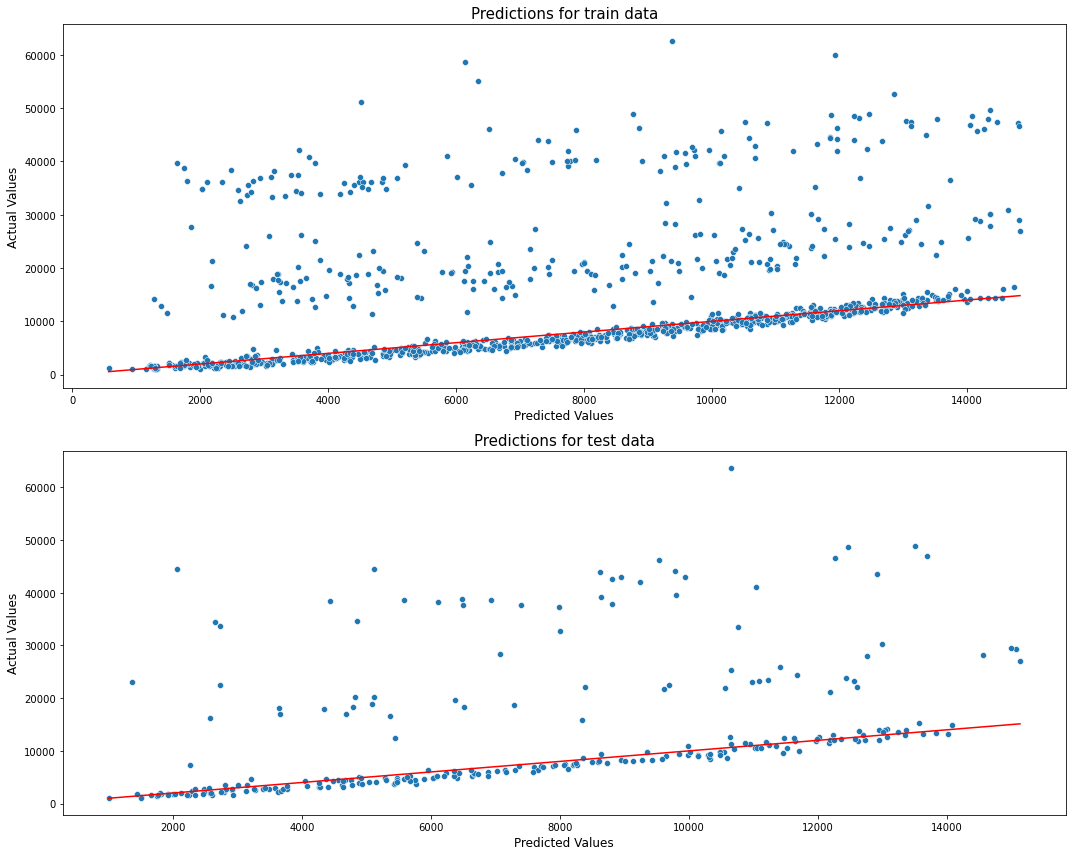

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model.predict(X_train).reshape(-1), model.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred.reshape(-1), y_pred.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [21]:
#model is predicting a lower value than the actual charges for few data points

In [22]:
print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred), np.min(y_pred)))
print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

Predicted values

max: 15130.9951171875
min: 1004.9814453125

Actual values

max: 63770.42801
min: 1131.5066


In [23]:
#model is never predicting a charge value higher than 16k

<AxesSubplot:xlabel='charges', ylabel='Density'>

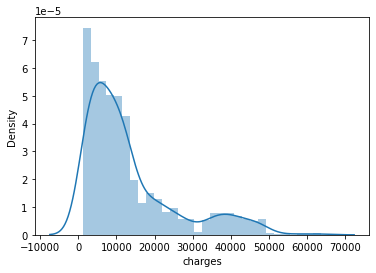

In [24]:
sns.distplot(dfe['charges'])

In [25]:
dfe_more_30k = dfe[dfe['charges']>=30000]
dfe_less_30k = dfe[dfe['charges']<30000]

In [26]:
dfe_more_30k.shape

(162, 7)

In [27]:
dfe_less_30k.shape

(1176, 7)

In [28]:
#considering training separate models for charges (>30k and <=30k) 
#lets try a different NN architecture first 

In [29]:
model2 = Sequential()

model2.add(Dense(15, input_dim=6, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(3, activation='relu'))
model2.add(Dense(1))

model2.compile(loss='mae',
             optimizer='adam',
             metrics=['mse', 'mae'])

In [30]:
history2 = model2.fit(X_train, y_train, batch_size=64, epochs=500,
                     verbose=1, validation_split=0.2)

Epoch 1/500
14/14 [==============================] - 1s 58ms/step - loss: 13516.2783 - mse: 325402880.0000 - mae: 13516.2783 - val_loss: 12652.2656 - val_mse: 310278656.0000 - val_mae: 12652.2656
Epoch 2/500
14/14 [==============================] - 0s 11ms/step - loss: 13514.5586 - mse: 325353632.0000 - mae: 13514.5586 - val_loss: 12650.3330 - val_mse: 310225920.0000 - val_mae: 12650.3330
Epoch 3/500
14/14 [==============================] - 0s 11ms/step - loss: 13512.3340 - mse: 325290112.0000 - mae: 13512.3340 - val_loss: 12647.7656 - val_mse: 310155712.0000 - val_mae: 12647.7656
Epoch 4/500
14/14 [==============================] - 0s 11ms/step - loss: 13509.3369 - mse: 325203712.0000 - mae: 13509.3369 - val_loss: 12644.2598 - val_mse: 310059776.0000 - val_mae: 12644.2598
Epoch 5/500
14/14 [==============================] - 0s 11ms/step - loss: 13505.2178 - mse: 325085536.0000 - mae: 13505.2178 - val_loss: 12639.3994 - val_mse: 309926656.0000 - val_mae: 12639.3994
Epoch 6/500
14/14 [=

14/14 [==============================] - 0s 6ms/step - loss: 7514.2969 - mse: 152244592.0000 - mae: 7514.2969 - val_loss: 7152.6538 - val_mse: 149347680.0000 - val_mae: 7152.6538
Epoch 44/500
14/14 [==============================] - 0s 6ms/step - loss: 7510.6182 - mse: 151968240.0000 - mae: 7510.6182 - val_loss: 7148.6675 - val_mse: 149075088.0000 - val_mae: 7148.6675
Epoch 45/500
14/14 [==============================] - 0s 6ms/step - loss: 7506.3760 - mse: 151980448.0000 - mae: 7506.3760 - val_loss: 7142.6367 - val_mse: 149355808.0000 - val_mae: 7142.6367
Epoch 46/500
14/14 [==============================] - 0s 6ms/step - loss: 7503.5200 - mse: 151937184.0000 - mae: 7503.5200 - val_loss: 7139.0645 - val_mse: 149032944.0000 - val_mae: 7139.0645
Epoch 47/500
14/14 [==============================] - 0s 6ms/step - loss: 7498.5679 - mse: 152030496.0000 - mae: 7498.5679 - val_loss: 7132.4097 - val_mse: 149542400.0000 - val_mae: 7132.4097
Epoch 48/500
14/14 [==============================] -

Epoch 86/500
14/14 [==============================] - 0s 9ms/step - loss: 7339.5874 - mse: 153455728.0000 - mae: 7339.5874 - val_loss: 6927.0977 - val_mse: 150042208.0000 - val_mae: 6927.0977
Epoch 87/500
14/14 [==============================] - 0s 6ms/step - loss: 7334.9043 - mse: 153245952.0000 - mae: 7334.9043 - val_loss: 6923.7778 - val_mse: 149615264.0000 - val_mae: 6923.7778
Epoch 88/500
14/14 [==============================] - 0s 8ms/step - loss: 7330.9590 - mse: 152876752.0000 - mae: 7330.9590 - val_loss: 6918.3218 - val_mse: 149600368.0000 - val_mae: 6918.3218
Epoch 89/500
14/14 [==============================] - 0s 6ms/step - loss: 7326.0708 - mse: 153334656.0000 - mae: 7326.0708 - val_loss: 6908.6250 - val_mse: 150326832.0000 - val_mae: 6908.6250
Epoch 90/500
14/14 [==============================] - 0s 6ms/step - loss: 7322.1401 - mse: 153948640.0000 - mae: 7322.1401 - val_loss: 6902.3760 - val_mse: 150406368.0000 - val_mae: 6902.3760
Epoch 91/500
14/14 [====================

14/14 [==============================] - 0s 7ms/step - loss: 6847.9692 - mse: 158919536.0000 - mae: 6847.9692 - val_loss: 6302.7451 - val_mse: 154147328.0000 - val_mae: 6302.7451
Epoch 171/500
14/14 [==============================] - 0s 6ms/step - loss: 6840.9858 - mse: 158638032.0000 - mae: 6840.9858 - val_loss: 6296.4014 - val_mse: 153936336.0000 - val_mae: 6296.4014
Epoch 172/500
14/14 [==============================] - 0s 6ms/step - loss: 6832.0518 - mse: 159050864.0000 - mae: 6832.0518 - val_loss: 6279.7026 - val_mse: 154890592.0000 - val_mae: 6279.7026
Epoch 173/500
14/14 [==============================] - 0s 6ms/step - loss: 6825.5059 - mse: 159825024.0000 - mae: 6825.5059 - val_loss: 6269.9551 - val_mse: 155009184.0000 - val_mae: 6269.9551
Epoch 174/500
14/14 [==============================] - 0s 8ms/step - loss: 6817.4287 - mse: 159642432.0000 - mae: 6817.4287 - val_loss: 6264.0244 - val_mse: 154671424.0000 - val_mae: 6264.0244
Epoch 175/500
14/14 [============================

14/14 [==============================] - 0s 6ms/step - loss: 6566.5474 - mse: 159222624.0000 - mae: 6566.5474 - val_loss: 5994.0176 - val_mse: 154068880.0000 - val_mae: 5994.0176
Epoch 255/500
14/14 [==============================] - 0s 6ms/step - loss: 6564.1929 - mse: 159561264.0000 - mae: 6564.1929 - val_loss: 5990.2290 - val_mse: 154481872.0000 - val_mae: 5990.2290
Epoch 256/500
14/14 [==============================] - 0s 7ms/step - loss: 6564.7065 - mse: 160169248.0000 - mae: 6564.7065 - val_loss: 5988.1548 - val_mse: 154467520.0000 - val_mae: 5988.1548
Epoch 257/500
14/14 [==============================] - 0s 6ms/step - loss: 6561.4229 - mse: 159064272.0000 - mae: 6561.4229 - val_loss: 5989.6611 - val_mse: 153668320.0000 - val_mae: 5989.6611
Epoch 258/500
14/14 [==============================] - 0s 8ms/step - loss: 6558.2861 - mse: 158968448.0000 - mae: 6558.2861 - val_loss: 5984.4785 - val_mse: 154379840.0000 - val_mae: 5984.4785
Epoch 259/500
14/14 [============================

14/14 [==============================] - 0s 11ms/step - loss: 6370.9951 - mse: 153791424.0000 - mae: 6370.9951 - val_loss: 5814.5518 - val_mse: 148153184.0000 - val_mae: 5814.5518
Epoch 339/500
14/14 [==============================] - 0s 11ms/step - loss: 6365.7793 - mse: 152750096.0000 - mae: 6365.7793 - val_loss: 5813.8540 - val_mse: 147204576.0000 - val_mae: 5813.8540
Epoch 340/500
14/14 [==============================] - 0s 9ms/step - loss: 6363.6763 - mse: 152698016.0000 - mae: 6363.6763 - val_loss: 5808.9199 - val_mse: 147624640.0000 - val_mae: 5808.9199
Epoch 341/500
14/14 [==============================] - 0s 10ms/step - loss: 6359.9653 - mse: 152664688.0000 - mae: 6359.9653 - val_loss: 5806.2910 - val_mse: 147452816.0000 - val_mae: 5806.2910
Epoch 342/500
14/14 [==============================] - 0s 8ms/step - loss: 6356.6909 - mse: 152762912.0000 - mae: 6356.6909 - val_loss: 5803.6143 - val_mse: 147457168.0000 - val_mae: 5803.6143
Epoch 343/500
14/14 [=========================

14/14 [==============================] - 0s 6ms/step - loss: 5938.0483 - mse: 135683600.0000 - mae: 5938.0483 - val_loss: 5425.6006 - val_mse: 131707888.0000 - val_mae: 5425.6006
Epoch 423/500
14/14 [==============================] - 0s 6ms/step - loss: 5927.8477 - mse: 136603488.0000 - mae: 5927.8477 - val_loss: 5418.5947 - val_mse: 131786368.0000 - val_mae: 5418.5947
Epoch 424/500
14/14 [==============================] - 0s 6ms/step - loss: 5916.8086 - mse: 135086288.0000 - mae: 5916.8086 - val_loss: 5409.2412 - val_mse: 131149400.0000 - val_mae: 5409.2412
Epoch 425/500
14/14 [==============================] - 0s 7ms/step - loss: 5906.5620 - mse: 135476096.0000 - mae: 5906.5620 - val_loss: 5402.1367 - val_mse: 131152840.0000 - val_mae: 5402.1367
Epoch 426/500
14/14 [==============================] - 0s 6ms/step - loss: 5895.5835 - mse: 134836112.0000 - mae: 5895.5835 - val_loss: 5391.7197 - val_mse: 130392496.0000 - val_mae: 5391.7197
Epoch 427/500
14/14 [============================

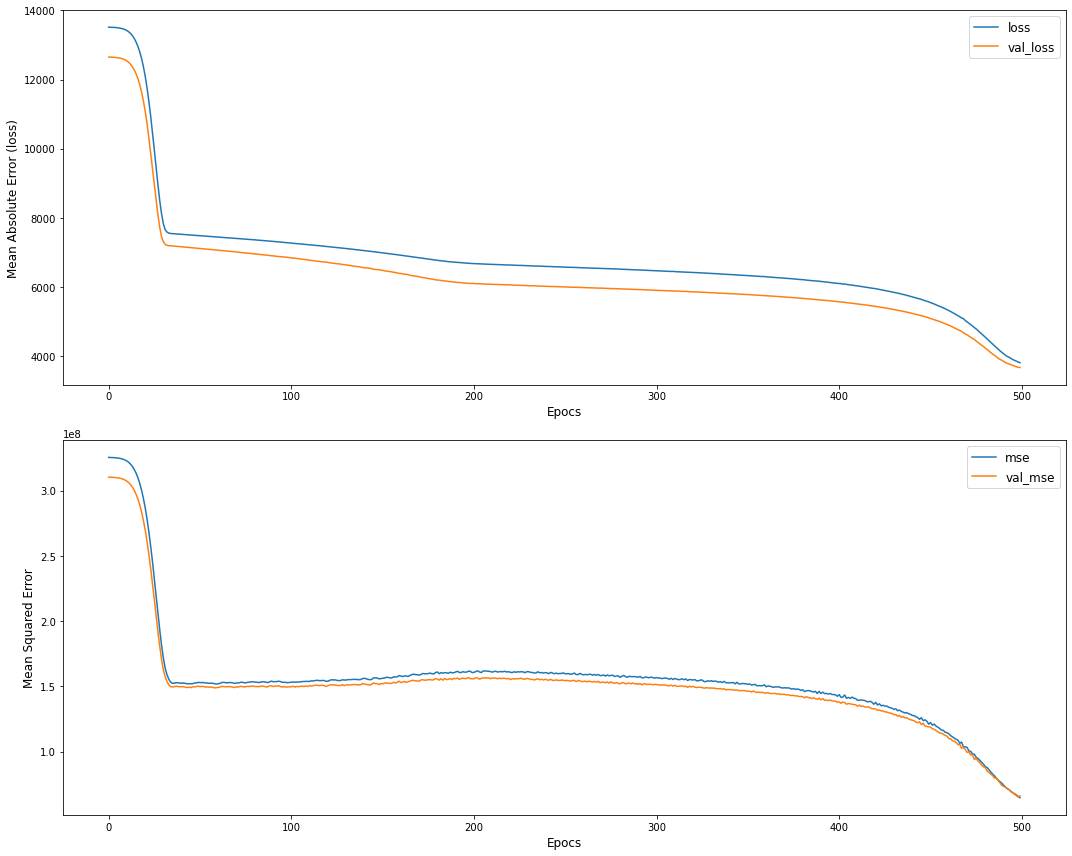

In [31]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history2.history['loss'], label='loss')
axs[0].plot(history2.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history2.history['mse'], label='mse')
axs[1].plot(history2.history['val_mse'], label='val_mse')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Squared Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [32]:
y_pred2 = model2.predict(X_test)
r2_score(y_test, y_pred2) 

0.591200957243863

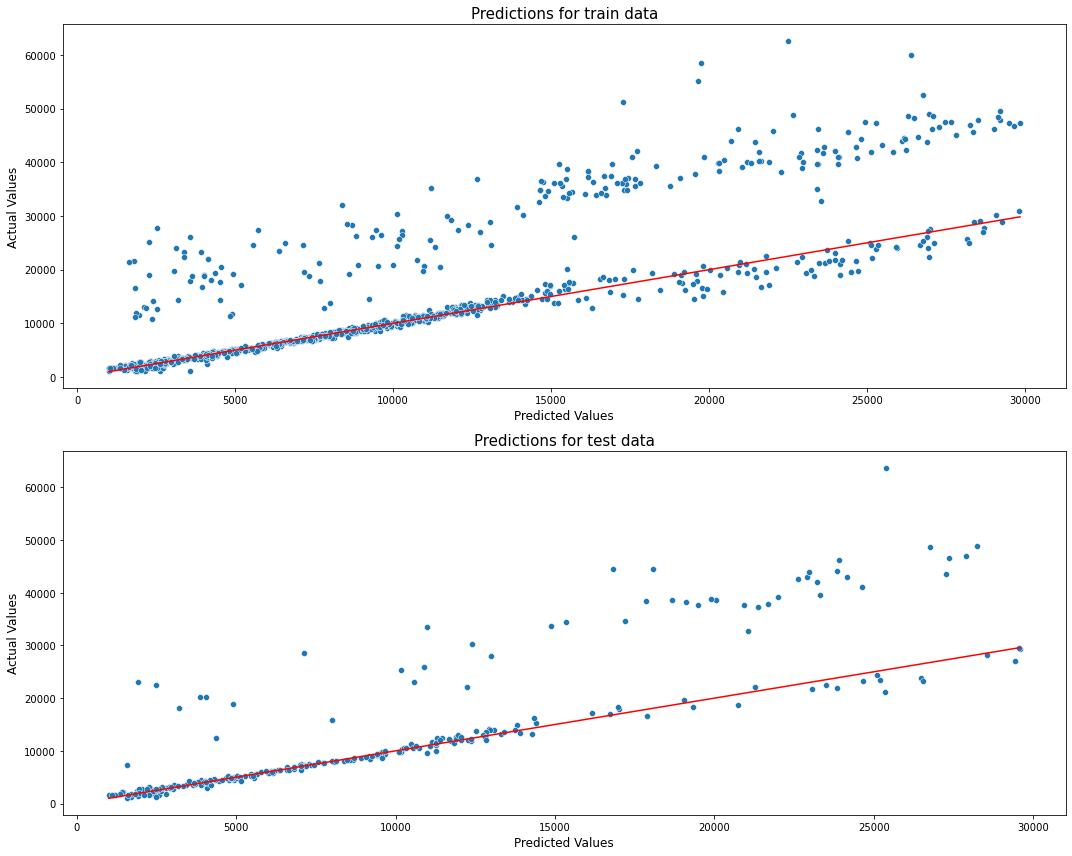

In [33]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model2.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model2.predict(X_train).reshape(-1), model2.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred2.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred2.reshape(-1), y_pred2.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [34]:
#model2 is predicting both higher and lower values for few data points

In [35]:
print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred2), np.min(y_pred2)))
print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

Predicted values

max: 29591.111328125
min: 995.5790405273438

Actual values

max: 63770.42801
min: 1131.5066


In [36]:
#model2's highest prediction charge is around 30k mark
#still never predicts higher than that 

In [37]:
#lets try a deeper neural network arch 

In [58]:
#just realized that final layer should have a RELU activation function
#also considering removing few layers' activation function 

In [39]:
#keeping the same arch, but removing the relu from the 3rd layer

In [40]:
model3 = Sequential()

model3.add(Dense(15, input_dim=6, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(8))
model3.add(Dense(3, activation='relu'))
model3.add(Dense(1, activation='relu'))

model3.compile(loss='mae',
             optimizer='adam',
             metrics=['mse', 'mae'])

In [41]:
history3 = model3.fit(X_train, y_train, batch_size=64, epochs=500,
                     verbose=1, validation_split=0.2)

Epoch 1/500
14/14 [==============================] - 1s 41ms/step - loss: 13516.7568 - mse: 325415072.0000 - mae: 13516.7568 - val_loss: 12652.9600 - val_mse: 310296736.0000 - val_mae: 12652.9600
Epoch 2/500
14/14 [==============================] - 0s 11ms/step - loss: 13515.3408 - mse: 325374016.0000 - mae: 13515.3408 - val_loss: 12651.2715 - val_mse: 310251136.0000 - val_mae: 12651.2715
Epoch 3/500
14/14 [==============================] - 0s 11ms/step - loss: 13513.2656 - mse: 325312832.0000 - mae: 13513.2656 - val_loss: 12648.7207 - val_mse: 310183808.0000 - val_mae: 12648.7207
Epoch 4/500
14/14 [==============================] - 0s 10ms/step - loss: 13510.1211 - mse: 325224160.0000 - mae: 13510.1211 - val_loss: 12644.5518 - val_mse: 310072704.0000 - val_mae: 12644.5518
Epoch 5/500
14/14 [==============================] - 0s 11ms/step - loss: 13504.8994 - mse: 325081120.0000 - mae: 13504.8994 - val_loss: 12636.7969 - val_mse: 309878048.0000 - val_mae: 12636.7969
Epoch 6/500
14/14 [=

Epoch 86/500
14/14 [==============================] - 0s 9ms/step - loss: 6763.0146 - mse: 163093536.0000 - mae: 6763.0146 - val_loss: 6177.6797 - val_mse: 158606368.0000 - val_mae: 6177.6797
Epoch 87/500
14/14 [==============================] - 0s 6ms/step - loss: 6757.9712 - mse: 163083568.0000 - mae: 6757.9712 - val_loss: 6174.2437 - val_mse: 158112096.0000 - val_mae: 6174.2437
Epoch 88/500
14/14 [==============================] - 0s 6ms/step - loss: 6753.3691 - mse: 162485520.0000 - mae: 6753.3691 - val_loss: 6168.5527 - val_mse: 158221216.0000 - val_mae: 6168.5527
Epoch 89/500
14/14 [==============================] - 0s 6ms/step - loss: 6751.0322 - mse: 163309376.0000 - mae: 6751.0322 - val_loss: 6160.0244 - val_mse: 158569984.0000 - val_mae: 6160.0244
Epoch 90/500
14/14 [==============================] - 0s 8ms/step - loss: 6744.2803 - mse: 163048112.0000 - mae: 6744.2803 - val_loss: 6154.1001 - val_mse: 158576224.0000 - val_mae: 6154.1001
Epoch 91/500
14/14 [====================

14/14 [==============================] - 0s 6ms/step - loss: 6494.0381 - mse: 158421152.0000 - mae: 6494.0381 - val_loss: 5914.8604 - val_mse: 152391072.0000 - val_mae: 5914.8604
Epoch 171/500
14/14 [==============================] - 0s 9ms/step - loss: 6488.4014 - mse: 157197168.0000 - mae: 6488.4014 - val_loss: 5911.2935 - val_mse: 152262160.0000 - val_mae: 5911.2935
Epoch 172/500
14/14 [==============================] - 0s 6ms/step - loss: 6485.5854 - mse: 157997312.0000 - mae: 6485.5854 - val_loss: 5907.5605 - val_mse: 152107248.0000 - val_mae: 5907.5605
Epoch 173/500
14/14 [==============================] - 0s 9ms/step - loss: 6486.0117 - mse: 156327424.0000 - mae: 6486.0117 - val_loss: 5902.3989 - val_mse: 152359824.0000 - val_mae: 5902.3989
Epoch 174/500
14/14 [==============================] - 0s 6ms/step - loss: 6477.8833 - mse: 158041456.0000 - mae: 6477.8833 - val_loss: 5898.4531 - val_mse: 152525376.0000 - val_mae: 5898.4531
Epoch 175/500
14/14 [============================

14/14 [==============================] - 0s 9ms/step - loss: 5602.8306 - mse: 121146136.0000 - mae: 5602.8306 - val_loss: 5144.8047 - val_mse: 120688560.0000 - val_mae: 5144.8047
Epoch 255/500
14/14 [==============================] - 0s 6ms/step - loss: 5567.3481 - mse: 121662128.0000 - mae: 5567.3481 - val_loss: 5110.1299 - val_mse: 116274896.0000 - val_mae: 5110.1299
Epoch 256/500
14/14 [==============================] - 0s 6ms/step - loss: 5529.8989 - mse: 120479480.0000 - mae: 5529.8989 - val_loss: 5106.4146 - val_mse: 113768304.0000 - val_mae: 5106.4146
Epoch 257/500
14/14 [==============================] - 0s 8ms/step - loss: 5485.8804 - mse: 117510552.0000 - mae: 5485.8804 - val_loss: 5059.5732 - val_mse: 117098352.0000 - val_mae: 5059.5732
Epoch 258/500
14/14 [==============================] - 0s 6ms/step - loss: 5454.7451 - mse: 117523512.0000 - mae: 5454.7451 - val_loss: 5019.7095 - val_mse: 112905616.0000 - val_mae: 5019.7095
Epoch 259/500
14/14 [============================

Epoch 297/500
14/14 [==============================] - 0s 11ms/step - loss: 3791.9431 - mse: 60213324.0000 - mae: 3791.9431 - val_loss: 3618.3362 - val_mse: 59910636.0000 - val_mae: 3618.3362
Epoch 298/500
14/14 [==============================] - 0s 10ms/step - loss: 3780.9866 - mse: 59603976.0000 - mae: 3780.9866 - val_loss: 3596.1741 - val_mse: 60286432.0000 - val_mae: 3596.1741
Epoch 299/500
14/14 [==============================] - 0s 7ms/step - loss: 3769.0520 - mse: 59321348.0000 - mae: 3769.0520 - val_loss: 3588.3098 - val_mse: 58844668.0000 - val_mae: 3588.3098
Epoch 300/500
14/14 [==============================] - 0s 8ms/step - loss: 3756.2930 - mse: 58537516.0000 - mae: 3756.2930 - val_loss: 3570.9614 - val_mse: 59187436.0000 - val_mae: 3570.9614
Epoch 301/500
14/14 [==============================] - 0s 7ms/step - loss: 3749.8066 - mse: 58370904.0000 - mae: 3749.8066 - val_loss: 3560.4199 - val_mse: 58579544.0000 - val_mae: 3560.4199
Epoch 302/500
14/14 [======================

Epoch 340/500
14/14 [==============================] - 0s 8ms/step - loss: 3577.2883 - mse: 49800460.0000 - mae: 3577.2883 - val_loss: 3354.3855 - val_mse: 48949672.0000 - val_mae: 3354.3855
Epoch 341/500
14/14 [==============================] - 0s 6ms/step - loss: 3571.5164 - mse: 49704404.0000 - mae: 3571.5164 - val_loss: 3365.7004 - val_mse: 47983392.0000 - val_mae: 3365.7004
Epoch 342/500
14/14 [==============================] - 0s 8ms/step - loss: 3575.8384 - mse: 49006668.0000 - mae: 3575.8384 - val_loss: 3344.4016 - val_mse: 48178672.0000 - val_mae: 3344.4016
Epoch 343/500
14/14 [==============================] - 0s 8ms/step - loss: 3566.5244 - mse: 48983592.0000 - mae: 3566.5244 - val_loss: 3339.3477 - val_mse: 48393876.0000 - val_mae: 3339.3477
Epoch 344/500
14/14 [==============================] - 0s 8ms/step - loss: 3566.4717 - mse: 48936448.0000 - mae: 3566.4717 - val_loss: 3350.0505 - val_mse: 47477224.0000 - val_mae: 3350.0505
Epoch 345/500
14/14 [========================

Epoch 383/500
14/14 [==============================] - 0s 8ms/step - loss: 3457.8562 - mse: 41933508.0000 - mae: 3457.8562 - val_loss: 3173.3755 - val_mse: 40151452.0000 - val_mae: 3173.3755
Epoch 384/500
14/14 [==============================] - 0s 7ms/step - loss: 3452.3760 - mse: 41932676.0000 - mae: 3452.3760 - val_loss: 3169.2932 - val_mse: 39863096.0000 - val_mae: 3169.2932
Epoch 385/500
14/14 [==============================] - 0s 6ms/step - loss: 3458.3179 - mse: 41781520.0000 - mae: 3458.3179 - val_loss: 3186.6011 - val_mse: 40335208.0000 - val_mae: 3186.6011
Epoch 386/500
14/14 [==============================] - 0s 9ms/step - loss: 3456.4050 - mse: 41608012.0000 - mae: 3456.4050 - val_loss: 3163.2563 - val_mse: 39944048.0000 - val_mae: 3163.2563
Epoch 387/500
14/14 [==============================] - 0s 6ms/step - loss: 3449.1863 - mse: 41712388.0000 - mae: 3449.1863 - val_loss: 3160.5068 - val_mse: 39806308.0000 - val_mae: 3160.5068
Epoch 388/500
14/14 [========================

Epoch 426/500
14/14 [==============================] - 0s 9ms/step - loss: 3334.2039 - mse: 40538396.0000 - mae: 3334.2039 - val_loss: 2962.2256 - val_mse: 35754764.0000 - val_mae: 2962.2256
Epoch 427/500
14/14 [==============================] - 0s 9ms/step - loss: 3337.7192 - mse: 40713444.0000 - mae: 3337.7192 - val_loss: 2967.4062 - val_mse: 35545932.0000 - val_mae: 2967.4062
Epoch 428/500
14/14 [==============================] - 0s 6ms/step - loss: 3335.5281 - mse: 40792036.0000 - mae: 3335.5281 - val_loss: 2951.1016 - val_mse: 35423684.0000 - val_mae: 2951.1016
Epoch 429/500
14/14 [==============================] - 0s 8ms/step - loss: 3324.1252 - mse: 40968028.0000 - mae: 3324.1252 - val_loss: 2938.2659 - val_mse: 35570204.0000 - val_mae: 2938.2659
Epoch 430/500
14/14 [==============================] - 0s 6ms/step - loss: 3318.4126 - mse: 40990824.0000 - mae: 3318.4126 - val_loss: 2935.3318 - val_mse: 35384892.0000 - val_mae: 2935.3318
Epoch 431/500
14/14 [========================

Epoch 469/500
14/14 [==============================] - 0s 6ms/step - loss: 3219.8665 - mse: 43627912.0000 - mae: 3219.8665 - val_loss: 2818.7739 - val_mse: 35764228.0000 - val_mae: 2818.7739
Epoch 470/500
14/14 [==============================] - 0s 8ms/step - loss: 3229.2012 - mse: 44055476.0000 - mae: 3229.2012 - val_loss: 2841.4937 - val_mse: 36017384.0000 - val_mae: 2841.4937
Epoch 471/500
14/14 [==============================] - 0s 6ms/step - loss: 3232.5420 - mse: 44075644.0000 - mae: 3232.5420 - val_loss: 2822.9751 - val_mse: 35882456.0000 - val_mae: 2822.9751
Epoch 472/500
14/14 [==============================] - 0s 9ms/step - loss: 3228.4705 - mse: 43906684.0000 - mae: 3228.4705 - val_loss: 2814.9631 - val_mse: 35838324.0000 - val_mae: 2814.9631
Epoch 473/500
14/14 [==============================] - 0s 8ms/step - loss: 3224.8701 - mse: 43602912.0000 - mae: 3224.8701 - val_loss: 2816.6401 - val_mse: 35700680.0000 - val_mae: 2816.6401
Epoch 474/500
14/14 [========================

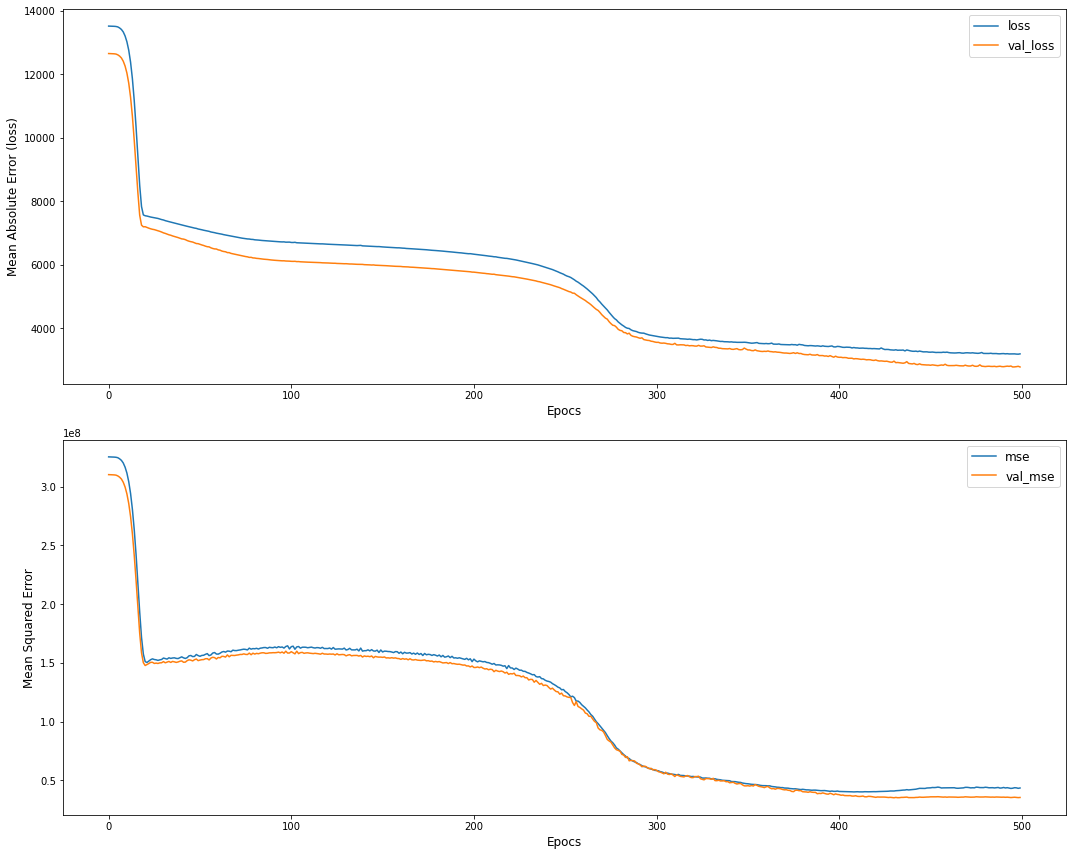

In [42]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history3.history['loss'], label='loss')
axs[0].plot(history3.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history3.history['mse'], label='mse')
axs[1].plot(history3.history['val_mse'], label='val_mse')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Squared Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [43]:
y_pred3 = model3.predict(X_test)
r2_score(y_test, y_pred3) 

0.7750199334765062

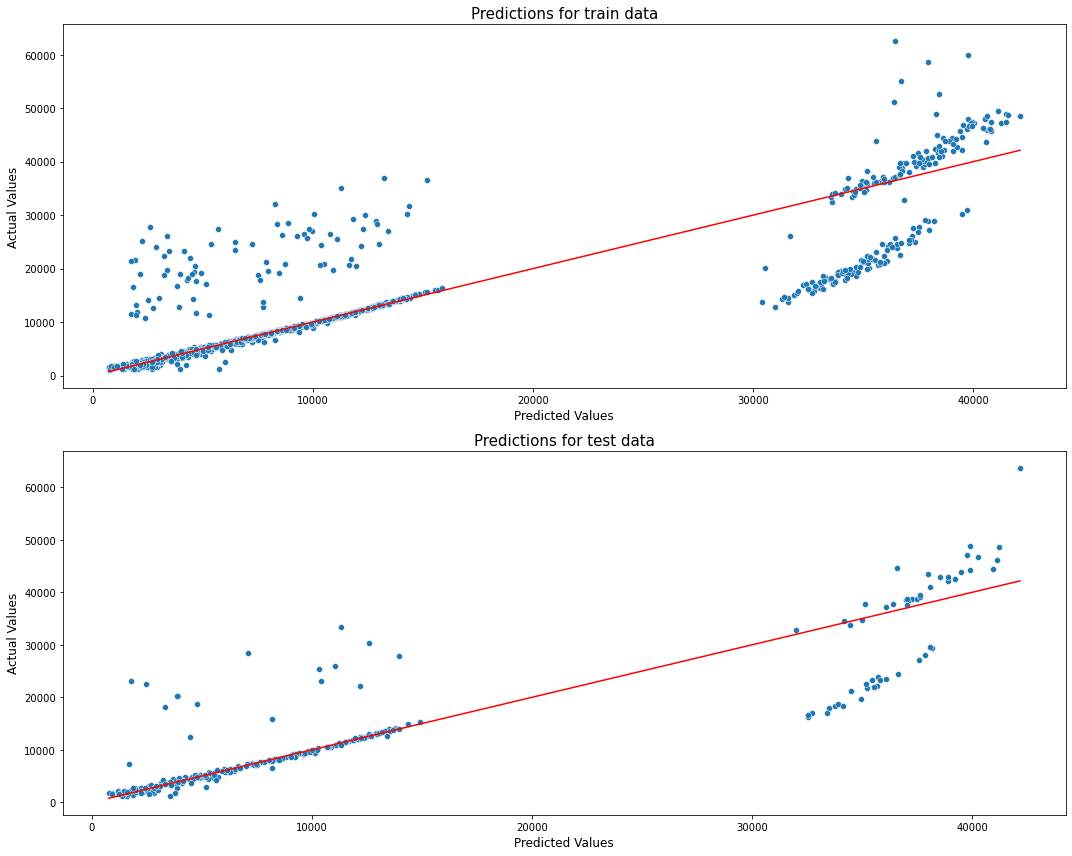

In [44]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model3.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model3.predict(X_train).reshape(-1), model3.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred3.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred3.reshape(-1), y_pred3.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [45]:
print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred3), np.min(y_pred3)))
print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

Predicted values

max: 42172.8515625
min: 757.5557250976562

Actual values

max: 63770.42801
min: 1131.5066


In [46]:
#upper limit for prediction has increased to around 42k
#lets experiment with the NN arch little more

In [47]:
model4 = Sequential()

model4.add(Dense(15, input_dim=6))
model4.add(Dense(15, activation='relu'))
model4.add(Dense(8))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(4, activation='relu'))
model4.add(Dense(1, activation='relu'))

model4.compile(loss='mae',
             optimizer='adam',
             metrics=['mse', 'mae'])

In [48]:
history4 = model4.fit(X_train, y_train, batch_size=64, epochs=500,
                     verbose=1, validation_split=0.2)

Epoch 1/500
14/14 [==============================] - 1s 41ms/step - loss: 13518.4570 - mse: 325465088.0000 - mae: 13518.4570 - val_loss: 12654.7520 - val_mse: 310346624.0000 - val_mae: 12654.7520
Epoch 2/500
14/14 [==============================] - 0s 10ms/step - loss: 13517.1895 - mse: 325429696.0000 - mae: 13517.1895 - val_loss: 12652.9902 - val_mse: 310298400.0000 - val_mae: 12652.9902
Epoch 3/500
14/14 [==============================] - 0s 12ms/step - loss: 13514.8926 - mse: 325362912.0000 - mae: 13514.8926 - val_loss: 12649.9717 - val_mse: 310215456.0000 - val_mae: 12649.9717
Epoch 4/500
14/14 [==============================] - 0s 10ms/step - loss: 13510.9219 - mse: 325249312.0000 - mae: 13510.9219 - val_loss: 12644.6826 - val_mse: 310069920.0000 - val_mae: 12644.6826
Epoch 5/500
14/14 [==============================] - 0s 12ms/step - loss: 13503.8799 - mse: 325050240.0000 - mae: 13503.8799 - val_loss: 12635.3594 - val_mse: 309813664.0000 - val_mae: 12635.3594
Epoch 6/500
14/14 [=

Epoch 86/500
14/14 [==============================] - 0s 6ms/step - loss: 6975.0981 - mse: 157279648.0000 - mae: 6975.0981 - val_loss: 6452.6309 - val_mse: 153705760.0000 - val_mae: 6452.6309
Epoch 87/500
14/14 [==============================] - 0s 8ms/step - loss: 6965.2466 - mse: 158089968.0000 - mae: 6965.2466 - val_loss: 6439.7231 - val_mse: 153624544.0000 - val_mae: 6439.7231
Epoch 88/500
14/14 [==============================] - 0s 9ms/step - loss: 6953.1880 - mse: 158076112.0000 - mae: 6953.1880 - val_loss: 6428.6567 - val_mse: 153386544.0000 - val_mae: 6428.6567
Epoch 89/500
14/14 [==============================] - 0s 9ms/step - loss: 6947.7651 - mse: 157042464.0000 - mae: 6947.7651 - val_loss: 6414.5625 - val_mse: 153524752.0000 - val_mae: 6414.5625
Epoch 90/500
14/14 [==============================] - 0s 8ms/step - loss: 6932.8687 - mse: 159041392.0000 - mae: 6932.8687 - val_loss: 6392.7554 - val_mse: 154541824.0000 - val_mae: 6392.7554
Epoch 91/500
14/14 [====================

14/14 [==============================] - 0s 10ms/step - loss: 6552.5674 - mse: 159332992.0000 - mae: 6552.5674 - val_loss: 5983.4673 - val_mse: 153677792.0000 - val_mae: 5983.4673
Epoch 171/500
14/14 [==============================] - 0s 9ms/step - loss: 6546.2261 - mse: 158530784.0000 - mae: 6546.2261 - val_loss: 5986.2661 - val_mse: 152005648.0000 - val_mae: 5986.2661
Epoch 172/500
14/14 [==============================] - 0s 8ms/step - loss: 6544.6963 - mse: 157124800.0000 - mae: 6544.6963 - val_loss: 5980.5923 - val_mse: 152289984.0000 - val_mae: 5980.5923
Epoch 173/500
14/14 [==============================] - 0s 9ms/step - loss: 6548.3804 - mse: 159472992.0000 - mae: 6548.3804 - val_loss: 5973.8892 - val_mse: 153191664.0000 - val_mae: 5973.8892
Epoch 174/500
14/14 [==============================] - 0s 6ms/step - loss: 6536.3159 - mse: 157374688.0000 - mae: 6536.3159 - val_loss: 5974.2822 - val_mse: 152007168.0000 - val_mae: 5974.2822
Epoch 175/500
14/14 [===========================

14/14 [==============================] - 0s 9ms/step - loss: 5889.4082 - mse: 133709368.0000 - mae: 5889.4082 - val_loss: 5395.1201 - val_mse: 128223824.0000 - val_mae: 5395.1201
Epoch 255/500
14/14 [==============================] - 0s 8ms/step - loss: 5869.6489 - mse: 132301392.0000 - mae: 5869.6489 - val_loss: 5377.3125 - val_mse: 128807352.0000 - val_mae: 5377.3125
Epoch 256/500
14/14 [==============================] - 0s 6ms/step - loss: 5843.5005 - mse: 131120416.0000 - mae: 5843.5005 - val_loss: 5352.3906 - val_mse: 127683592.0000 - val_mae: 5352.3906
Epoch 257/500
14/14 [==============================] - 0s 6ms/step - loss: 5817.6333 - mse: 131340040.0000 - mae: 5817.6333 - val_loss: 5329.5786 - val_mse: 123944520.0000 - val_mae: 5329.5786
Epoch 258/500
14/14 [==============================] - 0s 6ms/step - loss: 5782.6431 - mse: 129409368.0000 - mae: 5782.6431 - val_loss: 5311.1685 - val_mse: 126354272.0000 - val_mae: 5311.1685
Epoch 259/500
14/14 [============================

Epoch 297/500
14/14 [==============================] - 0s 8ms/step - loss: 3641.9556 - mse: 53749048.0000 - mae: 3641.9556 - val_loss: 3424.3303 - val_mse: 53459076.0000 - val_mae: 3424.3303
Epoch 298/500
14/14 [==============================] - 0s 6ms/step - loss: 3630.3120 - mse: 52890364.0000 - mae: 3630.3120 - val_loss: 3416.2917 - val_mse: 53034368.0000 - val_mae: 3416.2917
Epoch 299/500
14/14 [==============================] - 0s 7ms/step - loss: 3630.1531 - mse: 52358024.0000 - mae: 3630.1531 - val_loss: 3405.2188 - val_mse: 52132792.0000 - val_mae: 3405.2188
Epoch 300/500
14/14 [==============================] - 0s 7ms/step - loss: 3621.4585 - mse: 51839376.0000 - mae: 3621.4585 - val_loss: 3398.0427 - val_mse: 51924412.0000 - val_mae: 3398.0427
Epoch 301/500
14/14 [==============================] - 0s 9ms/step - loss: 3619.1904 - mse: 51591068.0000 - mae: 3619.1904 - val_loss: 3415.2883 - val_mse: 50180852.0000 - val_mae: 3415.2883
Epoch 302/500
14/14 [========================

Epoch 340/500
14/14 [==============================] - 0s 6ms/step - loss: 3495.1069 - mse: 42873176.0000 - mae: 3495.1069 - val_loss: 3182.1565 - val_mse: 40709340.0000 - val_mae: 3182.1565
Epoch 341/500
14/14 [==============================] - 0s 6ms/step - loss: 3496.9678 - mse: 43003068.0000 - mae: 3496.9678 - val_loss: 3150.5935 - val_mse: 40391412.0000 - val_mae: 3150.5935
Epoch 342/500
14/14 [==============================] - 0s 9ms/step - loss: 3489.2844 - mse: 43087540.0000 - mae: 3489.2844 - val_loss: 3142.7229 - val_mse: 40233792.0000 - val_mae: 3142.7229
Epoch 343/500
14/14 [==============================] - 0s 6ms/step - loss: 3488.0403 - mse: 43181912.0000 - mae: 3488.0403 - val_loss: 3138.2600 - val_mse: 40206660.0000 - val_mae: 3138.2600
Epoch 344/500
14/14 [==============================] - 0s 6ms/step - loss: 3494.6506 - mse: 43065908.0000 - mae: 3494.6506 - val_loss: 3127.2466 - val_mse: 39811100.0000 - val_mae: 3127.2466
Epoch 345/500
14/14 [========================

Epoch 383/500
14/14 [==============================] - 0s 6ms/step - loss: 3420.3733 - mse: 49157476.0000 - mae: 3420.3733 - val_loss: 3037.1858 - val_mse: 42882104.0000 - val_mae: 3037.1858
Epoch 384/500
14/14 [==============================] - 0s 8ms/step - loss: 3415.0688 - mse: 49191080.0000 - mae: 3415.0688 - val_loss: 2995.1157 - val_mse: 42737632.0000 - val_mae: 2995.1157
Epoch 385/500
14/14 [==============================] - 0s 13ms/step - loss: 3431.6790 - mse: 49436068.0000 - mae: 3431.6790 - val_loss: 2991.0667 - val_mse: 42882752.0000 - val_mae: 2991.0667
Epoch 386/500
14/14 [==============================] - 0s 10ms/step - loss: 3409.8271 - mse: 49375848.0000 - mae: 3409.8271 - val_loss: 2980.4495 - val_mse: 42862736.0000 - val_mae: 2980.4495
Epoch 387/500
14/14 [==============================] - 0s 10ms/step - loss: 3434.5427 - mse: 49209288.0000 - mae: 3434.5427 - val_loss: 2981.1641 - val_mse: 42623880.0000 - val_mae: 2981.1641
Epoch 388/500
14/14 [=====================

Epoch 426/500
14/14 [==============================] - 0s 6ms/step - loss: 3367.8120 - mse: 48776588.0000 - mae: 3367.8120 - val_loss: 2937.4985 - val_mse: 42161988.0000 - val_mae: 2937.4985
Epoch 427/500
14/14 [==============================] - 0s 6ms/step - loss: 3366.3586 - mse: 48740928.0000 - mae: 3366.3586 - val_loss: 2933.8271 - val_mse: 42158608.0000 - val_mae: 2933.8271
Epoch 428/500
14/14 [==============================] - 0s 6ms/step - loss: 3364.7722 - mse: 48673396.0000 - mae: 3364.7722 - val_loss: 2938.4683 - val_mse: 42098488.0000 - val_mae: 2938.4683
Epoch 429/500
14/14 [==============================] - 0s 8ms/step - loss: 3362.2981 - mse: 48603176.0000 - mae: 3362.2981 - val_loss: 2927.7676 - val_mse: 41988584.0000 - val_mae: 2927.7676
Epoch 430/500
14/14 [==============================] - 0s 8ms/step - loss: 3360.2976 - mse: 48470148.0000 - mae: 3360.2976 - val_loss: 2960.4597 - val_mse: 41937376.0000 - val_mae: 2960.4597
Epoch 431/500
14/14 [========================

Epoch 469/500
14/14 [==============================] - 0s 7ms/step - loss: 3322.2163 - mse: 49012624.0000 - mae: 3322.2163 - val_loss: 2870.5823 - val_mse: 41341252.0000 - val_mae: 2870.5823
Epoch 470/500
14/14 [==============================] - 0s 7ms/step - loss: 3313.1875 - mse: 48865648.0000 - mae: 3313.1875 - val_loss: 2873.0134 - val_mse: 41256964.0000 - val_mae: 2873.0134
Epoch 471/500
14/14 [==============================] - 0s 7ms/step - loss: 3308.7407 - mse: 48875828.0000 - mae: 3308.7407 - val_loss: 2863.4668 - val_mse: 41369924.0000 - val_mae: 2863.4668
Epoch 472/500
14/14 [==============================] - 0s 8ms/step - loss: 3305.4580 - mse: 48953272.0000 - mae: 3305.4580 - val_loss: 2859.0281 - val_mse: 41360108.0000 - val_mae: 2859.0281
Epoch 473/500
14/14 [==============================] - 0s 6ms/step - loss: 3305.9275 - mse: 48792620.0000 - mae: 3305.9275 - val_loss: 2856.8982 - val_mse: 41160712.0000 - val_mae: 2856.8982
Epoch 474/500
14/14 [========================

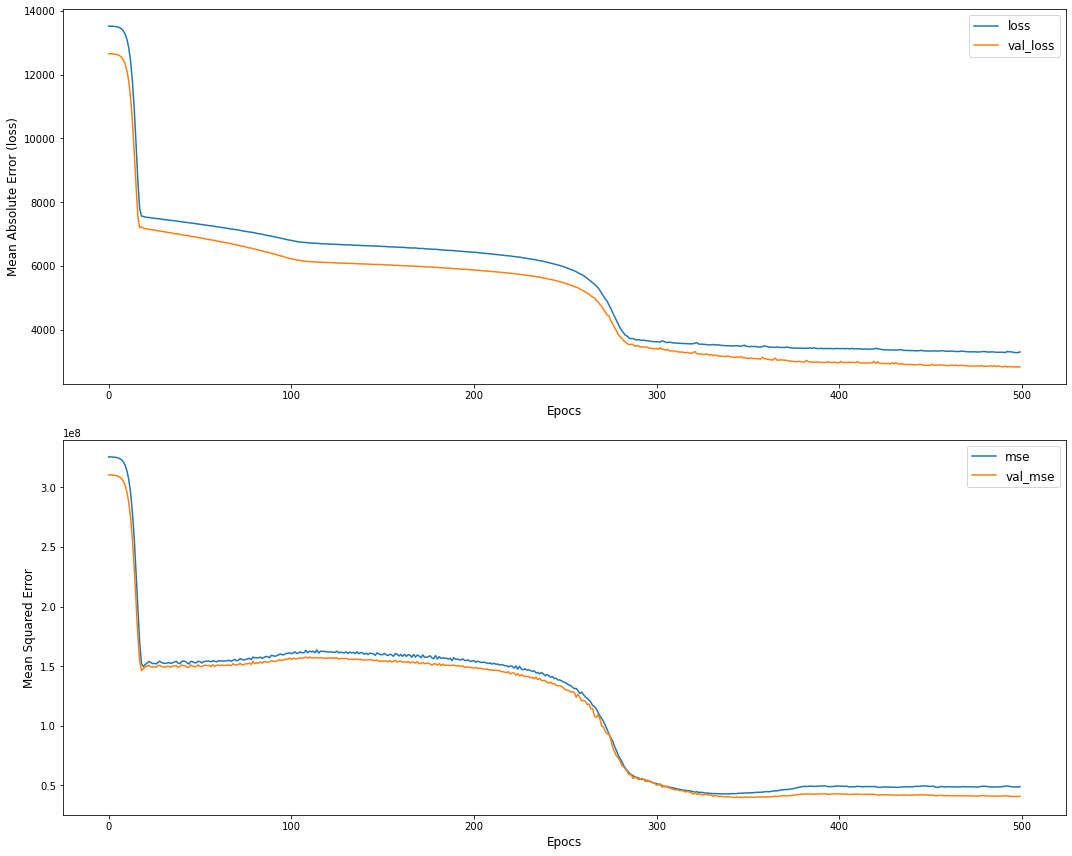

In [49]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history4.history['loss'], label='loss')
axs[0].plot(history4.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history4.history['mse'], label='mse')
axs[1].plot(history4.history['val_mse'], label='val_mse')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Squared Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [50]:
y_pred4 = model4.predict(X_test)
r2_score(y_test, y_pred4) 

0.7346493614067573

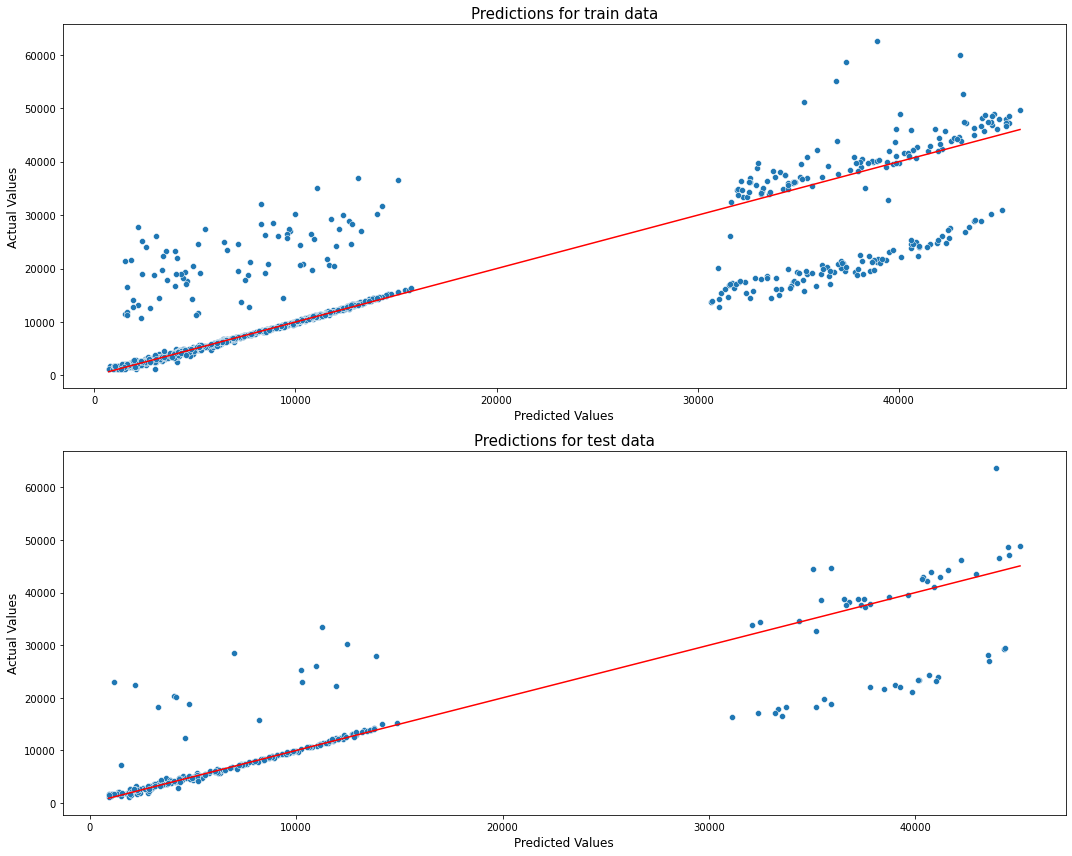

In [51]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model4.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model4.predict(X_train).reshape(-1), model4.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred4.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred4.reshape(-1), y_pred4.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [52]:
print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred4), np.min(y_pred4)))
print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

Predicted values

max: 45075.78515625
min: 914.626708984375

Actual values

max: 63770.42801
min: 1131.5066


In [60]:
#the max predicted value has incresed from 42k to 45k
#not that great of an increase

In [75]:
#lets try a deeper neural network 

In [72]:
model5 = Sequential()

model5.add(Dense(15, input_dim=6))
model5.add(Dense(15, activation='relu'))
model5.add(Dense(10, activation='relu'))
model5.add(Dense(8, activation='relu'))
model5.add(Dense(6, activation='relu'))
model5.add(Dense(6, activation='relu'))
model5.add(Dense(4, activation='relu'))
model5.add(Dense(2, activation='relu'))
model5.add(Dense(2, activation='relu'))
model5.add(Dense(1, activation='relu'))

model5.compile(loss='mae',
             optimizer='adam',
             metrics=['mse', 'mae'])

In [73]:
history5 = model5.fit(X_train, y_train, batch_size=64, epochs=500,\
                     verbose=1, validation_split=0.2)

Epoch 1/500
14/14 [==============================] - 1s 43ms/step - loss: 13518.5479 - mse: 325467648.0000 - mae: 13518.5479 - val_loss: 12655.2080 - val_mse: 310358624.0000 - val_mae: 12655.2080
Epoch 2/500
14/14 [==============================] - 0s 11ms/step - loss: 13518.0469 - mse: 325453184.0000 - mae: 13518.0469 - val_loss: 12654.4365 - val_mse: 310337344.0000 - val_mae: 12654.4365
Epoch 3/500
14/14 [==============================] - 0s 31ms/step - loss: 13516.8740 - mse: 325418816.0000 - mae: 13516.8740 - val_loss: 12652.6572 - val_mse: 310288256.0000 - val_mae: 12652.6572
Epoch 4/500
14/14 [==============================] - 0s 11ms/step - loss: 13514.2393 - mse: 325344096.0000 - mae: 13514.2393 - val_loss: 12648.7285 - val_mse: 310179904.0000 - val_mae: 12648.7285
Epoch 5/500
14/14 [==============================] - 0s 11ms/step - loss: 13508.5381 - mse: 325179424.0000 - mae: 13508.5381 - val_loss: 12640.4297 - val_mse: 309951232.0000 - val_mae: 12640.4297
Epoch 6/500
14/14 [=

Epoch 86/500
14/14 [==============================] - 0s 9ms/step - loss: 6733.9429 - mse: 164944256.0000 - mae: 6733.9429 - val_loss: 6146.0161 - val_mse: 158324336.0000 - val_mae: 6146.0161
Epoch 87/500
14/14 [==============================] - 0s 9ms/step - loss: 6730.4814 - mse: 164447264.0000 - mae: 6730.4814 - val_loss: 6136.5215 - val_mse: 158991424.0000 - val_mae: 6136.5215
Epoch 88/500
14/14 [==============================] - 0s 9ms/step - loss: 6729.7432 - mse: 163530784.0000 - mae: 6729.7432 - val_loss: 6132.3389 - val_mse: 160885792.0000 - val_mae: 6132.3389
Epoch 89/500
14/14 [==============================] - 0s 8ms/step - loss: 6726.5830 - mse: 164887600.0000 - mae: 6726.5830 - val_loss: 6135.2144 - val_mse: 158064192.0000 - val_mae: 6135.2144
Epoch 90/500
14/14 [==============================] - 0s 8ms/step - loss: 6719.3613 - mse: 163483968.0000 - mae: 6719.3613 - val_loss: 6125.7437 - val_mse: 160704192.0000 - val_mae: 6125.7437
Epoch 91/500
14/14 [====================

14/14 [==============================] - 0s 10ms/step - loss: 6327.4980 - mse: 152029808.0000 - mae: 6327.4980 - val_loss: 5758.6577 - val_mse: 145714704.0000 - val_mae: 5758.6577
Epoch 171/500
14/14 [==============================] - 0s 8ms/step - loss: 6324.6470 - mse: 151654480.0000 - mae: 6324.6470 - val_loss: 5755.3447 - val_mse: 147167056.0000 - val_mae: 5755.3447
Epoch 172/500
14/14 [==============================] - 0s 14ms/step - loss: 6310.4429 - mse: 149531888.0000 - mae: 6310.4429 - val_loss: 5771.4966 - val_mse: 148186160.0000 - val_mae: 5771.4966
Epoch 173/500
14/14 [==============================] - 0s 12ms/step - loss: 6314.9780 - mse: 150413520.0000 - mae: 6314.9780 - val_loss: 5754.3760 - val_mse: 147471824.0000 - val_mae: 5754.3760
Epoch 174/500
14/14 [==============================] - 0s 10ms/step - loss: 6289.3135 - mse: 150357248.0000 - mae: 6289.3135 - val_loss: 5740.0269 - val_mse: 142738368.0000 - val_mae: 5740.0269
Epoch 175/500
14/14 [========================

Epoch 255/500
14/14 [==============================] - 0s 12ms/step - loss: 3515.8154 - mse: 41809052.0000 - mae: 3515.8154 - val_loss: 3169.7573 - val_mse: 38391408.0000 - val_mae: 3169.7576
Epoch 256/500
14/14 [==============================] - 0s 12ms/step - loss: 3517.3438 - mse: 41742840.0000 - mae: 3517.3438 - val_loss: 3215.7698 - val_mse: 37890916.0000 - val_mae: 3215.7698
Epoch 257/500
14/14 [==============================] - 0s 12ms/step - loss: 3505.1204 - mse: 41714816.0000 - mae: 3505.1204 - val_loss: 3170.8384 - val_mse: 39015552.0000 - val_mae: 3170.8384
Epoch 258/500
14/14 [==============================] - 0s 10ms/step - loss: 3507.7742 - mse: 42062676.0000 - mae: 3507.7742 - val_loss: 3196.9863 - val_mse: 39325212.0000 - val_mae: 3196.9863
Epoch 259/500
14/14 [==============================] - 0s 9ms/step - loss: 3537.3931 - mse: 42163976.0000 - mae: 3537.3931 - val_loss: 3163.6091 - val_mse: 38867404.0000 - val_mae: 3163.6091
Epoch 260/500
14/14 [====================

Epoch 340/500
14/14 [==============================] - 0s 8ms/step - loss: 3167.2832 - mse: 43870980.0000 - mae: 3167.2832 - val_loss: 2729.9038 - val_mse: 35486628.0000 - val_mae: 2729.9038
Epoch 341/500
14/14 [==============================] - 0s 9ms/step - loss: 3169.1816 - mse: 43735136.0000 - mae: 3169.1816 - val_loss: 2704.4351 - val_mse: 35378196.0000 - val_mae: 2704.4351
Epoch 342/500
14/14 [==============================] - 0s 8ms/step - loss: 3150.9121 - mse: 43498836.0000 - mae: 3150.9121 - val_loss: 2715.4563 - val_mse: 35378488.0000 - val_mae: 2715.4563
Epoch 343/500
14/14 [==============================] - 0s 10ms/step - loss: 3148.2590 - mse: 43523288.0000 - mae: 3148.2590 - val_loss: 2706.6389 - val_mse: 35202496.0000 - val_mae: 2706.6389
Epoch 344/500
14/14 [==============================] - 0s 9ms/step - loss: 3142.4731 - mse: 43350788.0000 - mae: 3142.4731 - val_loss: 2694.3945 - val_mse: 35018604.0000 - val_mae: 2694.3945
Epoch 345/500
14/14 [=======================

Epoch 383/500
14/14 [==============================] - 0s 9ms/step - loss: 3068.9648 - mse: 40169964.0000 - mae: 3068.9648 - val_loss: 2605.1880 - val_mse: 32228642.0000 - val_mae: 2605.1880
Epoch 384/500
14/14 [==============================] - 0s 9ms/step - loss: 3041.0129 - mse: 39838556.0000 - mae: 3041.0129 - val_loss: 2608.5386 - val_mse: 32113404.0000 - val_mae: 2608.5386
Epoch 385/500
14/14 [==============================] - 0s 9ms/step - loss: 3035.4062 - mse: 40216212.0000 - mae: 3035.4062 - val_loss: 2597.3643 - val_mse: 32503878.0000 - val_mae: 2597.3643
Epoch 386/500
14/14 [==============================] - 0s 9ms/step - loss: 3024.8970 - mse: 40004552.0000 - mae: 3024.8970 - val_loss: 2618.5503 - val_mse: 31998014.0000 - val_mae: 2618.5503
Epoch 387/500
14/14 [==============================] - 0s 9ms/step - loss: 3035.6611 - mse: 39494784.0000 - mae: 3035.6611 - val_loss: 2681.8740 - val_mse: 31707736.0000 - val_mae: 2681.8740
Epoch 388/500
14/14 [========================

Epoch 426/500
14/14 [==============================] - 0s 8ms/step - loss: 3013.7571 - mse: 38628476.0000 - mae: 3013.7571 - val_loss: 2550.5132 - val_mse: 30963306.0000 - val_mae: 2550.5132
Epoch 427/500
14/14 [==============================] - 0s 9ms/step - loss: 2985.6633 - mse: 38089080.0000 - mae: 2985.6633 - val_loss: 2562.2405 - val_mse: 30885966.0000 - val_mae: 2562.2405
Epoch 428/500
14/14 [==============================] - 0s 8ms/step - loss: 2966.8611 - mse: 37896756.0000 - mae: 2966.8611 - val_loss: 2576.0771 - val_mse: 31061058.0000 - val_mae: 2576.0771
Epoch 429/500
14/14 [==============================] - 0s 8ms/step - loss: 2964.8101 - mse: 37903772.0000 - mae: 2964.8101 - val_loss: 2570.5217 - val_mse: 30983812.0000 - val_mae: 2570.5217
Epoch 430/500
14/14 [==============================] - 0s 8ms/step - loss: 2965.7219 - mse: 37931240.0000 - mae: 2965.7219 - val_loss: 2562.5005 - val_mse: 30900922.0000 - val_mae: 2562.5005
Epoch 431/500
14/14 [========================

Epoch 469/500
14/14 [==============================] - 0s 10ms/step - loss: 2976.6418 - mse: 37064544.0000 - mae: 2976.6418 - val_loss: 2540.4570 - val_mse: 30185688.0000 - val_mae: 2540.4570
Epoch 470/500
14/14 [==============================] - 0s 8ms/step - loss: 2960.7312 - mse: 36834728.0000 - mae: 2960.7312 - val_loss: 2528.1514 - val_mse: 29901372.0000 - val_mae: 2528.1514
Epoch 471/500
14/14 [==============================] - 0s 9ms/step - loss: 2939.4365 - mse: 36731644.0000 - mae: 2939.4365 - val_loss: 2549.6641 - val_mse: 29660416.0000 - val_mae: 2549.6641
Epoch 472/500
14/14 [==============================] - 0s 8ms/step - loss: 2926.9109 - mse: 36640784.0000 - mae: 2926.9109 - val_loss: 2532.6804 - val_mse: 29700728.0000 - val_mae: 2532.6804
Epoch 473/500
14/14 [==============================] - 0s 8ms/step - loss: 2922.5178 - mse: 36688916.0000 - mae: 2922.5178 - val_loss: 2519.5735 - val_mse: 29743418.0000 - val_mae: 2519.5735
Epoch 474/500
14/14 [=======================

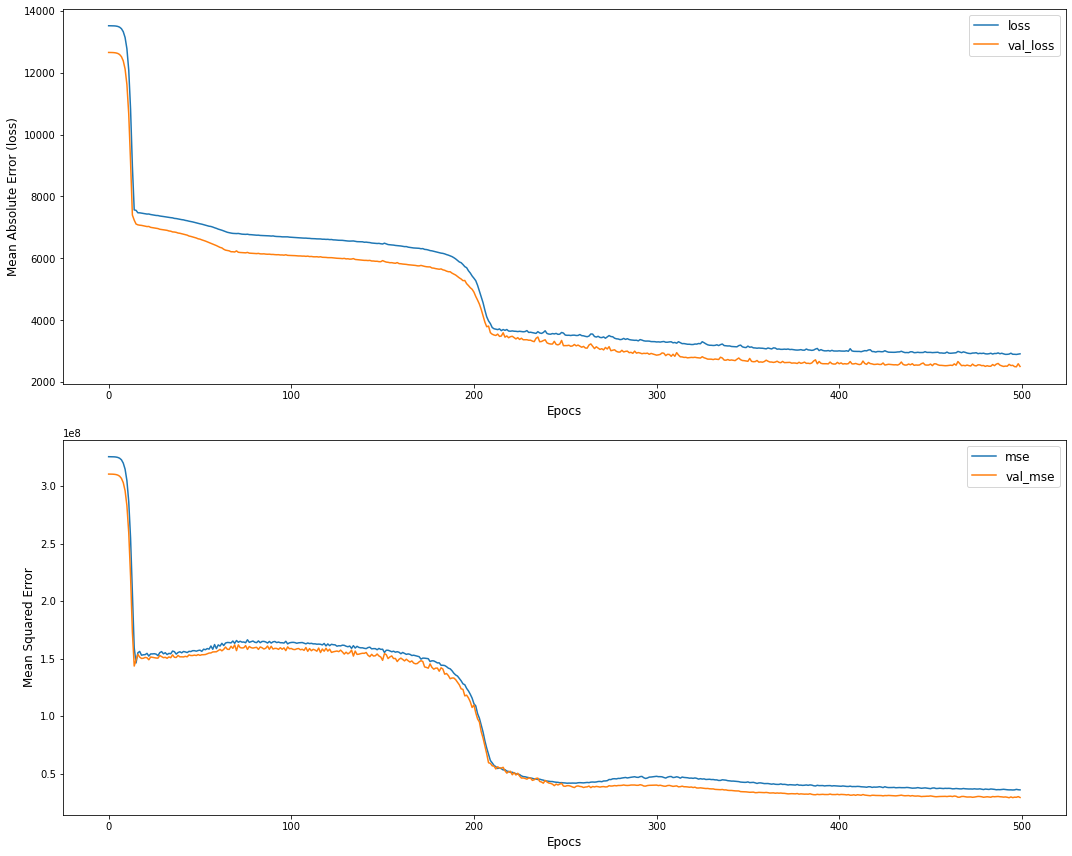

In [74]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history5.history['loss'], label='loss')
axs[0].plot(history5.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history5.history['mse'], label='mse')
axs[1].plot(history5.history['val_mse'], label='val_mse')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Squared Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [76]:
y_pred5 = model5.predict(X_test)
r2_score(y_test, y_pred5) 

0.8112110832666151

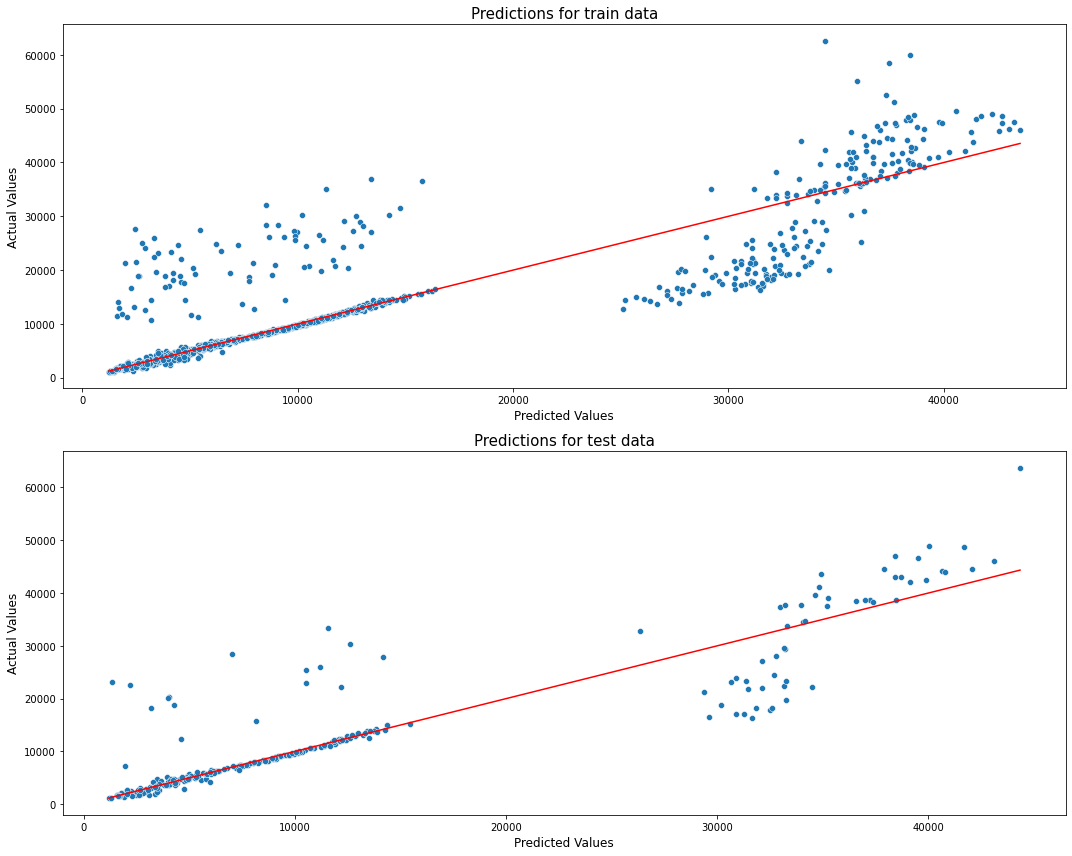

In [78]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model5.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model5.predict(X_train).reshape(-1), model5.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred5.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred5.reshape(-1), y_pred5.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [138]:
print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred5), np.min(y_pred5)))
print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

Predicted values

max: 44343.23046875
min: 1183.036865234375

Actual values

max: 63770.42801
min: 1131.5066


In [139]:
#the R2 score increased significantly

In [81]:
#lets increase the number of neurons for each layer
#and see what happens

In [105]:
model6 = Sequential()

model6.add(Dense(30, input_dim=6))
model6.add(Dense(50))
model6.add(Dense(30))
model6.add(Dense(20))
model6.add(Dense(10))
model6.add(Dense(4))
model6.add(Dense(2))

model6.add(Dense(1, activation='relu'))

model6.compile(loss='mae', optimizer='adam',
             metrics=['mse', 'mae'])

In [106]:
history6 = model6.fit(X_train, y_train, batch_size=64, epochs=500, verbose=1, validation_split=0.2)

Epoch 1/500
14/14 [==============================] - 1s 44ms/step - loss: 13442.4424 - mse: 323301792.0000 - mae: 13442.4424 - val_loss: 12448.4219 - val_mse: 304723072.0000 - val_mae: 12448.4219
Epoch 2/500
14/14 [==============================] - 0s 10ms/step - loss: 13091.1035 - mse: 313489952.0000 - mae: 13091.1035 - val_loss: 11819.5654 - val_mse: 288072640.0000 - val_mae: 11819.5654
Epoch 3/500
14/14 [==============================] - 0s 10ms/step - loss: 11934.9277 - mse: 282383360.0000 - mae: 11934.9277 - val_loss: 9721.0137 - val_mse: 236854384.0000 - val_mae: 9721.0137
Epoch 4/500
14/14 [==============================] - 0s 11ms/step - loss: 8801.8877 - mse: 201307904.0000 - mae: 8801.8877 - val_loss: 7243.2734 - val_mse: 143178624.0000 - val_mae: 7243.2734
Epoch 5/500
14/14 [==============================] - 0s 10ms/step - loss: 7675.3003 - mse: 143133072.0000 - mae: 7675.3003 - val_loss: 7044.2002 - val_mse: 152042272.0000 - val_mae: 7044.2002
Epoch 6/500
14/14 [===========

14/14 [==============================] - 0s 12ms/step - loss: 3731.5107 - mse: 47481196.0000 - mae: 3731.5107 - val_loss: 3463.9714 - val_mse: 45937532.0000 - val_mae: 3463.9714
Epoch 86/500
14/14 [==============================] - 0s 13ms/step - loss: 3757.9812 - mse: 46129040.0000 - mae: 3757.9812 - val_loss: 3789.3247 - val_mse: 49922408.0000 - val_mae: 3789.3247
Epoch 87/500
14/14 [==============================] - 0s 12ms/step - loss: 3766.4209 - mse: 46171992.0000 - mae: 3766.4209 - val_loss: 3455.3276 - val_mse: 44891232.0000 - val_mae: 3455.3276
Epoch 88/500
14/14 [==============================] - 0s 11ms/step - loss: 3719.0645 - mse: 45357404.0000 - mae: 3719.0645 - val_loss: 3422.7476 - val_mse: 43355156.0000 - val_mae: 3422.7476
Epoch 89/500
14/14 [==============================] - 0s 9ms/step - loss: 3705.1165 - mse: 44639456.0000 - mae: 3705.1165 - val_loss: 3659.7336 - val_mse: 39905288.0000 - val_mae: 3659.7336
Epoch 90/500
14/14 [==============================] - 0s 10

Epoch 128/500
14/14 [==============================] - 0s 12ms/step - loss: 3749.6313 - mse: 48832600.0000 - mae: 3749.6313 - val_loss: 3169.1597 - val_mse: 41054616.0000 - val_mae: 3169.1597
Epoch 129/500
14/14 [==============================] - 0s 12ms/step - loss: 3650.5808 - mse: 48011108.0000 - mae: 3650.5808 - val_loss: 3329.8755 - val_mse: 41623964.0000 - val_mae: 3329.8755
Epoch 130/500
14/14 [==============================] - 0s 13ms/step - loss: 3644.2446 - mse: 47951072.0000 - mae: 3644.2446 - val_loss: 3450.8125 - val_mse: 41835352.0000 - val_mae: 3450.8125
Epoch 131/500
14/14 [==============================] - 0s 13ms/step - loss: 3749.4392 - mse: 48547308.0000 - mae: 3749.4392 - val_loss: 3399.6074 - val_mse: 41445004.0000 - val_mae: 3399.6074
Epoch 132/500
14/14 [==============================] - 0s 12ms/step - loss: 3657.7581 - mse: 47239676.0000 - mae: 3657.7581 - val_loss: 3226.2798 - val_mse: 41421408.0000 - val_mae: 3226.2798
Epoch 133/500
14/14 [===================

Epoch 171/500
14/14 [==============================] - 0s 8ms/step - loss: 3657.0005 - mse: 50922964.0000 - mae: 3657.0005 - val_loss: 3113.9387 - val_mse: 42635264.0000 - val_mae: 3113.9387
Epoch 172/500
14/14 [==============================] - 0s 9ms/step - loss: 3580.9060 - mse: 51162812.0000 - mae: 3580.9060 - val_loss: 3167.1169 - val_mse: 42782540.0000 - val_mae: 3167.1169
Epoch 173/500
14/14 [==============================] - 0s 12ms/step - loss: 3626.4192 - mse: 50570044.0000 - mae: 3626.4192 - val_loss: 3143.8926 - val_mse: 42393132.0000 - val_mae: 3143.8926
Epoch 174/500
14/14 [==============================] - 0s 14ms/step - loss: 3597.7424 - mse: 50770208.0000 - mae: 3597.7424 - val_loss: 3170.8054 - val_mse: 42711580.0000 - val_mae: 3170.8054
Epoch 175/500
14/14 [==============================] - 0s 12ms/step - loss: 3598.7559 - mse: 50336500.0000 - mae: 3598.7559 - val_loss: 3215.1221 - val_mse: 42599708.0000 - val_mae: 3215.1221
Epoch 176/500
14/14 [=====================

Epoch 214/500
14/14 [==============================] - 0s 12ms/step - loss: 3589.4202 - mse: 50021236.0000 - mae: 3589.4202 - val_loss: 3326.7363 - val_mse: 43609872.0000 - val_mae: 3326.7363
Epoch 215/500
14/14 [==============================] - 0s 13ms/step - loss: 3635.6582 - mse: 49730120.0000 - mae: 3635.6582 - val_loss: 3227.7717 - val_mse: 42181516.0000 - val_mae: 3227.7717
Epoch 216/500
14/14 [==============================] - 0s 13ms/step - loss: 3658.5303 - mse: 50330224.0000 - mae: 3658.5303 - val_loss: 3206.7920 - val_mse: 42273284.0000 - val_mae: 3206.7920
Epoch 217/500
14/14 [==============================] - 0s 11ms/step - loss: 3727.3408 - mse: 49879356.0000 - mae: 3727.3408 - val_loss: 3190.1033 - val_mse: 42019960.0000 - val_mae: 3190.1033
Epoch 218/500
14/14 [==============================] - 0s 14ms/step - loss: 3836.1401 - mse: 50382680.0000 - mae: 3836.1401 - val_loss: 3653.0120 - val_mse: 42900268.0000 - val_mae: 3653.0120
Epoch 219/500
14/14 [===================

Epoch 257/500
14/14 [==============================] - 0s 8ms/step - loss: 3575.5056 - mse: 51414016.0000 - mae: 3575.5056 - val_loss: 3110.2332 - val_mse: 42936028.0000 - val_mae: 3110.2332
Epoch 258/500
14/14 [==============================] - 0s 9ms/step - loss: 3592.7332 - mse: 50812288.0000 - mae: 3592.7332 - val_loss: 3224.3115 - val_mse: 42886564.0000 - val_mae: 3224.3115
Epoch 259/500
14/14 [==============================] - 0s 10ms/step - loss: 3597.2280 - mse: 50055396.0000 - mae: 3597.2280 - val_loss: 3128.7830 - val_mse: 41946316.0000 - val_mae: 3128.7830
Epoch 260/500
14/14 [==============================] - 0s 10ms/step - loss: 3597.4822 - mse: 50176072.0000 - mae: 3597.4822 - val_loss: 3168.7256 - val_mse: 42824456.0000 - val_mae: 3168.7256
Epoch 261/500
14/14 [==============================] - 0s 12ms/step - loss: 3608.2944 - mse: 50850700.0000 - mae: 3608.2947 - val_loss: 3246.1724 - val_mse: 43135760.0000 - val_mae: 3246.1724
Epoch 262/500
14/14 [=====================

Epoch 300/500
14/14 [==============================] - 0s 9ms/step - loss: 3610.8882 - mse: 51512180.0000 - mae: 3610.8882 - val_loss: 3135.0530 - val_mse: 42836912.0000 - val_mae: 3135.0530
Epoch 301/500
14/14 [==============================] - 0s 10ms/step - loss: 3643.3240 - mse: 51027528.0000 - mae: 3643.3240 - val_loss: 3123.6877 - val_mse: 42441200.0000 - val_mae: 3123.6877
Epoch 302/500
14/14 [==============================] - 0s 9ms/step - loss: 3584.7119 - mse: 49624916.0000 - mae: 3584.7119 - val_loss: 3174.7466 - val_mse: 42170440.0000 - val_mae: 3174.7466
Epoch 303/500
14/14 [==============================] - 0s 7ms/step - loss: 3600.7512 - mse: 48970256.0000 - mae: 3600.7512 - val_loss: 3235.5925 - val_mse: 41738700.0000 - val_mae: 3235.5925
Epoch 304/500
14/14 [==============================] - 0s 11ms/step - loss: 3606.2756 - mse: 50505976.0000 - mae: 3606.2756 - val_loss: 3143.1953 - val_mse: 43573244.0000 - val_mae: 3143.1951
Epoch 305/500
14/14 [======================

Epoch 343/500
14/14 [==============================] - 0s 9ms/step - loss: 3691.4646 - mse: 50185832.0000 - mae: 3691.4646 - val_loss: 3307.7356 - val_mse: 41364732.0000 - val_mae: 3307.7356
Epoch 344/500
14/14 [==============================] - 0s 11ms/step - loss: 3689.4631 - mse: 49270156.0000 - mae: 3689.4631 - val_loss: 3172.2380 - val_mse: 42420632.0000 - val_mae: 3172.2380
Epoch 345/500
14/14 [==============================] - 0s 9ms/step - loss: 3599.7312 - mse: 49724368.0000 - mae: 3599.7312 - val_loss: 3273.7249 - val_mse: 42558492.0000 - val_mae: 3273.7249
Epoch 346/500
14/14 [==============================] - 0s 10ms/step - loss: 3619.0750 - mse: 49181224.0000 - mae: 3619.0750 - val_loss: 3138.6816 - val_mse: 41921668.0000 - val_mae: 3138.6816
Epoch 347/500
14/14 [==============================] - 0s 8ms/step - loss: 3579.3367 - mse: 49641504.0000 - mae: 3579.3367 - val_loss: 3231.1318 - val_mse: 42825956.0000 - val_mae: 3231.1318
Epoch 348/500
14/14 [======================

Epoch 386/500
14/14 [==============================] - 0s 10ms/step - loss: 3612.4463 - mse: 52036800.0000 - mae: 3612.4463 - val_loss: 3173.6528 - val_mse: 43624600.0000 - val_mae: 3173.6528
Epoch 387/500
14/14 [==============================] - 0s 13ms/step - loss: 3610.2185 - mse: 50982544.0000 - mae: 3610.2185 - val_loss: 3143.8828 - val_mse: 42587768.0000 - val_mae: 3143.8828
Epoch 388/500
14/14 [==============================] - 0s 9ms/step - loss: 3593.3479 - mse: 49882332.0000 - mae: 3593.3479 - val_loss: 3160.1953 - val_mse: 42106792.0000 - val_mae: 3160.1953
Epoch 389/500
14/14 [==============================] - 0s 12ms/step - loss: 3607.8298 - mse: 51164292.0000 - mae: 3607.8298 - val_loss: 3160.8479 - val_mse: 43355748.0000 - val_mae: 3160.8479
Epoch 390/500
14/14 [==============================] - 0s 8ms/step - loss: 3573.8933 - mse: 51427420.0000 - mae: 3573.8933 - val_loss: 3133.0107 - val_mse: 43307420.0000 - val_mae: 3133.0107
Epoch 391/500
14/14 [=====================

Epoch 429/500
14/14 [==============================] - 0s 10ms/step - loss: 3621.0979 - mse: 49228336.0000 - mae: 3621.0979 - val_loss: 3207.9514 - val_mse: 42555456.0000 - val_mae: 3207.9514
Epoch 430/500
14/14 [==============================] - 0s 10ms/step - loss: 3599.6716 - mse: 49821548.0000 - mae: 3599.6716 - val_loss: 3131.4375 - val_mse: 42137352.0000 - val_mae: 3131.4375
Epoch 431/500
14/14 [==============================] - 0s 8ms/step - loss: 3587.8655 - mse: 49618148.0000 - mae: 3587.8655 - val_loss: 3188.4670 - val_mse: 42377944.0000 - val_mae: 3188.4670
Epoch 432/500
14/14 [==============================] - 0s 9ms/step - loss: 3595.5352 - mse: 51264824.0000 - mae: 3595.5352 - val_loss: 3248.9941 - val_mse: 43814744.0000 - val_mae: 3248.9941
Epoch 433/500
14/14 [==============================] - 0s 10ms/step - loss: 3602.2976 - mse: 50714812.0000 - mae: 3602.2976 - val_loss: 3136.1370 - val_mse: 42151104.0000 - val_mae: 3136.1370
Epoch 434/500
14/14 [=====================

Epoch 472/500
14/14 [==============================] - 0s 12ms/step - loss: 3584.0833 - mse: 50854136.0000 - mae: 3584.0833 - val_loss: 3133.1477 - val_mse: 43526772.0000 - val_mae: 3133.1475
Epoch 473/500
14/14 [==============================] - 0s 15ms/step - loss: 3576.4580 - mse: 51077128.0000 - mae: 3576.4580 - val_loss: 3130.1440 - val_mse: 42635964.0000 - val_mae: 3130.1440
Epoch 474/500
14/14 [==============================] - 0s 12ms/step - loss: 3577.3420 - mse: 50371716.0000 - mae: 3577.3420 - val_loss: 3159.1921 - val_mse: 42758636.0000 - val_mae: 3159.1921
Epoch 475/500
14/14 [==============================] - 0s 11ms/step - loss: 3610.3235 - mse: 50628980.0000 - mae: 3610.3235 - val_loss: 3128.7261 - val_mse: 43027876.0000 - val_mae: 3128.7261
Epoch 476/500
14/14 [==============================] - 0s 13ms/step - loss: 3585.3882 - mse: 50272988.0000 - mae: 3585.3882 - val_loss: 3146.4402 - val_mse: 42833924.0000 - val_mae: 3146.4402
Epoch 477/500
14/14 [===================

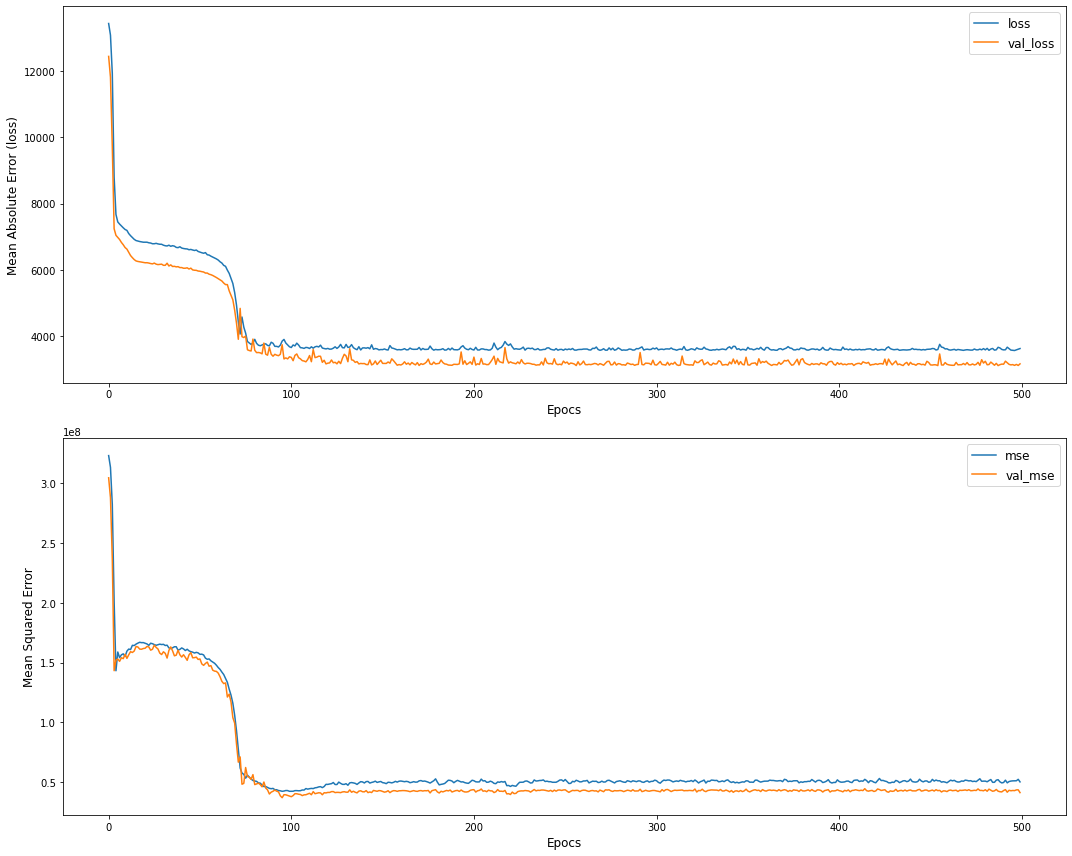

In [107]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history6.history['loss'], label='loss')
axs[0].plot(history6.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history6.history['mse'], label='mse')
axs[1].plot(history6.history['val_mse'], label='val_mse')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Squared Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [108]:
y_pred6 = model6.predict(X_test)
r2_score(y_test, y_pred6) 

0.7356501391404404

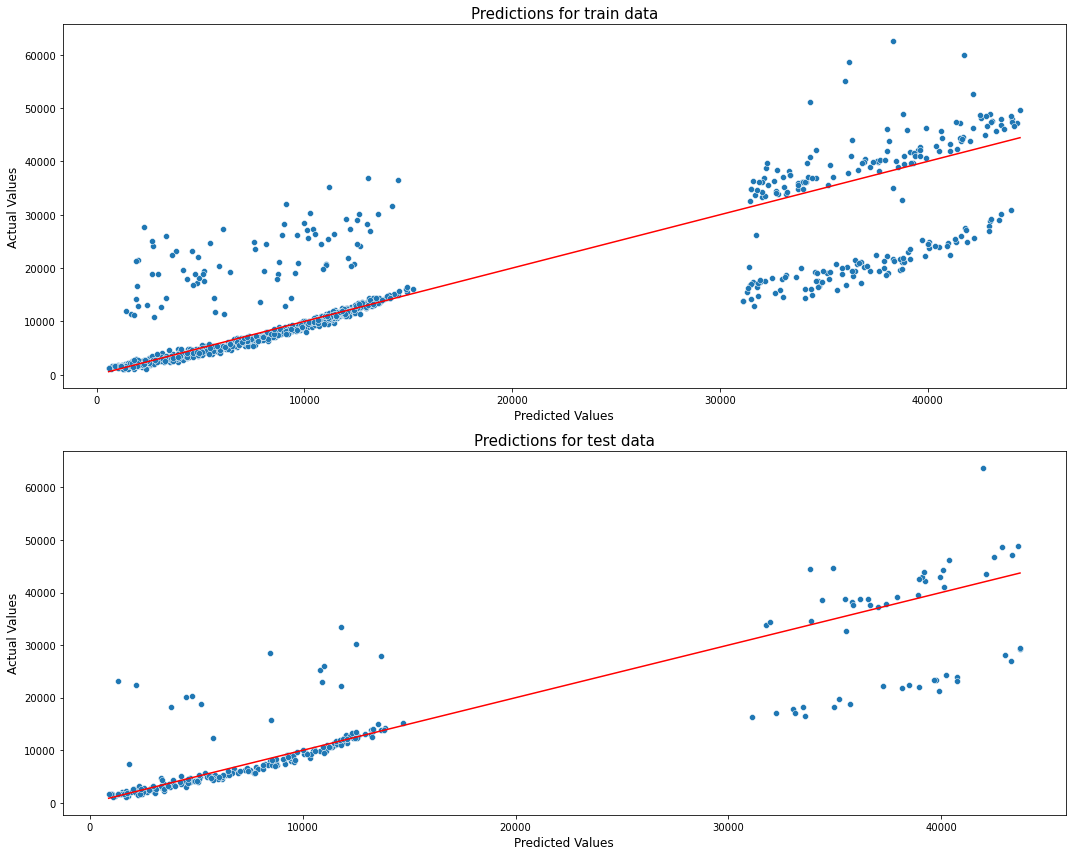

In [109]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model6.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model6.predict(X_train).reshape(-1), model6.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred6.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred6.reshape(-1), y_pred6.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [140]:
print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred6), np.min(y_pred6)))
print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

Predicted values

max: 43710.9453125
min: 873.6189575195312

Actual values

max: 63770.42801
min: 1131.5066


In [112]:
#the R2 score decreased a lot
#lets try the same model with RELU activation layers 

In [115]:
model7 = Sequential()

model7.add(Dense(30, input_dim=6, activation='relu'))
model7.add(Dense(50, activation='relu'))
model7.add(Dense(30, activation='relu'))
model7.add(Dense(20, activation='relu'))
model7.add(Dense(10, activation='relu'))
model7.add(Dense(4, activation='relu'))
model7.add(Dense(2, activation='relu'))

model7.add(Dense(1, activation='relu'))

model7.compile(loss='mae', optimizer='adam',
             metrics=['mse', 'mae'])

In [116]:
history7 = model7.fit(X_train, y_train, batch_size=64, epochs=500, verbose=1, validation_split=0.2)

Epoch 1/500
14/14 [==============================] - 1s 44ms/step - loss: 13495.6201 - mse: 324820768.0000 - mae: 13495.6201 - val_loss: 12614.7979 - val_mse: 309258016.0000 - val_mae: 12614.7979
Epoch 2/500
14/14 [==============================] - 0s 10ms/step - loss: 13454.9561 - mse: 323666080.0000 - mae: 13454.9561 - val_loss: 12555.1602 - val_mse: 307628256.0000 - val_mae: 12555.1602
Epoch 3/500
14/14 [==============================] - 0s 11ms/step - loss: 13365.0068 - mse: 321087456.0000 - mae: 13365.0068 - val_loss: 12417.1826 - val_mse: 303892832.0000 - val_mae: 12417.1826
Epoch 4/500
14/14 [==============================] - 0s 11ms/step - loss: 13152.8906 - mse: 315179232.0000 - mae: 13152.8906 - val_loss: 12081.8320 - val_mse: 294987552.0000 - val_mae: 12081.8320
Epoch 5/500
14/14 [==============================] - 0s 10ms/step - loss: 12628.4395 - mse: 300640896.0000 - mae: 12628.4395 - val_loss: 11249.5889 - val_mse: 273887360.0000 - val_mae: 11249.5889
Epoch 6/500
14/14 [=

14/14 [==============================] - 0s 10ms/step - loss: 6715.5415 - mse: 165316832.0000 - mae: 6715.5415 - val_loss: 6117.2876 - val_mse: 160152800.0000 - val_mae: 6117.2876
Epoch 44/500
14/14 [==============================] - 0s 8ms/step - loss: 6706.3345 - mse: 165249744.0000 - mae: 6706.3345 - val_loss: 6118.9561 - val_mse: 158697312.0000 - val_mae: 6118.9561
Epoch 45/500
14/14 [==============================] - 0s 7ms/step - loss: 6695.9590 - mse: 165199008.0000 - mae: 6695.9590 - val_loss: 6108.2354 - val_mse: 159105248.0000 - val_mae: 6108.2354
Epoch 46/500
14/14 [==============================] - 0s 8ms/step - loss: 6689.4932 - mse: 163893760.0000 - mae: 6689.4932 - val_loss: 6098.3223 - val_mse: 160997648.0000 - val_mae: 6098.3223
Epoch 47/500
14/14 [==============================] - 0s 9ms/step - loss: 6680.8115 - mse: 164891104.0000 - mae: 6680.8115 - val_loss: 6097.6807 - val_mse: 158376816.0000 - val_mae: 6097.6807
Epoch 48/500
14/14 [==============================] 

Epoch 128/500
14/14 [==============================] - 0s 11ms/step - loss: 3512.4478 - mse: 41742820.0000 - mae: 3512.4478 - val_loss: 3160.2087 - val_mse: 39566052.0000 - val_mae: 3160.2087
Epoch 129/500
14/14 [==============================] - 0s 11ms/step - loss: 3497.9746 - mse: 41358796.0000 - mae: 3497.9746 - val_loss: 3255.5620 - val_mse: 40499592.0000 - val_mae: 3255.5620
Epoch 130/500
14/14 [==============================] - 0s 13ms/step - loss: 3482.7561 - mse: 41108724.0000 - mae: 3482.7561 - val_loss: 3160.0549 - val_mse: 39604052.0000 - val_mae: 3160.0549
Epoch 131/500
14/14 [==============================] - 0s 12ms/step - loss: 3487.4536 - mse: 40881172.0000 - mae: 3487.4536 - val_loss: 3128.6189 - val_mse: 38328156.0000 - val_mae: 3128.6189
Epoch 132/500
14/14 [==============================] - 0s 9ms/step - loss: 3509.5435 - mse: 41167948.0000 - mae: 3509.5435 - val_loss: 3109.6040 - val_mse: 38981604.0000 - val_mae: 3109.6040
Epoch 133/500
14/14 [====================

Epoch 171/500
14/14 [==============================] - 0s 10ms/step - loss: 3327.0732 - mse: 46677120.0000 - mae: 3327.0732 - val_loss: 2933.8101 - val_mse: 39727448.0000 - val_mae: 2933.8101
Epoch 172/500
14/14 [==============================] - 0s 8ms/step - loss: 3304.1360 - mse: 46318744.0000 - mae: 3304.1360 - val_loss: 2872.7288 - val_mse: 39666884.0000 - val_mae: 2872.7288
Epoch 173/500
14/14 [==============================] - 0s 12ms/step - loss: 3292.5369 - mse: 47164492.0000 - mae: 3292.5369 - val_loss: 2848.5398 - val_mse: 40293228.0000 - val_mae: 2848.5400
Epoch 174/500
14/14 [==============================] - 0s 9ms/step - loss: 3280.9377 - mse: 47712720.0000 - mae: 3280.9377 - val_loss: 2852.6543 - val_mse: 40338164.0000 - val_mae: 2852.6543
Epoch 175/500
14/14 [==============================] - 0s 8ms/step - loss: 3294.8235 - mse: 47909064.0000 - mae: 3294.8235 - val_loss: 2873.3376 - val_mse: 40243904.0000 - val_mae: 2873.3376
Epoch 176/500
14/14 [======================

Epoch 214/500
14/14 [==============================] - 0s 12ms/step - loss: 3221.2871 - mse: 46760148.0000 - mae: 3221.2871 - val_loss: 2774.5847 - val_mse: 39240592.0000 - val_mae: 2774.5847
Epoch 215/500
14/14 [==============================] - 0s 13ms/step - loss: 3217.6855 - mse: 47599632.0000 - mae: 3217.6855 - val_loss: 2767.7585 - val_mse: 39469916.0000 - val_mae: 2767.7585
Epoch 216/500
14/14 [==============================] - 0s 10ms/step - loss: 3214.0027 - mse: 47050352.0000 - mae: 3214.0027 - val_loss: 2787.8643 - val_mse: 39012224.0000 - val_mae: 2787.8643
Epoch 217/500
14/14 [==============================] - 0s 9ms/step - loss: 3237.1477 - mse: 47081180.0000 - mae: 3237.1477 - val_loss: 2912.8381 - val_mse: 39208212.0000 - val_mae: 2912.8381
Epoch 218/500
14/14 [==============================] - 0s 7ms/step - loss: 3244.2107 - mse: 47396132.0000 - mae: 3244.2107 - val_loss: 2791.2249 - val_mse: 39014680.0000 - val_mae: 2791.2249
Epoch 219/500
14/14 [=====================

Epoch 257/500
14/14 [==============================] - 0s 13ms/step - loss: 3198.6365 - mse: 44788028.0000 - mae: 3198.6365 - val_loss: 2737.3462 - val_mse: 36745272.0000 - val_mae: 2737.3462
Epoch 258/500
14/14 [==============================] - 0s 12ms/step - loss: 3158.1594 - mse: 44488268.0000 - mae: 3158.1594 - val_loss: 2699.9131 - val_mse: 36833176.0000 - val_mae: 2699.9131
Epoch 259/500
14/14 [==============================] - 0s 11ms/step - loss: 3171.3584 - mse: 45306036.0000 - mae: 3171.3584 - val_loss: 2754.2874 - val_mse: 37092524.0000 - val_mae: 2754.2874
Epoch 260/500
14/14 [==============================] - 0s 9ms/step - loss: 3122.9067 - mse: 44501056.0000 - mae: 3122.9067 - val_loss: 2683.8967 - val_mse: 36886452.0000 - val_mae: 2683.8967
Epoch 261/500
14/14 [==============================] - 0s 8ms/step - loss: 3118.6204 - mse: 45250624.0000 - mae: 3118.6204 - val_loss: 2736.1169 - val_mse: 36919752.0000 - val_mae: 2736.1169
Epoch 262/500
14/14 [=====================

Epoch 300/500
14/14 [==============================] - 0s 12ms/step - loss: 3059.2268 - mse: 42245208.0000 - mae: 3059.2268 - val_loss: 2614.1284 - val_mse: 34413464.0000 - val_mae: 2614.1284
Epoch 301/500
14/14 [==============================] - 0s 10ms/step - loss: 3031.3870 - mse: 42298124.0000 - mae: 3031.3870 - val_loss: 2635.1655 - val_mse: 34672608.0000 - val_mae: 2635.1655
Epoch 302/500
14/14 [==============================] - 0s 7ms/step - loss: 3030.8242 - mse: 42400276.0000 - mae: 3030.8242 - val_loss: 2612.7354 - val_mse: 34469168.0000 - val_mae: 2612.7354
Epoch 303/500
14/14 [==============================] - 0s 8ms/step - loss: 3022.5549 - mse: 41940452.0000 - mae: 3022.5549 - val_loss: 2611.2307 - val_mse: 34609136.0000 - val_mae: 2611.2307
Epoch 304/500
14/14 [==============================] - 0s 11ms/step - loss: 3061.7856 - mse: 42497764.0000 - mae: 3061.7856 - val_loss: 2620.6528 - val_mse: 34287356.0000 - val_mae: 2620.6528
Epoch 305/500
14/14 [=====================

Epoch 343/500
14/14 [==============================] - 0s 8ms/step - loss: 2981.7783 - mse: 39375952.0000 - mae: 2981.7783 - val_loss: 2565.1995 - val_mse: 31624702.0000 - val_mae: 2565.1995
Epoch 344/500
14/14 [==============================] - 0s 8ms/step - loss: 2971.1001 - mse: 38920032.0000 - mae: 2971.1001 - val_loss: 2540.4631 - val_mse: 31797356.0000 - val_mae: 2540.4631
Epoch 345/500
14/14 [==============================] - 0s 9ms/step - loss: 2954.4707 - mse: 39473192.0000 - mae: 2954.4707 - val_loss: 2653.2908 - val_mse: 32093270.0000 - val_mae: 2653.2908
Epoch 346/500
14/14 [==============================] - 0s 13ms/step - loss: 3035.2297 - mse: 38809316.0000 - mae: 3035.2297 - val_loss: 2626.5005 - val_mse: 31224396.0000 - val_mae: 2626.5005
Epoch 347/500
14/14 [==============================] - 0s 12ms/step - loss: 2966.7961 - mse: 39279016.0000 - mae: 2966.7961 - val_loss: 2527.4946 - val_mse: 31668680.0000 - val_mae: 2527.4946
Epoch 348/500
14/14 [======================

Epoch 386/500
14/14 [==============================] - 0s 11ms/step - loss: 2807.0745 - mse: 36049332.0000 - mae: 2807.0745 - val_loss: 2441.2014 - val_mse: 29190542.0000 - val_mae: 2441.2014
Epoch 387/500
14/14 [==============================] - 0s 10ms/step - loss: 2808.5552 - mse: 35648624.0000 - mae: 2808.5552 - val_loss: 2446.4146 - val_mse: 29207722.0000 - val_mae: 2446.4146
Epoch 388/500
14/14 [==============================] - 0s 12ms/step - loss: 2797.1423 - mse: 36138136.0000 - mae: 2797.1423 - val_loss: 2429.5500 - val_mse: 29452296.0000 - val_mae: 2429.5500
Epoch 389/500
14/14 [==============================] - 0s 11ms/step - loss: 2828.5398 - mse: 35738744.0000 - mae: 2828.5398 - val_loss: 2440.2825 - val_mse: 29271170.0000 - val_mae: 2440.2825
Epoch 390/500
14/14 [==============================] - 0s 12ms/step - loss: 2818.8433 - mse: 36013864.0000 - mae: 2818.8433 - val_loss: 2414.1013 - val_mse: 29151586.0000 - val_mae: 2414.1013
Epoch 391/500
14/14 [===================

Epoch 429/500
14/14 [==============================] - 0s 13ms/step - loss: 2682.1216 - mse: 34403400.0000 - mae: 2682.1216 - val_loss: 2307.1831 - val_mse: 28090722.0000 - val_mae: 2307.1831
Epoch 430/500
14/14 [==============================] - 0s 13ms/step - loss: 2597.4900 - mse: 34029088.0000 - mae: 2597.4900 - val_loss: 2298.0701 - val_mse: 28677438.0000 - val_mae: 2298.0701
Epoch 431/500
14/14 [==============================] - 0s 11ms/step - loss: 2593.5269 - mse: 33879580.0000 - mae: 2593.5269 - val_loss: 2280.3972 - val_mse: 28582834.0000 - val_mae: 2280.3972
Epoch 432/500
14/14 [==============================] - 0s 10ms/step - loss: 2600.0151 - mse: 34134784.0000 - mae: 2600.0151 - val_loss: 2335.6201 - val_mse: 29012314.0000 - val_mae: 2335.6201
Epoch 433/500
14/14 [==============================] - 0s 11ms/step - loss: 2600.0996 - mse: 33843848.0000 - mae: 2600.0996 - val_loss: 2265.2805 - val_mse: 28280732.0000 - val_mae: 2265.2805
Epoch 434/500
14/14 [===================

Epoch 472/500
14/14 [==============================] - 0s 9ms/step - loss: 2521.3669 - mse: 32432162.0000 - mae: 2521.3669 - val_loss: 2317.3018 - val_mse: 28493954.0000 - val_mae: 2317.3018
Epoch 473/500
14/14 [==============================] - 0s 9ms/step - loss: 2512.2903 - mse: 32681906.0000 - mae: 2512.2903 - val_loss: 2211.5518 - val_mse: 27765964.0000 - val_mae: 2211.5518
Epoch 474/500
14/14 [==============================] - 0s 9ms/step - loss: 2461.4126 - mse: 32595806.0000 - mae: 2461.4126 - val_loss: 2198.2490 - val_mse: 27717254.0000 - val_mae: 2198.2490
Epoch 475/500
14/14 [==============================] - 0s 10ms/step - loss: 2459.5366 - mse: 32519660.0000 - mae: 2459.5366 - val_loss: 2300.3127 - val_mse: 28509782.0000 - val_mae: 2300.3127
Epoch 476/500
14/14 [==============================] - 0s 8ms/step - loss: 2483.7488 - mse: 32253760.0000 - mae: 2483.7488 - val_loss: 2253.2910 - val_mse: 28182930.0000 - val_mae: 2253.2910
Epoch 477/500
14/14 [=======================

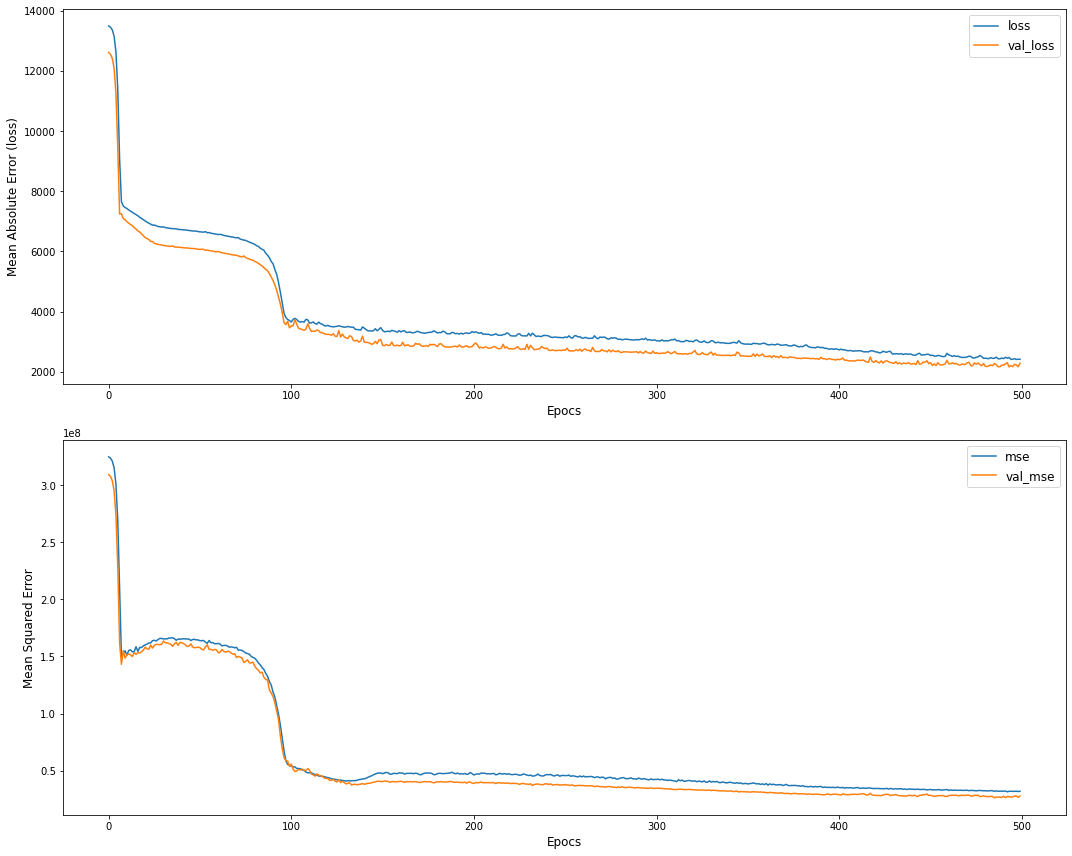

In [117]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history7.history['loss'], label='loss')
axs[0].plot(history7.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history7.history['mse'], label='mse')
axs[1].plot(history7.history['val_mse'], label='val_mse')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Squared Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [118]:
y_pred7 = model7.predict(X_test)
r2_score(y_test, y_pred7) 

0.8421606361854351

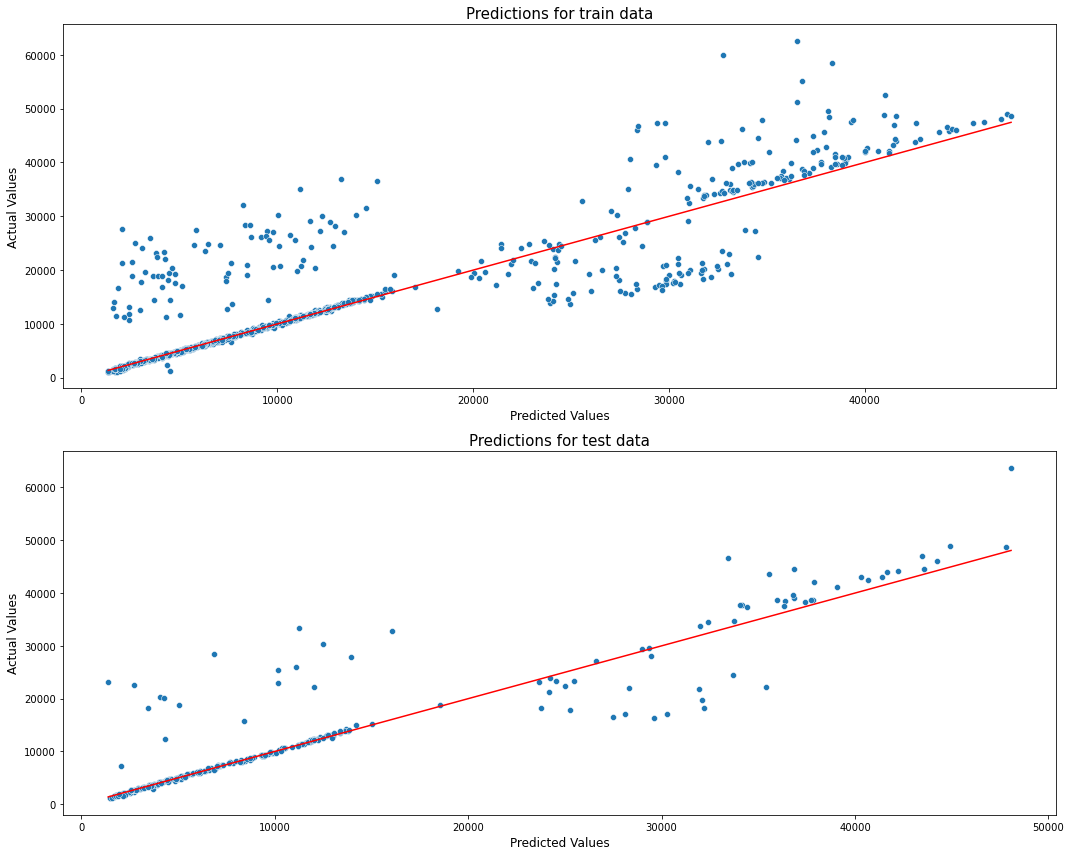

In [119]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model7.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model7.predict(X_train).reshape(-1), model7.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred7.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred7.reshape(-1), y_pred7.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [141]:
print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred7), np.min(y_pred7)))
print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

Predicted values

max: 48067.140625
min: 1385.0372314453125

Actual values

max: 63770.42801
min: 1131.5066


In [142]:
#the max predicted charge value increased to 48k
#the R2 value increased a lot 
#RELU activation is good  

In [122]:
#lets increase the number of neurons a lot

In [123]:
model8 = Sequential()

model8.add(Dense(100, input_dim=6, activation='relu'))
model8.add(Dense(100, activation='relu'))
model8.add(Dense(50, activation='relu'))
model8.add(Dense(50, activation='relu'))
model8.add(Dense(10, activation='relu'))
model8.add(Dense(10, activation='relu'))
model8.add(Dense(5, activation='relu'))

model8.add(Dense(1, activation='relu'))

model8.compile(loss='mae', optimizer='adam',
             metrics=['mse', 'mae'])

In [124]:
history8 = model8.fit(X_train, y_train, batch_size=64, epochs=500, verbose=1, validation_split=0.2)

Epoch 1/500
14/14 [==============================] - 1s 69ms/step - loss: 13515.5039 - mse: 325382368.0000 - mae: 13515.5039 - val_loss: 12646.6533 - val_mse: 310124192.0000 - val_mae: 12646.6533
Epoch 2/500
14/14 [==============================] - 0s 13ms/step - loss: 13497.0137 - mse: 324844576.0000 - mae: 13497.0137 - val_loss: 12607.6494 - val_mse: 309055936.0000 - val_mae: 12607.6494
Epoch 3/500
14/14 [==============================] - 0s 12ms/step - loss: 13413.1328 - mse: 322485888.0000 - mae: 13413.1328 - val_loss: 12431.3584 - val_mse: 304260960.0000 - val_mae: 12431.3584
Epoch 4/500
14/14 [==============================] - 0s 12ms/step - loss: 13042.9268 - mse: 312192832.0000 - mae: 13042.9268 - val_loss: 11684.5439 - val_mse: 284670080.0000 - val_mae: 11684.5439
Epoch 5/500
14/14 [==============================] - 0s 11ms/step - loss: 11591.1240 - mse: 274418656.0000 - mae: 11591.1240 - val_loss: 9167.2568 - val_mse: 222134384.0000 - val_mae: 9167.2568
Epoch 6/500
14/14 [===

Epoch 86/500
14/14 [==============================] - 0s 12ms/step - loss: 3589.8376 - mse: 44517988.0000 - mae: 3589.8376 - val_loss: 3277.2266 - val_mse: 43876092.0000 - val_mae: 3277.2266
Epoch 87/500
14/14 [==============================] - 0s 12ms/step - loss: 3550.6975 - mse: 43875440.0000 - mae: 3550.6975 - val_loss: 3230.6562 - val_mse: 42566308.0000 - val_mae: 3230.6562
Epoch 88/500
14/14 [==============================] - 0s 15ms/step - loss: 3537.2441 - mse: 43125048.0000 - mae: 3537.2441 - val_loss: 3284.4956 - val_mse: 40356260.0000 - val_mae: 3284.4956
Epoch 89/500
14/14 [==============================] - 0s 13ms/step - loss: 3530.6196 - mse: 42660864.0000 - mae: 3530.6196 - val_loss: 3224.3982 - val_mse: 41626788.0000 - val_mae: 3224.3982
Epoch 90/500
14/14 [==============================] - 0s 12ms/step - loss: 3598.8508 - mse: 42481828.0000 - mae: 3598.8508 - val_loss: 3345.7173 - val_mse: 42240996.0000 - val_mae: 3345.7173
Epoch 91/500
14/14 [=========================

Epoch 129/500
14/14 [==============================] - 0s 13ms/step - loss: 3272.3555 - mse: 47255240.0000 - mae: 3272.3555 - val_loss: 2798.5408 - val_mse: 39425108.0000 - val_mae: 2798.5408
Epoch 130/500
14/14 [==============================] - 0s 13ms/step - loss: 3297.5449 - mse: 47796008.0000 - mae: 3297.5449 - val_loss: 2833.5764 - val_mse: 39118724.0000 - val_mae: 2833.5764
Epoch 131/500
14/14 [==============================] - 0s 10ms/step - loss: 3274.1726 - mse: 46596940.0000 - mae: 3274.1726 - val_loss: 2868.6619 - val_mse: 38685248.0000 - val_mae: 2868.6619
Epoch 132/500
14/14 [==============================] - 0s 10ms/step - loss: 3260.3335 - mse: 47970980.0000 - mae: 3260.3335 - val_loss: 2792.2441 - val_mse: 39400440.0000 - val_mae: 2792.2441
Epoch 133/500
14/14 [==============================] - 0s 9ms/step - loss: 3343.0286 - mse: 47650480.0000 - mae: 3343.0286 - val_loss: 2991.5198 - val_mse: 38599524.0000 - val_mae: 2991.5198
Epoch 134/500
14/14 [====================

Epoch 172/500
14/14 [==============================] - 0s 12ms/step - loss: 3113.2646 - mse: 43838312.0000 - mae: 3113.2646 - val_loss: 2723.6960 - val_mse: 35425540.0000 - val_mae: 2723.6960
Epoch 173/500
14/14 [==============================] - 0s 10ms/step - loss: 3123.0107 - mse: 43299784.0000 - mae: 3123.0107 - val_loss: 2661.9482 - val_mse: 35148864.0000 - val_mae: 2661.9482
Epoch 174/500
14/14 [==============================] - 0s 8ms/step - loss: 3125.9675 - mse: 43564452.0000 - mae: 3125.9675 - val_loss: 2665.7312 - val_mse: 34935932.0000 - val_mae: 2665.7312
Epoch 175/500
14/14 [==============================] - 0s 13ms/step - loss: 3145.9226 - mse: 42556676.0000 - mae: 3145.9226 - val_loss: 2673.1016 - val_mse: 34517260.0000 - val_mae: 2673.1016
Epoch 176/500
14/14 [==============================] - 0s 15ms/step - loss: 3143.0569 - mse: 43594896.0000 - mae: 3143.0569 - val_loss: 2644.6758 - val_mse: 34866944.0000 - val_mae: 2644.6758
Epoch 177/500
14/14 [====================

Epoch 215/500
14/14 [==============================] - 0s 13ms/step - loss: 3028.6606 - mse: 40499976.0000 - mae: 3028.6606 - val_loss: 2584.0505 - val_mse: 32674740.0000 - val_mae: 2584.0505
Epoch 216/500
14/14 [==============================] - 0s 12ms/step - loss: 3002.2795 - mse: 40276744.0000 - mae: 3002.2795 - val_loss: 2601.3621 - val_mse: 32612580.0000 - val_mae: 2601.3621
Epoch 217/500
14/14 [==============================] - 0s 15ms/step - loss: 3035.3506 - mse: 40235624.0000 - mae: 3035.3506 - val_loss: 2692.1670 - val_mse: 32025382.0000 - val_mae: 2692.1670
Epoch 218/500
14/14 [==============================] - 0s 10ms/step - loss: 3072.1851 - mse: 40527164.0000 - mae: 3072.1851 - val_loss: 2599.4006 - val_mse: 32260162.0000 - val_mae: 2599.4006
Epoch 219/500
14/14 [==============================] - 0s 11ms/step - loss: 2994.4910 - mse: 39739188.0000 - mae: 2994.4910 - val_loss: 2555.2302 - val_mse: 32231994.0000 - val_mae: 2555.2305
Epoch 220/500
14/14 [===================

Epoch 300/500
14/14 [==============================] - 0s 9ms/step - loss: 2696.7625 - mse: 34337688.0000 - mae: 2696.7625 - val_loss: 2317.0344 - val_mse: 28034780.0000 - val_mae: 2317.0344
Epoch 301/500
14/14 [==============================] - 0s 8ms/step - loss: 2665.4907 - mse: 34109648.0000 - mae: 2665.4907 - val_loss: 2451.5830 - val_mse: 29164508.0000 - val_mae: 2451.5830
Epoch 302/500
14/14 [==============================] - 0s 9ms/step - loss: 2697.5244 - mse: 34147088.0000 - mae: 2697.5244 - val_loss: 2418.2441 - val_mse: 28987200.0000 - val_mae: 2418.2441
Epoch 303/500
14/14 [==============================] - 0s 10ms/step - loss: 2656.5591 - mse: 34106928.0000 - mae: 2656.5591 - val_loss: 2357.8904 - val_mse: 27743232.0000 - val_mae: 2357.8904
Epoch 304/500
14/14 [==============================] - 0s 9ms/step - loss: 2727.4170 - mse: 34326060.0000 - mae: 2727.4170 - val_loss: 2403.7327 - val_mse: 27667360.0000 - val_mae: 2403.7327
Epoch 305/500
14/14 [=======================

Epoch 343/500
14/14 [==============================] - 0s 12ms/step - loss: 2484.2141 - mse: 32317196.0000 - mae: 2484.2141 - val_loss: 2248.4407 - val_mse: 27329732.0000 - val_mae: 2248.4407
Epoch 344/500
14/14 [==============================] - 0s 13ms/step - loss: 2478.4463 - mse: 32345202.0000 - mae: 2478.4463 - val_loss: 2147.9663 - val_mse: 27365842.0000 - val_mae: 2147.9663
Epoch 345/500
14/14 [==============================] - 0s 11ms/step - loss: 2434.6711 - mse: 32402932.0000 - mae: 2434.6711 - val_loss: 2172.8723 - val_mse: 27424292.0000 - val_mae: 2172.8723
Epoch 346/500
14/14 [==============================] - 0s 14ms/step - loss: 2426.3289 - mse: 32315280.0000 - mae: 2426.3289 - val_loss: 2173.8901 - val_mse: 27063548.0000 - val_mae: 2173.8901
Epoch 347/500
14/14 [==============================] - 0s 10ms/step - loss: 2447.4341 - mse: 32354320.0000 - mae: 2447.4341 - val_loss: 2233.1494 - val_mse: 28291330.0000 - val_mae: 2233.1494
Epoch 348/500
14/14 [===================

Epoch 428/500
14/14 [==============================] - 0s 9ms/step - loss: 2300.0537 - mse: 29306808.0000 - mae: 2300.0537 - val_loss: 2140.3882 - val_mse: 26743006.0000 - val_mae: 2140.3882
Epoch 429/500
14/14 [==============================] - 0s 8ms/step - loss: 2218.2593 - mse: 29046350.0000 - mae: 2218.2593 - val_loss: 2077.9172 - val_mse: 26102696.0000 - val_mae: 2077.9172
Epoch 430/500
14/14 [==============================] - 0s 9ms/step - loss: 2278.2310 - mse: 29218234.0000 - mae: 2278.2310 - val_loss: 2109.9417 - val_mse: 26143278.0000 - val_mae: 2109.9417
Epoch 431/500
14/14 [==============================] - 0s 9ms/step - loss: 2220.8633 - mse: 29178258.0000 - mae: 2220.8633 - val_loss: 2057.3557 - val_mse: 25504020.0000 - val_mae: 2057.3557
Epoch 432/500
14/14 [==============================] - 0s 9ms/step - loss: 2214.7051 - mse: 29078250.0000 - mae: 2214.7051 - val_loss: 2027.1973 - val_mse: 25339900.0000 - val_mae: 2027.1973
Epoch 433/500
14/14 [========================

Epoch 471/500
14/14 [==============================] - 0s 14ms/step - loss: 2137.8438 - mse: 27977468.0000 - mae: 2137.8438 - val_loss: 2061.1182 - val_mse: 24483304.0000 - val_mae: 2061.1182
Epoch 472/500
14/14 [==============================] - 0s 14ms/step - loss: 2167.6826 - mse: 28064406.0000 - mae: 2167.6826 - val_loss: 2042.8539 - val_mse: 25435412.0000 - val_mae: 2042.8539
Epoch 473/500
14/14 [==============================] - 0s 12ms/step - loss: 2135.7488 - mse: 27839436.0000 - mae: 2135.7488 - val_loss: 2076.0637 - val_mse: 25394822.0000 - val_mae: 2076.0637
Epoch 474/500
14/14 [==============================] - 0s 10ms/step - loss: 2185.6914 - mse: 27897572.0000 - mae: 2185.6914 - val_loss: 2107.1135 - val_mse: 23895942.0000 - val_mae: 2107.1135
Epoch 475/500
14/14 [==============================] - 0s 11ms/step - loss: 2201.7246 - mse: 27701102.0000 - mae: 2201.7246 - val_loss: 2009.9384 - val_mse: 24511868.0000 - val_mae: 2009.9384
Epoch 476/500
14/14 [===================

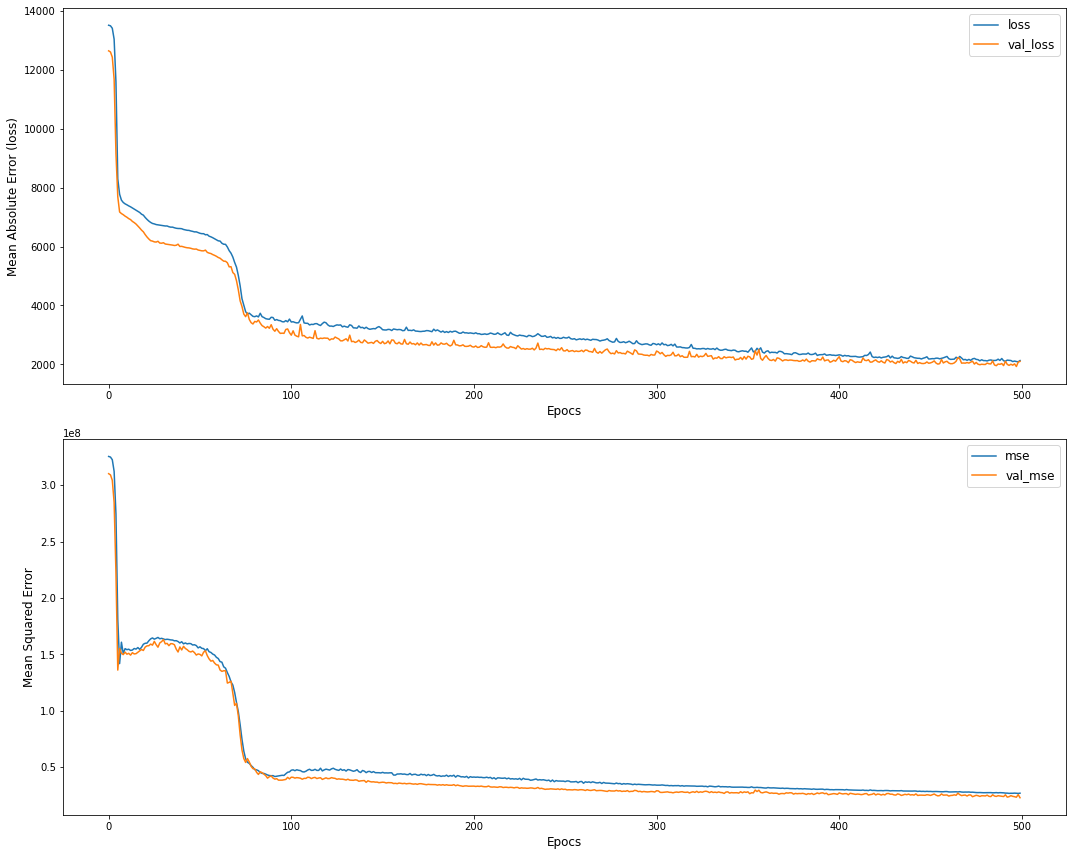

In [125]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history8.history['loss'], label='loss')
axs[0].plot(history8.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history8.history['mse'], label='mse')
axs[1].plot(history8.history['val_mse'], label='val_mse')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Squared Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [126]:
y_pred8 = model8.predict(X_test)
r2_score(y_test, y_pred8) 

0.863238713416069

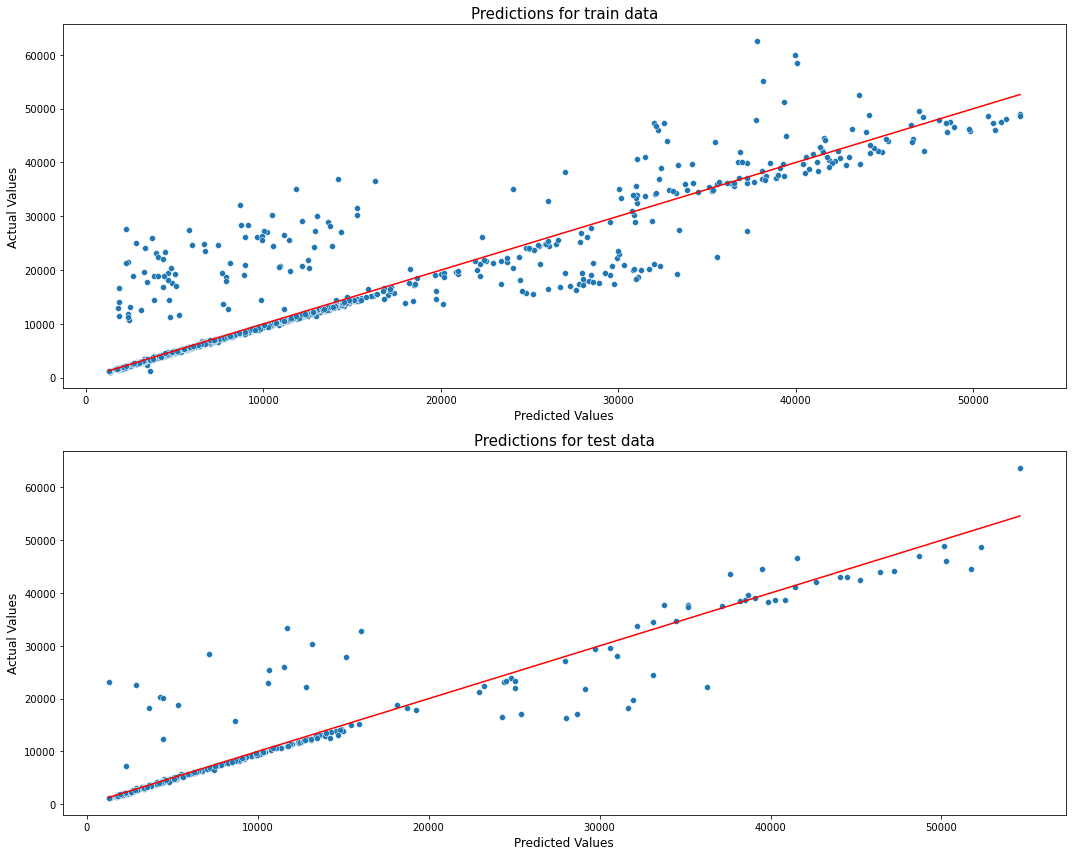

In [127]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model8.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model8.predict(X_train).reshape(-1), model8.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred8.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred8.reshape(-1), y_pred8.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [143]:
print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred8), np.min(y_pred8)))
print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

Predicted values

max: 54596.88671875
min: 1277.27392578125

Actual values

max: 63770.42801
min: 1131.5066


In [129]:
#the model is predicted max charge upto 54k
#R2 score increased a bit
#lets increase the neurons a bit more and check the results

In [133]:
model9 = Sequential()

model9.add(Dense(500, input_dim=6, activation='relu'))
model9.add(Dense(200, activation='relu'))
model9.add(Dense(200, activation='relu'))
model9.add(Dense(100, activation='relu'))
model9.add(Dense(100, activation='relu'))
model9.add(Dense(50, activation='relu'))
model9.add(Dense(25, activation='relu'))

model9.add(Dense(1, activation='relu'))

model9.compile(loss='mae', optimizer='adam',
             metrics=['mse', 'mae'])

In [134]:
history9 = model9.fit(X_train, y_train, batch_size=64, epochs=500, verbose=1, validation_split=0.2)

Epoch 1/500
14/14 [==============================] - 1s 66ms/step - loss: 13498.4717 - mse: 324865024.0000 - mae: 13498.4717 - val_loss: 12553.4346 - val_mse: 307569472.0000 - val_mae: 12553.4346
Epoch 2/500
14/14 [==============================] - 0s 20ms/step - loss: 12914.4326 - mse: 308868320.0000 - mae: 12914.4326 - val_loss: 10392.3047 - val_mse: 252969664.0000 - val_mae: 10392.3047
Epoch 3/500
14/14 [==============================] - 0s 21ms/step - loss: 8635.1865 - mse: 181578576.0000 - mae: 8635.1865 - val_loss: 7169.5518 - val_mse: 145416976.0000 - val_mae: 7169.5518
Epoch 4/500
14/14 [==============================] - 0s 19ms/step - loss: 7565.3267 - mse: 162014256.0000 - mae: 7565.3267 - val_loss: 7034.8755 - val_mse: 147691600.0000 - val_mae: 7034.8755
Epoch 5/500
14/14 [==============================] - 0s 18ms/step - loss: 7375.6001 - mse: 154424784.0000 - mae: 7375.6001 - val_loss: 6952.8242 - val_mse: 146398512.0000 - val_mae: 6952.8242
Epoch 6/500
14/14 [=============

Epoch 86/500
14/14 [==============================] - 0s 24ms/step - loss: 2751.6147 - mse: 37656348.0000 - mae: 2751.6147 - val_loss: 2324.6013 - val_mse: 29614438.0000 - val_mae: 2324.6013
Epoch 87/500
14/14 [==============================] - ETA: 0s - loss: 2798.1184 - mse: 39210276.0000 - mae: 2798.11 - 0s 32ms/step - loss: 2741.6367 - mse: 37795580.0000 - mae: 2741.6367 - val_loss: 2337.5747 - val_mse: 31006476.0000 - val_mae: 2337.5747
Epoch 88/500
14/14 [==============================] - 0s 33ms/step - loss: 2784.0476 - mse: 37294624.0000 - mae: 2784.0476 - val_loss: 2505.5237 - val_mse: 31818146.0000 - val_mae: 2505.5237
Epoch 89/500
14/14 [==============================] - 0s 29ms/step - loss: 3184.7515 - mse: 38285832.0000 - mae: 3184.7515 - val_loss: 3079.8481 - val_mse: 32750180.0000 - val_mae: 3079.8481
Epoch 90/500
14/14 [==============================] - 0s 24ms/step - loss: 2875.5884 - mse: 36699004.0000 - mae: 2875.5884 - val_loss: 2420.8840 - val_mse: 29672030.0000 - 

Epoch 171/500
14/14 [==============================] - 0s 21ms/step - loss: 2014.7982 - mse: 25511104.0000 - mae: 2014.7982 - val_loss: 1945.6852 - val_mse: 22293576.0000 - val_mae: 1945.6852
Epoch 172/500
14/14 [==============================] - 0s 16ms/step - loss: 2256.0757 - mse: 26269730.0000 - mae: 2256.0757 - val_loss: 2209.0217 - val_mse: 21301780.0000 - val_mae: 2209.0217
Epoch 173/500
14/14 [==============================] - 0s 15ms/step - loss: 2138.3037 - mse: 25548724.0000 - mae: 2138.3037 - val_loss: 1902.9559 - val_mse: 23006508.0000 - val_mae: 1902.9559
Epoch 174/500
14/14 [==============================] - 0s 19ms/step - loss: 2179.4150 - mse: 25404428.0000 - mae: 2179.4150 - val_loss: 1857.4415 - val_mse: 21794984.0000 - val_mae: 1857.4415
Epoch 175/500
14/14 [==============================] - 0s 18ms/step - loss: 2202.2329 - mse: 26223590.0000 - mae: 2202.2329 - val_loss: 1900.5789 - val_mse: 22220814.0000 - val_mae: 1900.5789
Epoch 176/500
14/14 [===================

Epoch 214/500
14/14 [==============================] - 0s 21ms/step - loss: 1860.1732 - mse: 23604958.0000 - mae: 1860.1732 - val_loss: 1785.5027 - val_mse: 21710230.0000 - val_mae: 1785.5027
Epoch 215/500
14/14 [==============================] - 0s 17ms/step - loss: 1810.6805 - mse: 23204470.0000 - mae: 1810.6805 - val_loss: 1789.3706 - val_mse: 22839866.0000 - val_mae: 1789.3706
Epoch 216/500
14/14 [==============================] - 0s 14ms/step - loss: 1868.8894 - mse: 23820516.0000 - mae: 1868.8894 - val_loss: 1655.4955 - val_mse: 21094094.0000 - val_mae: 1655.4955
Epoch 217/500
14/14 [==============================] - 0s 14ms/step - loss: 1902.2595 - mse: 23978540.0000 - mae: 1902.2595 - val_loss: 1781.1785 - val_mse: 22085994.0000 - val_mae: 1781.1785
Epoch 218/500
14/14 [==============================] - 0s 17ms/step - loss: 1920.4343 - mse: 23678528.0000 - mae: 1920.4343 - val_loss: 1838.7672 - val_mse: 20452018.0000 - val_mae: 1838.7672
Epoch 219/500
14/14 [===================

Epoch 299/500
14/14 [==============================] - 0s 14ms/step - loss: 1970.3149 - mse: 23569388.0000 - mae: 1970.3149 - val_loss: 1674.4354 - val_mse: 20527020.0000 - val_mae: 1674.4354
Epoch 300/500
14/14 [==============================] - 0s 17ms/step - loss: 1776.9651 - mse: 22884110.0000 - mae: 1776.9651 - val_loss: 1618.1483 - val_mse: 20861368.0000 - val_mae: 1618.1483
Epoch 301/500
14/14 [==============================] - 0s 22ms/step - loss: 1736.8809 - mse: 22586078.0000 - mae: 1736.8809 - val_loss: 1691.8571 - val_mse: 22029746.0000 - val_mae: 1691.8571
Epoch 302/500
14/14 [==============================] - 0s 21ms/step - loss: 1694.2697 - mse: 22220920.0000 - mae: 1694.2697 - val_loss: 1619.7440 - val_mse: 20718772.0000 - val_mae: 1619.7440
Epoch 303/500
14/14 [==============================] - 0s 21ms/step - loss: 1653.7673 - mse: 22632050.0000 - mae: 1653.7673 - val_loss: 1625.0295 - val_mse: 20864312.0000 - val_mae: 1625.0295
Epoch 304/500
14/14 [===================

Epoch 342/500
14/14 [==============================] - 0s 14ms/step - loss: 1660.3767 - mse: 22199346.0000 - mae: 1660.3767 - val_loss: 1587.2666 - val_mse: 20211838.0000 - val_mae: 1587.2666
Epoch 343/500
14/14 [==============================] - 0s 14ms/step - loss: 1654.1460 - mse: 22624490.0000 - mae: 1654.1460 - val_loss: 1596.6733 - val_mse: 21100354.0000 - val_mae: 1596.6733
Epoch 344/500
14/14 [==============================] - 0s 21ms/step - loss: 1662.5649 - mse: 22264998.0000 - mae: 1662.5649 - val_loss: 1577.7789 - val_mse: 21267030.0000 - val_mae: 1577.7789
Epoch 345/500
14/14 [==============================] - 0s 20ms/step - loss: 1723.1056 - mse: 23794980.0000 - mae: 1723.1056 - val_loss: 1663.5464 - val_mse: 21960102.0000 - val_mae: 1663.5464
Epoch 346/500
14/14 [==============================] - 0s 14ms/step - loss: 1824.0977 - mse: 23697442.0000 - mae: 1824.0977 - val_loss: 1573.6345 - val_mse: 21375944.0000 - val_mae: 1573.6345
Epoch 347/500
14/14 [===================

Epoch 385/500
14/14 [==============================] - 0s 15ms/step - loss: 1738.5754 - mse: 22568474.0000 - mae: 1738.5754 - val_loss: 1575.7968 - val_mse: 20718614.0000 - val_mae: 1575.7968
Epoch 386/500
14/14 [==============================] - 0s 13ms/step - loss: 1618.5984 - mse: 22396448.0000 - mae: 1618.5984 - val_loss: 1536.5680 - val_mse: 21052868.0000 - val_mae: 1536.5680
Epoch 387/500
14/14 [==============================] - 0s 13ms/step - loss: 1656.3154 - mse: 22157462.0000 - mae: 1656.3154 - val_loss: 1625.1674 - val_mse: 20032444.0000 - val_mae: 1625.1674
Epoch 388/500
14/14 [==============================] - 0s 13ms/step - loss: 1722.2803 - mse: 22780368.0000 - mae: 1722.2803 - val_loss: 1752.1147 - val_mse: 19985910.0000 - val_mae: 1752.1147
Epoch 389/500
14/14 [==============================] - 0s 13ms/step - loss: 1715.6781 - mse: 22472854.0000 - mae: 1715.6781 - val_loss: 1860.4467 - val_mse: 22959906.0000 - val_mae: 1860.4467
Epoch 390/500
14/14 [===================

Epoch 428/500
14/14 [==============================] - 0s 15ms/step - loss: 1937.9689 - mse: 23125392.0000 - mae: 1937.9689 - val_loss: 1625.3224 - val_mse: 21536684.0000 - val_mae: 1625.3224
Epoch 429/500
14/14 [==============================] - 0s 21ms/step - loss: 1711.9674 - mse: 23305842.0000 - mae: 1711.9674 - val_loss: 1547.2327 - val_mse: 20421576.0000 - val_mae: 1547.2327
Epoch 430/500
14/14 [==============================] - 0s 20ms/step - loss: 1642.3241 - mse: 22478592.0000 - mae: 1642.3241 - val_loss: 1566.3228 - val_mse: 20972618.0000 - val_mae: 1566.3228
Epoch 431/500
14/14 [==============================] - 0s 17ms/step - loss: 1621.3628 - mse: 21865754.0000 - mae: 1621.3628 - val_loss: 1548.8624 - val_mse: 20302544.0000 - val_mae: 1548.8624
Epoch 432/500
14/14 [==============================] - 0s 14ms/step - loss: 1731.6984 - mse: 22680942.0000 - mae: 1731.6984 - val_loss: 1579.7728 - val_mse: 20351882.0000 - val_mae: 1579.7728
Epoch 433/500
14/14 [===================

Epoch 471/500
14/14 [==============================] - 0s 20ms/step - loss: 1548.4207 - mse: 21987002.0000 - mae: 1548.4207 - val_loss: 1575.1053 - val_mse: 20314768.0000 - val_mae: 1575.1053
Epoch 472/500
14/14 [==============================] - 0s 13ms/step - loss: 1634.4011 - mse: 22165586.0000 - mae: 1634.4011 - val_loss: 1603.5985 - val_mse: 21736858.0000 - val_mae: 1603.5985
Epoch 473/500
14/14 [==============================] - 0s 14ms/step - loss: 1574.5546 - mse: 22265724.0000 - mae: 1574.5546 - val_loss: 1573.1787 - val_mse: 20193146.0000 - val_mae: 1573.1787
Epoch 474/500
14/14 [==============================] - 0s 12ms/step - loss: 1740.9719 - mse: 22310380.0000 - mae: 1740.9719 - val_loss: 1738.4854 - val_mse: 22648726.0000 - val_mae: 1738.4854
Epoch 475/500
14/14 [==============================] - 0s 14ms/step - loss: 1704.2462 - mse: 22088148.0000 - mae: 1704.2462 - val_loss: 1538.0526 - val_mse: 20099216.0000 - val_mae: 1538.0526
Epoch 476/500
14/14 [===================

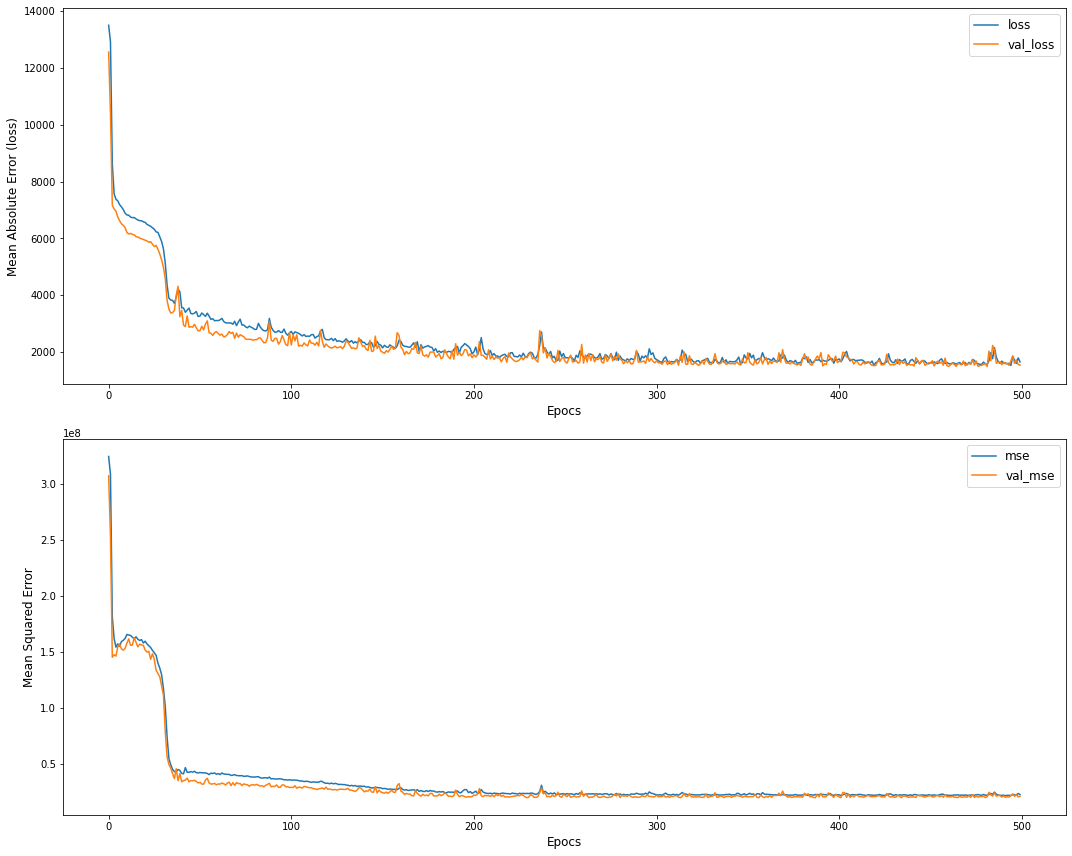

In [135]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history9.history['loss'], label='loss')
axs[0].plot(history9.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history9.history['mse'], label='mse')
axs[1].plot(history9.history['val_mse'], label='val_mse')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Squared Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [136]:
y_pred9 = model9.predict(X_test)
r2_score(y_test, y_pred9) 

0.8745074674504155

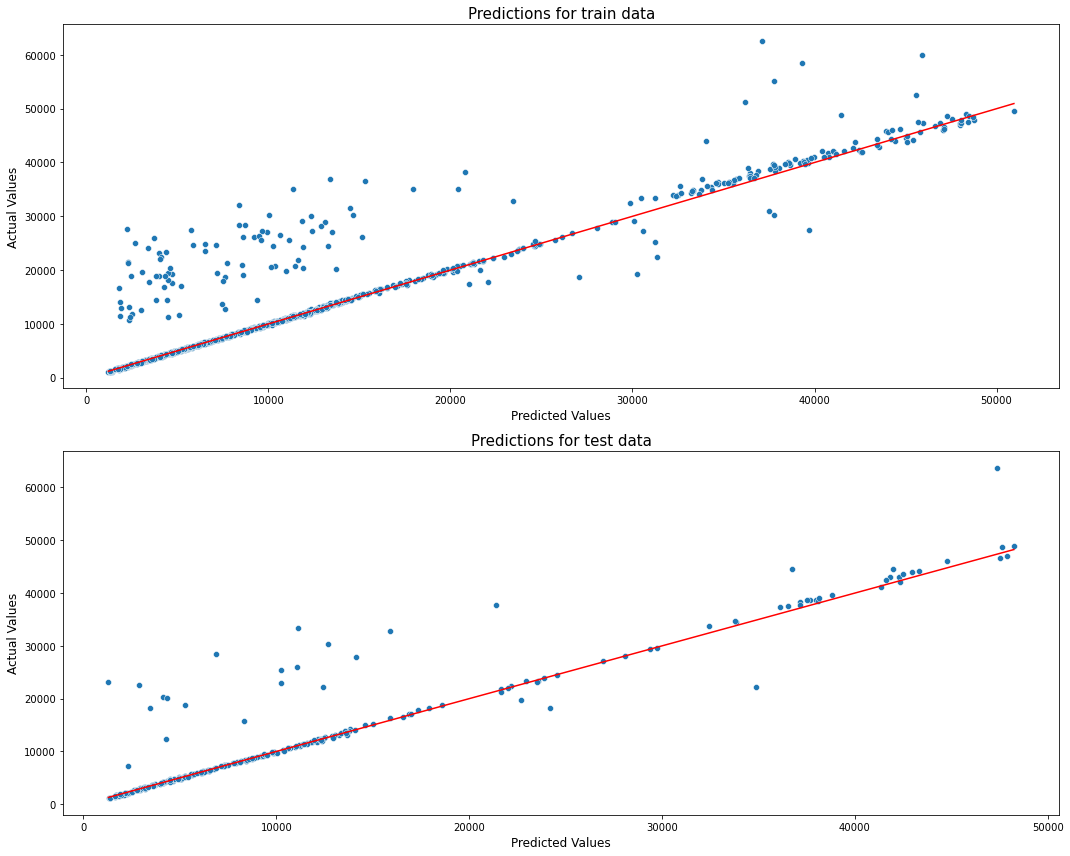

In [137]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model9.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model9.predict(X_train).reshape(-1), model9.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred9.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred9.reshape(-1), y_pred9.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [144]:
print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred9), np.min(y_pred9)))
print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

Predicted values

max: 48240.0234375
min: 1290.13916015625

Actual values

max: 63770.42801
min: 1131.5066


In [145]:
#the max prediction value decreased to 48k
#but the R2 score increased a bit 

In [148]:
#lets increase the number of layers, and decrease the neuron count slightly

In [152]:
model10 = Sequential()

model10.add(Dense(200, input_dim=6, activation='relu'))
model10.add(Dense(200, activation='relu'))
model10.add(Dense(200, activation='relu'))
model10.add(Dense(200, activation='relu'))
model10.add(Dense(100, activation='relu'))
model10.add(Dense(100, activation='relu'))
model10.add(Dense(100, activation='relu'))
model10.add(Dense(100, activation='relu'))
model10.add(Dense(100, activation='relu'))
model10.add(Dense(50, activation='relu'))
model10.add(Dense(50, activation='relu'))
model10.add(Dense(25, activation='relu'))
model10.add(Dense(25, activation='relu'))
model10.add(Dense(10, activation='relu'))
model10.add(Dense(10, activation='relu'))
model10.add(Dense(5, activation='relu'))
model10.add(Dense(1, activation='relu'))

model10.compile(loss='mae', optimizer='adam',
             metrics=['mse', 'mae'])

In [153]:
history10 = model10.fit(X_train, y_train, batch_size=64, epochs=500, verbose=1, validation_split=0.2)

Epoch 1/500
14/14 [==============================] - 2s 121ms/step - loss: 13515.9697 - mse: 325397376.0000 - mae: 13515.9697 - val_loss: 12630.4932 - val_mse: 309686720.0000 - val_mae: 12630.4932
Epoch 2/500
14/14 [==============================] - 0s 34ms/step - loss: 12865.3018 - mse: 307552256.0000 - mae: 12865.3018 - val_loss: 8688.1211 - val_mse: 206662048.0000 - val_mae: 8688.1201
Epoch 3/500
14/14 [==============================] - 0s 35ms/step - loss: 8349.2764 - mse: 161547088.0000 - mae: 8349.2764 - val_loss: 7412.9951 - val_mse: 166929264.0000 - val_mae: 7412.9951
Epoch 4/500
14/14 [==============================] - 0s 31ms/step - loss: 7606.7417 - mse: 154732656.0000 - mae: 7606.7417 - val_loss: 7057.9404 - val_mse: 154781568.0000 - val_mae: 7057.9404
Epoch 5/500
14/14 [==============================] - 0s 36ms/step - loss: 7428.5830 - mse: 156883696.0000 - mae: 7428.5830 - val_loss: 6974.8608 - val_mse: 145820544.0000 - val_mae: 6974.8604
Epoch 6/500
14/14 [==============

14/14 [==============================] - 0s 30ms/step - loss: 3175.7170 - mse: 38762816.0000 - mae: 3175.7170 - val_loss: 3354.3308 - val_mse: 40125904.0000 - val_mae: 3354.3308
Epoch 86/500
14/14 [==============================] - 0s 28ms/step - loss: 3169.5701 - mse: 37473552.0000 - mae: 3169.5701 - val_loss: 2547.2336 - val_mse: 30576510.0000 - val_mae: 2547.2336
Epoch 87/500
14/14 [==============================] - 0s 27ms/step - loss: 2902.7881 - mse: 36907284.0000 - mae: 2902.7881 - val_loss: 2713.0950 - val_mse: 29809892.0000 - val_mae: 2713.0950
Epoch 88/500
14/14 [==============================] - 0s 29ms/step - loss: 3275.8254 - mse: 40107064.0000 - mae: 3275.8254 - val_loss: 2653.0457 - val_mse: 28877082.0000 - val_mae: 2653.0457
Epoch 89/500
14/14 [==============================] - 0s 26ms/step - loss: 2828.6943 - mse: 36719328.0000 - mae: 2828.6943 - val_loss: 2327.3767 - val_mse: 28532290.0000 - val_mae: 2327.3767
Epoch 90/500
14/14 [==============================] - 0s 2

Epoch 128/500
14/14 [==============================] - 0s 25ms/step - loss: 2458.0728 - mse: 32391242.0000 - mae: 2458.0728 - val_loss: 2192.5022 - val_mse: 27411480.0000 - val_mae: 2192.5022
Epoch 129/500
14/14 [==============================] - 0s 19ms/step - loss: 2515.6426 - mse: 31448966.0000 - mae: 2515.6426 - val_loss: 2156.8457 - val_mse: 27224336.0000 - val_mae: 2156.8457
Epoch 130/500
14/14 [==============================] - 0s 17ms/step - loss: 2424.7676 - mse: 31507122.0000 - mae: 2424.7676 - val_loss: 2145.9165 - val_mse: 27034382.0000 - val_mae: 2145.9165
Epoch 131/500
14/14 [==============================] - 0s 25ms/step - loss: 2591.9319 - mse: 32091904.0000 - mae: 2591.9319 - val_loss: 2466.3369 - val_mse: 29490810.0000 - val_mae: 2466.3369
Epoch 132/500
14/14 [==============================] - 0s 25ms/step - loss: 2438.0256 - mse: 31540512.0000 - mae: 2438.0256 - val_loss: 2221.8408 - val_mse: 27511100.0000 - val_mae: 2221.8408
Epoch 133/500
14/14 [===================

Epoch 171/500
14/14 [==============================] - 1s 42ms/step - loss: 2493.6687 - mse: 28652250.0000 - mae: 2493.6687 - val_loss: 2268.1443 - val_mse: 25538162.0000 - val_mae: 2268.1443
Epoch 172/500
14/14 [==============================] - 1s 40ms/step - loss: 2440.4133 - mse: 27962146.0000 - mae: 2440.4133 - val_loss: 2358.6870 - val_mse: 27886458.0000 - val_mae: 2358.6870
Epoch 173/500
14/14 [==============================] - 1s 39ms/step - loss: 2340.5950 - mse: 27766618.0000 - mae: 2340.5950 - val_loss: 2396.6997 - val_mse: 22595800.0000 - val_mae: 2396.6997
Epoch 174/500
14/14 [==============================] - 1s 36ms/step - loss: 2475.7637 - mse: 27095172.0000 - mae: 2475.7637 - val_loss: 1988.6592 - val_mse: 23156736.0000 - val_mae: 1988.6592
Epoch 175/500
14/14 [==============================] - 0s 33ms/step - loss: 2268.1648 - mse: 26920422.0000 - mae: 2268.1648 - val_loss: 2009.3375 - val_mse: 23699542.0000 - val_mae: 2009.3375
Epoch 176/500
14/14 [===================

Epoch 214/500
14/14 [==============================] - 0s 23ms/step - loss: 2424.0378 - mse: 27370516.0000 - mae: 2424.0378 - val_loss: 2093.9185 - val_mse: 23702624.0000 - val_mae: 2093.9185
Epoch 215/500
14/14 [==============================] - 0s 24ms/step - loss: 2199.1978 - mse: 25945744.0000 - mae: 2199.1978 - val_loss: 2147.3472 - val_mse: 25382706.0000 - val_mae: 2147.3472
Epoch 216/500
14/14 [==============================] - 0s 27ms/step - loss: 2067.7568 - mse: 25127462.0000 - mae: 2067.7568 - val_loss: 1914.9657 - val_mse: 22703608.0000 - val_mae: 1914.9658
Epoch 217/500
14/14 [==============================] - 0s 24ms/step - loss: 2250.2876 - mse: 26744868.0000 - mae: 2250.2876 - val_loss: 2216.6531 - val_mse: 22450846.0000 - val_mae: 2216.6531
Epoch 218/500
14/14 [==============================] - 0s 25ms/step - loss: 2098.9023 - mse: 25441556.0000 - mae: 2098.9023 - val_loss: 1921.8164 - val_mse: 23267906.0000 - val_mae: 1921.8164
Epoch 219/500
14/14 [===================

Epoch 257/500
14/14 [==============================] - 0s 16ms/step - loss: 2110.1738 - mse: 24933206.0000 - mae: 2110.1738 - val_loss: 1876.4045 - val_mse: 22470250.0000 - val_mae: 1876.4045
Epoch 258/500
14/14 [==============================] - 0s 17ms/step - loss: 2034.1067 - mse: 24503336.0000 - mae: 2034.1067 - val_loss: 2069.6536 - val_mse: 23626862.0000 - val_mae: 2069.6536
Epoch 259/500
14/14 [==============================] - 0s 15ms/step - loss: 2073.1882 - mse: 24176018.0000 - mae: 2073.1882 - val_loss: 1841.2332 - val_mse: 22085574.0000 - val_mae: 1841.2332
Epoch 260/500
14/14 [==============================] - 0s 17ms/step - loss: 2138.4314 - mse: 25013434.0000 - mae: 2138.4314 - val_loss: 1948.1671 - val_mse: 23621582.0000 - val_mae: 1948.1671
Epoch 261/500
14/14 [==============================] - 0s 18ms/step - loss: 2017.5133 - mse: 24548036.0000 - mae: 2017.5133 - val_loss: 2037.9886 - val_mse: 24005934.0000 - val_mae: 2037.9886
Epoch 262/500
14/14 [===================

Epoch 300/500
14/14 [==============================] - 0s 18ms/step - loss: 1983.8080 - mse: 23918218.0000 - mae: 1983.8080 - val_loss: 1852.4261 - val_mse: 21817096.0000 - val_mae: 1852.4261
Epoch 301/500
14/14 [==============================] - 0s 18ms/step - loss: 1841.4248 - mse: 23710716.0000 - mae: 1841.4248 - val_loss: 1887.6793 - val_mse: 22908674.0000 - val_mae: 1887.6793
Epoch 302/500
14/14 [==============================] - 0s 15ms/step - loss: 1836.7959 - mse: 23718962.0000 - mae: 1836.7959 - val_loss: 1880.4792 - val_mse: 21159108.0000 - val_mae: 1880.4792
Epoch 303/500
14/14 [==============================] - 0s 15ms/step - loss: 1979.0797 - mse: 23928930.0000 - mae: 1979.0797 - val_loss: 1808.4274 - val_mse: 22214188.0000 - val_mae: 1808.4274
Epoch 304/500
14/14 [==============================] - 0s 16ms/step - loss: 1993.2726 - mse: 24621812.0000 - mae: 1993.2726 - val_loss: 1893.4397 - val_mse: 23333490.0000 - val_mae: 1893.4397
Epoch 305/500
14/14 [===================

Epoch 343/500
14/14 [==============================] - 0s 18ms/step - loss: 2049.4321 - mse: 24275908.0000 - mae: 2049.4321 - val_loss: 1745.6667 - val_mse: 21382708.0000 - val_mae: 1745.6667
Epoch 344/500
14/14 [==============================] - 0s 23ms/step - loss: 1887.6735 - mse: 23737860.0000 - mae: 1887.6735 - val_loss: 1849.9581 - val_mse: 21139648.0000 - val_mae: 1849.9581
Epoch 345/500
14/14 [==============================] - 0s 26ms/step - loss: 1832.9999 - mse: 23092734.0000 - mae: 1832.9999 - val_loss: 1784.4137 - val_mse: 22606362.0000 - val_mae: 1784.4137
Epoch 346/500
14/14 [==============================] - 0s 20ms/step - loss: 1842.1942 - mse: 23446176.0000 - mae: 1842.1942 - val_loss: 2004.2605 - val_mse: 25440832.0000 - val_mae: 2004.2605
Epoch 347/500
14/14 [==============================] - 0s 22ms/step - loss: 1844.1011 - mse: 23547188.0000 - mae: 1844.1011 - val_loss: 1906.4873 - val_mse: 23928024.0000 - val_mae: 1906.4873
Epoch 348/500
14/14 [===================

Epoch 386/500
14/14 [==============================] - 0s 25ms/step - loss: 1953.3778 - mse: 23309714.0000 - mae: 1953.3778 - val_loss: 1735.1196 - val_mse: 21350456.0000 - val_mae: 1735.1196
Epoch 387/500
14/14 [==============================] - 0s 25ms/step - loss: 2135.3992 - mse: 24248516.0000 - mae: 2135.3992 - val_loss: 1999.3257 - val_mse: 21599976.0000 - val_mae: 1999.3257
Epoch 388/500
14/14 [==============================] - 0s 27ms/step - loss: 1936.9310 - mse: 23883080.0000 - mae: 1936.9310 - val_loss: 1798.3400 - val_mse: 21284990.0000 - val_mae: 1798.3400
Epoch 389/500
14/14 [==============================] - 0s 28ms/step - loss: 1701.3975 - mse: 22515860.0000 - mae: 1701.3975 - val_loss: 1688.6396 - val_mse: 21474162.0000 - val_mae: 1688.6396
Epoch 390/500
14/14 [==============================] - 0s 26ms/step - loss: 1777.6985 - mse: 23056910.0000 - mae: 1777.6985 - val_loss: 1686.1898 - val_mse: 21356702.0000 - val_mae: 1686.1898
Epoch 391/500
14/14 [===================

Epoch 429/500
14/14 [==============================] - 0s 32ms/step - loss: 1901.2681 - mse: 23531570.0000 - mae: 1901.2681 - val_loss: 1724.6653 - val_mse: 20675446.0000 - val_mae: 1724.6653
Epoch 430/500
14/14 [==============================] - 0s 30ms/step - loss: 1728.2113 - mse: 22972628.0000 - mae: 1728.2113 - val_loss: 1731.6331 - val_mse: 21816196.0000 - val_mae: 1731.6331
Epoch 431/500
14/14 [==============================] - 0s 22ms/step - loss: 1834.5468 - mse: 23700760.0000 - mae: 1834.5468 - val_loss: 1718.3818 - val_mse: 21604716.0000 - val_mae: 1718.3818
Epoch 432/500
14/14 [==============================] - 0s 29ms/step - loss: 1767.4950 - mse: 22286636.0000 - mae: 1767.4950 - val_loss: 1722.4025 - val_mse: 23070114.0000 - val_mae: 1722.4025
Epoch 433/500
14/14 [==============================] - 0s 31ms/step - loss: 2075.3142 - mse: 24228682.0000 - mae: 2075.3142 - val_loss: 1804.3636 - val_mse: 21218132.0000 - val_mae: 1804.3636
Epoch 434/500
14/14 [===================

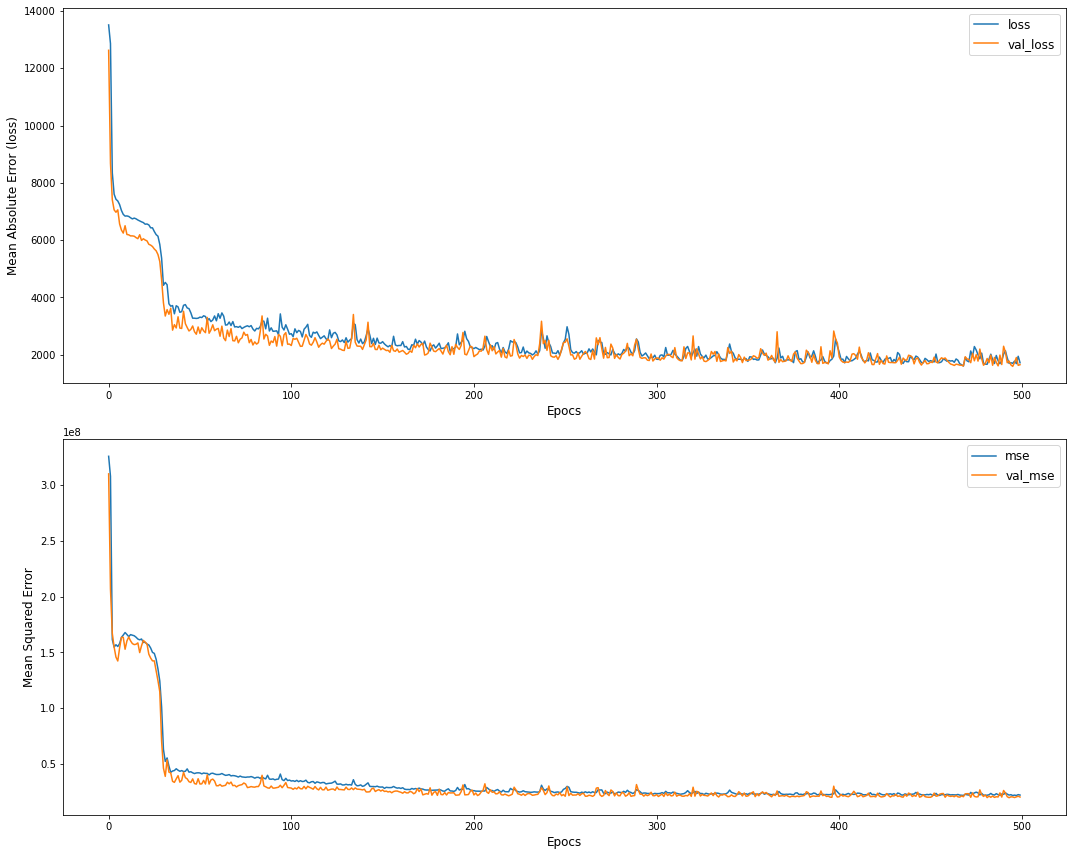

In [154]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history10.history['loss'], label='loss')
axs[0].plot(history10.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history10.history['mse'], label='mse')
axs[1].plot(history10.history['val_mse'], label='val_mse')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Squared Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [155]:
y_pred10 = model10.predict(X_test)
r2_score(y_test, y_pred10) 

0.8748217357088579

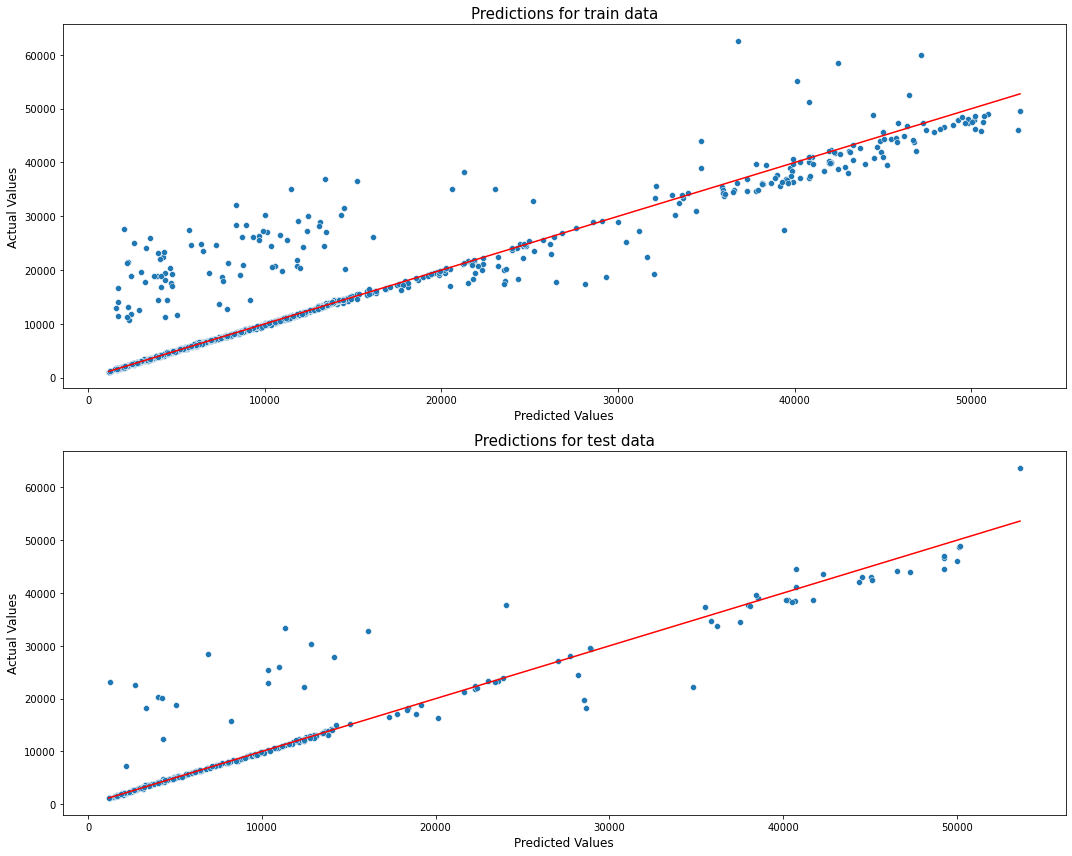

In [156]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model10.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model10.predict(X_train).reshape(-1), model10.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred10.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred10.reshape(-1), y_pred10.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [163]:
print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred10), np.min(y_pred10)))
print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

Predicted values

max: 53633.48046875
min: 1184.1253662109375

Actual values

max: 63770.42801
min: 1131.5066


In [165]:
#R2 score barely increased, but it got better at predicting around 35k+ range
#last two models had a similar number of parameters (check model.summary())
#maybe the model needs more neurons to learn to better learn from the data
#or does it require more complexity? 
#lets try both, one at a time

In [185]:
model11 = Sequential()

model11.add(Dense(500, input_dim=6, activation='relu'))
model11.add(Dense(500, activation='relu'))
model11.add(Dense(500, activation='relu'))
model11.add(Dense(500, activation='relu'))
model11.add(Dense(500, activation='relu'))
model11.add(Dense(500, activation='relu'))
model11.add(Dense(1, activation='relu'))


model11.compile(loss='mae', optimizer='adam',
             metrics=['mse', 'mae'])

In [186]:
history11 = model11.fit(X_train, y_train, batch_size=64, epochs=500, verbose=1, validation_split=0.2)

Epoch 1/500
14/14 [==============================] - 4s 267ms/step - loss: 12160.9248 - mse: 292818912.0000 - mae: 12160.9248 - val_loss: 8621.5859 - val_mse: 130938704.0000 - val_mae: 8621.5859
Epoch 2/500
14/14 [==============================] - 1s 101ms/step - loss: 8845.7998 - mse: 170566576.0000 - mae: 8845.7998 - val_loss: 7199.3154 - val_mse: 170391664.0000 - val_mae: 7199.3154
Epoch 3/500
14/14 [==============================] - 1s 102ms/step - loss: 7609.8594 - mse: 152635552.0000 - mae: 7609.8594 - val_loss: 6809.4468 - val_mse: 158954000.0000 - val_mae: 6809.4468
Epoch 4/500
14/14 [==============================] - 1s 88ms/step - loss: 7227.7539 - mse: 157566768.0000 - mae: 7227.7539 - val_loss: 6937.0010 - val_mse: 144588192.0000 - val_mae: 6937.0010
Epoch 5/500
14/14 [==============================] - 1s 85ms/step - loss: 7074.1338 - mse: 161320928.0000 - mae: 7074.1338 - val_loss: 6293.7031 - val_mse: 160922896.0000 - val_mae: 6293.7031
Epoch 6/500
14/14 [================

Epoch 44/500
14/14 [==============================] - 1s 103ms/step - loss: 2992.5720 - mse: 40515900.0000 - mae: 2992.5720 - val_loss: 2528.9697 - val_mse: 31606018.0000 - val_mae: 2528.9697
Epoch 45/500
14/14 [==============================] - 1s 101ms/step - loss: 3230.2073 - mse: 40442156.0000 - mae: 3230.2073 - val_loss: 2798.2922 - val_mse: 34899112.0000 - val_mae: 2798.2922
Epoch 46/500
14/14 [==============================] - 1s 99ms/step - loss: 3013.4299 - mse: 39176016.0000 - mae: 3013.4299 - val_loss: 2603.1370 - val_mse: 31490674.0000 - val_mae: 2603.1370
Epoch 47/500
14/14 [==============================] - 1s 60ms/step - loss: 3095.4253 - mse: 40306792.0000 - mae: 3095.4253 - val_loss: 2950.9756 - val_mse: 31654740.0000 - val_mae: 2950.9756
Epoch 48/500
14/14 [==============================] - 1s 37ms/step - loss: 3209.5132 - mse: 39142880.0000 - mae: 3209.5132 - val_loss: 2453.2043 - val_mse: 30388198.0000 - val_mae: 2453.2043
Epoch 49/500
14/14 [=======================

Epoch 87/500
14/14 [==============================] - 1s 41ms/step - loss: 2410.4346 - mse: 29096350.0000 - mae: 2410.4346 - val_loss: 2347.9250 - val_mse: 29264740.0000 - val_mae: 2347.9250
Epoch 88/500
14/14 [==============================] - 1s 48ms/step - loss: 2279.0300 - mse: 27851086.0000 - mae: 2279.0300 - val_loss: 2311.1367 - val_mse: 26472672.0000 - val_mae: 2311.1367
Epoch 89/500
14/14 [==============================] - 1s 44ms/step - loss: 2357.1453 - mse: 27944756.0000 - mae: 2357.1453 - val_loss: 2461.8044 - val_mse: 26782000.0000 - val_mae: 2461.8044
Epoch 90/500
14/14 [==============================] - 1s 54ms/step - loss: 2682.8394 - mse: 30325642.0000 - mae: 2682.8394 - val_loss: 2107.7659 - val_mse: 24957036.0000 - val_mae: 2107.7659
Epoch 91/500
14/14 [==============================] - 1s 52ms/step - loss: 2208.0496 - mse: 27408188.0000 - mae: 2208.0496 - val_loss: 2126.1206 - val_mse: 24829538.0000 - val_mae: 2126.1206
Epoch 92/500
14/14 [=========================

Epoch 130/500
14/14 [==============================] - 1s 37ms/step - loss: 2204.4087 - mse: 25875534.0000 - mae: 2204.4087 - val_loss: 1943.0322 - val_mse: 23137170.0000 - val_mae: 1943.0322
Epoch 131/500
14/14 [==============================] - 1s 38ms/step - loss: 1966.0675 - mse: 24532146.0000 - mae: 1966.0675 - val_loss: 1735.1312 - val_mse: 21066656.0000 - val_mae: 1735.1312
Epoch 132/500
14/14 [==============================] - 1s 39ms/step - loss: 2015.0081 - mse: 24433062.0000 - mae: 2015.0081 - val_loss: 1773.6340 - val_mse: 21118612.0000 - val_mae: 1773.6340
Epoch 133/500
14/14 [==============================] - 1s 38ms/step - loss: 1980.2657 - mse: 24510608.0000 - mae: 1980.2657 - val_loss: 1732.7074 - val_mse: 21796012.0000 - val_mae: 1732.7074
Epoch 134/500
14/14 [==============================] - 1s 47ms/step - loss: 1888.1680 - mse: 23833026.0000 - mae: 1888.1680 - val_loss: 1890.6902 - val_mse: 21283308.0000 - val_mae: 1890.6902
Epoch 135/500
14/14 [===================

Epoch 173/500
14/14 [==============================] - 1s 39ms/step - loss: 2189.6963 - mse: 24839858.0000 - mae: 2189.6963 - val_loss: 1971.3505 - val_mse: 20752888.0000 - val_mae: 1971.3505
Epoch 174/500
14/14 [==============================] - 1s 38ms/step - loss: 1930.6738 - mse: 23625946.0000 - mae: 1930.6738 - val_loss: 1732.0795 - val_mse: 21961652.0000 - val_mae: 1732.0795
Epoch 175/500
14/14 [==============================] - 1s 44ms/step - loss: 1858.0051 - mse: 23491808.0000 - mae: 1858.0051 - val_loss: 2095.7092 - val_mse: 20583968.0000 - val_mae: 2095.7092
Epoch 176/500
14/14 [==============================] - 1s 64ms/step - loss: 2026.5619 - mse: 23271202.0000 - mae: 2026.5619 - val_loss: 1874.3036 - val_mse: 20881996.0000 - val_mae: 1874.3036
Epoch 177/500
14/14 [==============================] - 1s 53ms/step - loss: 2006.1644 - mse: 23923042.0000 - mae: 2006.1644 - val_loss: 2094.6997 - val_mse: 22490668.0000 - val_mae: 2094.6997
Epoch 178/500
14/14 [===================

Epoch 216/500
14/14 [==============================] - 1s 55ms/step - loss: 1969.0914 - mse: 23736222.0000 - mae: 1969.0914 - val_loss: 1731.5586 - val_mse: 21759574.0000 - val_mae: 1731.5586
Epoch 217/500
14/14 [==============================] - 1s 49ms/step - loss: 1810.3027 - mse: 22919670.0000 - mae: 1810.3027 - val_loss: 1777.9279 - val_mse: 22414552.0000 - val_mae: 1777.9279
Epoch 218/500
14/14 [==============================] - 1s 50ms/step - loss: 1785.4897 - mse: 22709336.0000 - mae: 1785.4897 - val_loss: 1715.7860 - val_mse: 22754398.0000 - val_mae: 1715.7860
Epoch 219/500
14/14 [==============================] - 1s 49ms/step - loss: 1761.6392 - mse: 22795950.0000 - mae: 1761.6392 - val_loss: 1663.4061 - val_mse: 20787092.0000 - val_mae: 1663.4061
Epoch 220/500
14/14 [==============================] - 1s 50ms/step - loss: 1712.5646 - mse: 22504120.0000 - mae: 1712.5646 - val_loss: 1606.9965 - val_mse: 21209054.0000 - val_mae: 1606.9965
Epoch 221/500
14/14 [===================

Epoch 259/500
14/14 [==============================] - 1s 45ms/step - loss: 1771.7052 - mse: 22409200.0000 - mae: 1771.7052 - val_loss: 1680.8998 - val_mse: 22042798.0000 - val_mae: 1680.8998
Epoch 260/500
14/14 [==============================] - 1s 44ms/step - loss: 1849.0441 - mse: 23041154.0000 - mae: 1849.0441 - val_loss: 1812.5851 - val_mse: 20084440.0000 - val_mae: 1812.5851
Epoch 261/500
14/14 [==============================] - 1s 39ms/step - loss: 1910.1637 - mse: 22920142.0000 - mae: 1910.1637 - val_loss: 1743.2506 - val_mse: 20451890.0000 - val_mae: 1743.2506
Epoch 262/500
14/14 [==============================] - 1s 37ms/step - loss: 1752.6682 - mse: 21773048.0000 - mae: 1752.6682 - val_loss: 1667.3979 - val_mse: 20932704.0000 - val_mae: 1667.3979
Epoch 263/500
14/14 [==============================] - 1s 42ms/step - loss: 1742.6649 - mse: 22143392.0000 - mae: 1742.6649 - val_loss: 1787.7068 - val_mse: 20238334.0000 - val_mae: 1787.7068
Epoch 264/500
14/14 [===================

Epoch 302/500
14/14 [==============================] - 1s 36ms/step - loss: 1657.7860 - mse: 22187544.0000 - mae: 1657.7860 - val_loss: 1584.1256 - val_mse: 20749578.0000 - val_mae: 1584.1255
Epoch 303/500
14/14 [==============================] - 1s 42ms/step - loss: 2074.7146 - mse: 23490000.0000 - mae: 2074.7146 - val_loss: 2062.3335 - val_mse: 23772818.0000 - val_mae: 2062.3335
Epoch 304/500
14/14 [==============================] - 1s 44ms/step - loss: 1852.4370 - mse: 22575124.0000 - mae: 1852.4370 - val_loss: 1757.9064 - val_mse: 20746036.0000 - val_mae: 1757.9064
Epoch 305/500
14/14 [==============================] - 1s 37ms/step - loss: 1731.0558 - mse: 22198922.0000 - mae: 1731.0558 - val_loss: 1774.1803 - val_mse: 22220048.0000 - val_mae: 1774.1803
Epoch 306/500
14/14 [==============================] - 1s 46ms/step - loss: 1682.8733 - mse: 22526510.0000 - mae: 1682.8733 - val_loss: 1618.3678 - val_mse: 21103578.0000 - val_mae: 1618.3678
Epoch 307/500
14/14 [===================

Epoch 345/500
14/14 [==============================] - 1s 51ms/step - loss: 1911.7368 - mse: 23187178.0000 - mae: 1911.7368 - val_loss: 1861.2493 - val_mse: 20007930.0000 - val_mae: 1861.2493
Epoch 346/500
14/14 [==============================] - 1s 45ms/step - loss: 1816.4336 - mse: 22419992.0000 - mae: 1816.4336 - val_loss: 1678.8958 - val_mse: 20423036.0000 - val_mae: 1678.8958
Epoch 347/500
14/14 [==============================] - 1s 38ms/step - loss: 1631.8053 - mse: 21886876.0000 - mae: 1631.8053 - val_loss: 1668.1022 - val_mse: 21456820.0000 - val_mae: 1668.1022
Epoch 348/500
14/14 [==============================] - 1s 43ms/step - loss: 1755.6079 - mse: 22947082.0000 - mae: 1755.6079 - val_loss: 1722.4263 - val_mse: 20565066.0000 - val_mae: 1722.4263
Epoch 349/500
14/14 [==============================] - 1s 42ms/step - loss: 1782.5659 - mse: 23455648.0000 - mae: 1782.5659 - val_loss: 1559.4492 - val_mse: 21032014.0000 - val_mae: 1559.4492
Epoch 350/500
14/14 [===================

Epoch 388/500
14/14 [==============================] - 1s 38ms/step - loss: 1704.6383 - mse: 22564768.0000 - mae: 1704.6383 - val_loss: 1591.2173 - val_mse: 20690484.0000 - val_mae: 1591.2173
Epoch 389/500
14/14 [==============================] - 1s 42ms/step - loss: 1617.5111 - mse: 21891070.0000 - mae: 1617.5111 - val_loss: 1575.7946 - val_mse: 20808310.0000 - val_mae: 1575.7946
Epoch 390/500
14/14 [==============================] - 1s 39ms/step - loss: 1577.5719 - mse: 21784820.0000 - mae: 1577.5719 - val_loss: 1587.1040 - val_mse: 20224876.0000 - val_mae: 1587.1040
Epoch 391/500
14/14 [==============================] - 1s 47ms/step - loss: 1566.1017 - mse: 22058362.0000 - mae: 1566.1017 - val_loss: 1697.9697 - val_mse: 21938346.0000 - val_mae: 1697.9697
Epoch 392/500
14/14 [==============================] - 1s 44ms/step - loss: 1750.4338 - mse: 22005066.0000 - mae: 1750.4338 - val_loss: 2124.1125 - val_mse: 20278080.0000 - val_mae: 2124.1125
Epoch 393/500
14/14 [===================

Epoch 431/500
14/14 [==============================] - 1s 44ms/step - loss: 1892.9771 - mse: 22762204.0000 - mae: 1892.9771 - val_loss: 1943.4447 - val_mse: 23256122.0000 - val_mae: 1943.4447
Epoch 432/500
14/14 [==============================] - 1s 39ms/step - loss: 1799.5142 - mse: 22211856.0000 - mae: 1799.5142 - val_loss: 1601.0596 - val_mse: 20568564.0000 - val_mae: 1601.0596
Epoch 433/500
14/14 [==============================] - 1s 39ms/step - loss: 1617.6532 - mse: 22538312.0000 - mae: 1617.6532 - val_loss: 1540.9169 - val_mse: 21172268.0000 - val_mae: 1540.9169
Epoch 434/500
14/14 [==============================] - 1s 40ms/step - loss: 1692.5753 - mse: 22392088.0000 - mae: 1692.5753 - val_loss: 1657.8860 - val_mse: 19804968.0000 - val_mae: 1657.8860
Epoch 435/500
14/14 [==============================] - 1s 37ms/step - loss: 1731.4232 - mse: 21841546.0000 - mae: 1731.4232 - val_loss: 1511.4105 - val_mse: 20560990.0000 - val_mae: 1511.4105
Epoch 436/500
14/14 [===================

Epoch 474/500
14/14 [==============================] - 1s 40ms/step - loss: 1806.3726 - mse: 23138632.0000 - mae: 1806.3726 - val_loss: 1630.9341 - val_mse: 19816570.0000 - val_mae: 1630.9341
Epoch 475/500
14/14 [==============================] - 1s 41ms/step - loss: 1620.0411 - mse: 21703848.0000 - mae: 1620.0411 - val_loss: 1472.9144 - val_mse: 20747602.0000 - val_mae: 1472.9144
Epoch 476/500
14/14 [==============================] - 1s 41ms/step - loss: 1699.3965 - mse: 23507752.0000 - mae: 1699.3965 - val_loss: 1625.6713 - val_mse: 21568914.0000 - val_mae: 1625.6713
Epoch 477/500
14/14 [==============================] - 1s 39ms/step - loss: 1667.3315 - mse: 22236416.0000 - mae: 1667.3315 - val_loss: 1953.6125 - val_mse: 24887524.0000 - val_mae: 1953.6125
Epoch 478/500
14/14 [==============================] - 1s 40ms/step - loss: 1806.5135 - mse: 23591304.0000 - mae: 1806.5135 - val_loss: 1576.1017 - val_mse: 20727130.0000 - val_mae: 1576.1017
Epoch 479/500
14/14 [===================

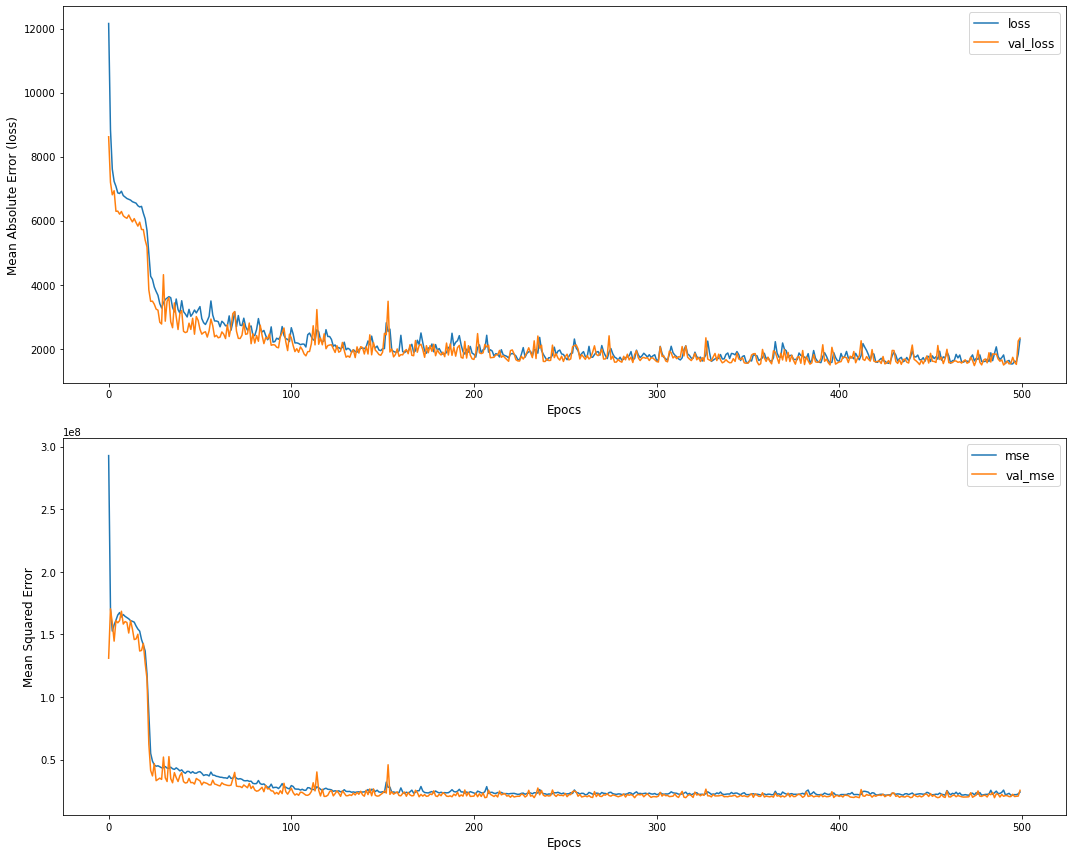

In [187]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history11.history['loss'], label='loss')
axs[0].plot(history11.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history11.history['mse'], label='mse')
axs[1].plot(history11.history['val_mse'], label='val_mse')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Squared Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [188]:
y_pred11 = model11.predict(X_test)
r2_score(y_test, y_pred11) 

0.8515565567792365

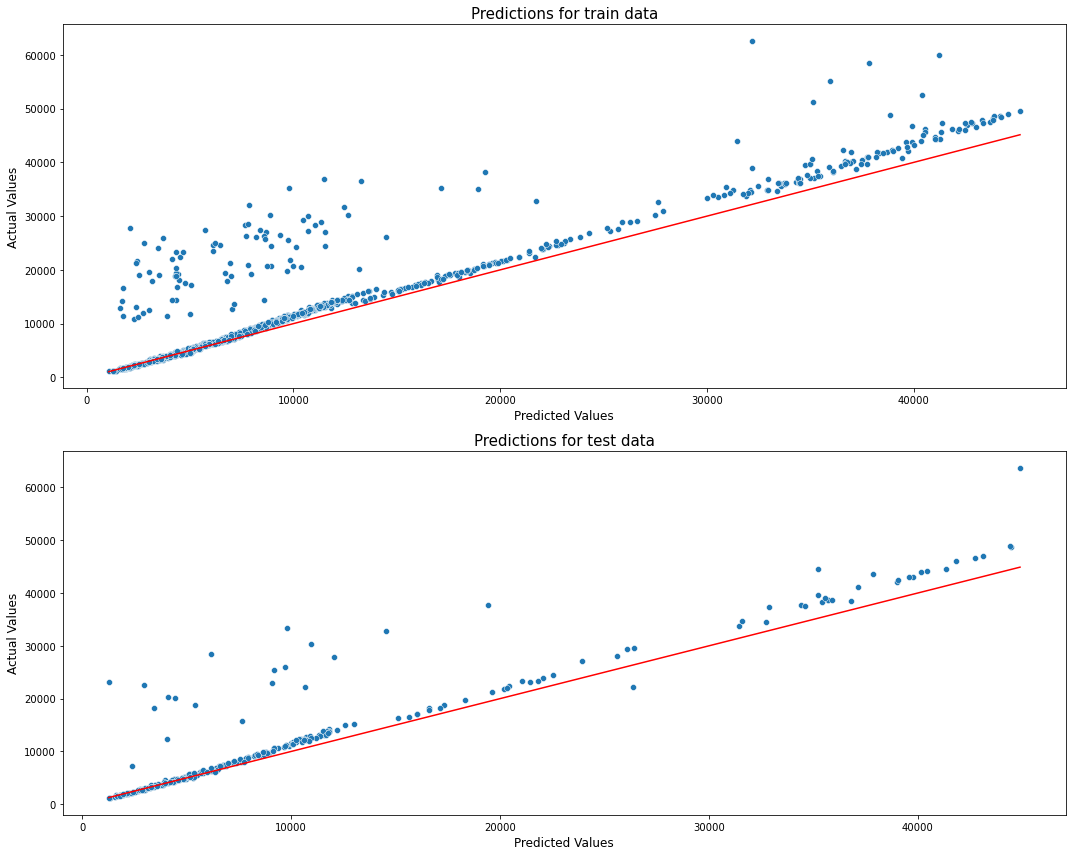

In [189]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model11.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model11.predict(X_train).reshape(-1), model11.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred11.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred11.reshape(-1), y_pred11.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [190]:
print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred11), np.min(y_pred11)))
print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

Predicted values

max: 44902.33984375
min: 1257.592529296875

Actual values

max: 63770.42801
min: 1131.5066


In [192]:
#BELOW READING IS FOR A PREVIOUS MODEL, START FROM HERE AND READ THE ABOVE PLOTS/DATE TO MAKE EDITS BELOW!
#note to self: dont do this.

In [174]:
#lets try to gradually decrease the neuron count in the last model arch and increase the neuron count 

In [178]:
# model12 = Sequential()

# model12.add(Dense(1000, input_dim=6, activation='relu'))
# model12.add(Dense(500, activation='relu'))
# model12.add(Dense(500, activation='relu'))
# model12.add(Dense(250, activation='relu'))
# model12.add(Dense(250, activation='relu'))
# model12.add(Dense(100, activation='relu'))
# model12.add(Dense(50, activation='relu'))
# model12.add(Dense(1, activation='relu'))


# model12.compile(loss='mae', optimizer='adam',
#              metrics=['mse', 'mae'])

In [ ]:
# fig, axs = plt.subplots(2, 1, figsize=(15,12))
# #1st plot
# axs[0].plot(history11.history['loss'], label='loss')
# axs[0].plot(history11.history['val_loss'], label='val_loss')
# axs[0].set_xlabel('Epocs', fontsize=12)
# axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
# axs[0].legend(loc='upper right', fontsize=12)

# #2nd plot 
# axs[1].plot(history11.history['mse'], label='mse')
# axs[1].plot(history11.history['val_mse'], label='val_mse')
# axs[1].set_xlabel('Epocs', fontsize=12)
# axs[1].set_ylabel('Mean Squared Error', fontsize=12)
# axs[1].legend(loc='upper right', fontsize=12)


# plt.tight_layout()